    This is very first initialized ipynb script, which used 8 input features: 
        'ProgrNumber',
        'StopPointId',
        'PlannedTime_Arr',
        'PlannedTime_Dep',
        'VehicleId',
        'Direction',
        'weekDays',
        'dayInterval'
     And used 2 output features: 'ActualTime_Arr', 'ActualTime_Dep'
     The training model is ANN. This script has been obsoleted.
     Develop Date: 2018.06.20

In [ ]:
import csv
import pandas as pd
sample_df = pd.read_csv("LeaveTimes_MAR.csv")
sample_df.count()
#sample_df.head()

In [2]:
trip_df = pd.read_csv("Trips_2017.csv")
#trip_df = pd.read_csv("rt_trips_2017_I_DB.csv")
trip_df.count()

TripId             1111908
DataSource         1111908
DayOfService       1111908
LineId             1111908
RouteId            1111908
Direction          1111908
PlannedTime_Arr    1111908
PlannedTime_Dep    1111908
ActualTime_Arr     1111908
ActualTime_Dep     1111908
Basin              1111908
TenderLot                0
Suppressed            3426
JustificationId          0
LastUpdate               0
Note                     0
dtype: int64

In [3]:
# Drop several columns
sample_df = sample_df.drop(['DataSource','Passengers', 'Passengersin','Distance', 'Suppresed','JustificationId','LastUpdate','Note'], axis=1)
sample_df.head()

,TripId,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,VehicleId
0,4529349,2017-03-27,5,4384,51343,51343,51476,51476,1000211
1,4529349,2017-03-27,10,523,51544,51544,51744,51763,1000211
2,4529349,2017-03-27,15,4382,51764,51764,52048,52077,1000211
3,4529349,2017-03-27,20,1223,52044,52044,52340,52340,1000211
4,4529349,2017-03-27,25,1228,52343,52343,52629,52637,1000211


In [4]:
#sample_df.DayOfService.unique()

In [5]:
#trip_df.DayOfService.unique()

In [6]:
trip_df = trip_df.drop(['DataSource',
                        'PlannedTime_Arr',
                       'PlannedTime_Dep',
                       'ActualTime_Arr',
                       'ActualTime_Dep',
                       'Basin',
                       'TenderLot',
                       'Suppressed',
                       'JustificationId',
                       'LastUpdate', 'Note'], axis=1)


In [7]:
trip_df.head()

,TripId,DayOfService,LineId,RouteId,Direction
0,4391739,2017-02-24,140,140_19,1
1,4388762,2017-02-24,140,140_19,1
2,4381744,2017-02-24,4,4_12,2
3,4388860,2017-02-24,84A,84A_1,1
4,4388883,2017-02-24,39A,39A_40,1


In [8]:
# Merge two dataFrame files
res = pd.merge(sample_df, trip_df, on = ['TripId', 'DayOfService'])

In [9]:
#res.count()

In [10]:
res.DayOfService.unique()

array(['2017-03-27', '2017-03-21', '2017-03-22', '2017-03-28',
       '2017-03-26', '2017-03-24', '2017-03-29', '2017-03-30',
       '2017-03-25', '2017-03-03', '2017-03-08', '2017-03-13',
       '2017-03-04', '2017-03-09', '2017-03-14', '2017-03-05',
       '2017-03-10', '2017-03-06', '2017-03-15', '2017-03-17',
       '2017-03-23', '2017-03-20', '2017-03-19', '2017-03-07',
       '2017-03-18', '2017-03-01', '2017-03-02', '2017-03-31',
       '2017-03-11', '2017-03-12'], dtype=object)

In [11]:
res = res.drop_duplicates(subset=None, keep='first', inplace=False)

In [12]:
res.to_csv("MAR_RES.csv")

In [17]:
res = pd.read_csv("JUN_RES.csv")

In [18]:
#'39A'
res_a = res[(res['LineId']=='39A')]
res_a.to_csv('LeaveTimes_JUN_39A.csv')
res_a.count()

Unnamed: 0         135188
TripId             135188
DayOfService       135188
ProgrNumber        135188
StopPointId        135188
PlannedTime_Arr    135188
PlannedTime_Dep    135188
ActualTime_Arr     135188
ActualTime_Dep     135188
VehicleId          135188
LineId             135188
RouteId            135188
Direction          135188
dtype: int64

In [15]:
res_a = res_a.drop(['LineId', 'RouteId','TripId'], axis=1)

In [16]:
res_a.head()

,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,VehicleId,Direction
47236,2017-06-06,38,1905,29471,29471,29353,29366,2534820,2
47237,2017-06-06,12,779,34287,34287,34627,34627,2534820,1
47238,2017-06-06,40,1664,36648,36648,35975,35975,2534820,1
47239,2017-06-06,45,1808,36859,36859,36147,36147,2534820,1
47240,2017-06-06,15,1860,40318,40318,40454,40473,2534820,2


In [33]:
import datetime
def my_test(d):
    a,b,c = d.split('-')
    return datetime.datetime(int(a),int(b),int(c)).weekday()   
res_a['weekDays'] = res_a.apply(lambda row: my_test(row['DayOfService']), axis=1)

In [34]:
'''
df = pd.DataFrame({'my_dates':['2015-01-01','2015-01-02','2015-01-03'],'myvals':[1,2,3]})
df['my_dates'] = pd.to_datetime(df['my_dates'])
#df['day_of_week'] = df['my_dates'].dt.weekday_name
df
'''

"\ndf = pd.DataFrame({'my_dates':['2015-01-01','2015-01-02','2015-01-03'],'myvals':[1,2,3]})\ndf['my_dates'] = pd.to_datetime(df['my_dates'])\n#df['day_of_week'] = df['my_dates'].dt.weekday_name\ndf\n"

In [35]:
#res_a
def my_test2(a, b):
    return a - b
res_a['DelayTime'] = res_a.apply(lambda row: my_test2(row['ActualTime_Arr'], row['PlannedTime_Arr']), axis=1)

In [36]:
def my_test3(a):
    #return str(a//3600).zfill(2) + ":" + str(a%3600//60).zfill(2)+ ":" + str(a%3600%60).zfill(2)
    return a/3600
res_a['dayInterval'] = res_a.apply(lambda row: my_test3(row['PlannedTime_Arr']), axis=1)

In [37]:
#res_a.to_csv("39A_CLEANED_DATA.csv")
res_a.head()

,Unnamed: 0,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,VehicleId,Direction,weekDays,DelayTime,dayInterval
47236,47236,2017-06-06,38,1905,29471,29471,29353,29366,2534820,2,1,-118,8.186389
47237,47237,2017-06-06,12,779,34287,34287,34627,34627,2534820,1,1,340,9.524167
47238,47238,2017-06-06,40,1664,36648,36648,35975,35975,2534820,1,1,-673,10.180000
47239,47239,2017-06-06,45,1808,36859,36859,36147,36147,2534820,1,1,-712,10.238611
47240,47240,2017-06-06,15,1860,40318,40318,40454,40473,2534820,2,1,136,11.199444


In [38]:
# BP neural networking training
import numpy as np
#from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
# X Descriptive features (6 continous features)
# y Target feature (happiness_class)

X = pd.concat([res_a[['ProgrNumber',
                        'StopPointId',
                        'PlannedTime_Arr',
                        'PlannedTime_Dep',
                        'VehicleId',
                        'Direction',
                        'weekDays',
                        'dayInterval']]], axis=1)

y = res_a[['ActualTime_Arr', 'ActualTime_Dep']]
X = X.fillna(X.mean())
y = y.fillna(y.mean())

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
# 59% score
clf = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(10, 10, 10), random_state=1)
#
#clf = MLPRegressor(hidden_layer_sizes=(6, 6, 6), max_iter=600)
#clf = MLPRegressor(hidden_layer_sizes=(5,5,5))
clf.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [41]:
print("Training set score: %f" % clf.score(X_test, y_test))
print("Training set loss: %f" % clf.loss_)

Training set score: 0.999278
Training set loss: 105450.985839


In [42]:
predictions = clf.predict(X_test)

In [43]:
print("Index| prediction |Actual result | error")

#for prediction in predictions:
 #   print(prediction)
count = 0
for i in y_test.index:
    print(i, "\t", predictions[count][0],"\t", y_test.loc[i][0], "\t", predictions[count][0]-y_test.loc[i][0]) 
    count += 1

Index| prediction |Actual result | error
3638485 	 60792.51694805931 	 61111 	 -318.4830519406896
307164 	 47825.864835245135 	 48383 	 -557.1351647548654
3639006 	 31974.972271678846 	 32828 	 -853.0277283211544
4041264 	 40556.28936068568 	 40093 	 463.28936068568146
4063428 	 41024.97216844403 	 40305 	 719.9721684440301
1427619 	 64866.863632242035 	 65248 	 -381.13636775796476
2970842 	 59304.68048264271 	 57871 	 1433.6804826427106
785329 	 30767.196629281247 	 30331 	 436.1966292812467
3767049 	 70668.16860644933 	 71479 	 -810.831393550674
2093598 	 36117.132272461684 	 35861 	 256.1322724616839
2491836 	 36200.26122167428 	 36374 	 -173.7387783257218
3321160 	 49569.2214726817 	 49336 	 233.22147268169647
1547065 	 84633.3787823759 	 84114 	 519.3787823759048
2764547 	 28893.06672098136 	 29411 	 -517.9332790186418
704931 	 41196.99877692396 	 41270 	 -73.00122307604033
1784386 	 46856.6056872201 	 47793 	 -936.3943127798993
61419 	 55482.975294957556 	 56164 	 -681.0247050424

1784759 	 48060.99058257128 	 48092 	 -31.009417428722372
2766249 	 43024.00822105986 	 42805 	 219.008221059863
1435583 	 42993.360417752665 	 42877 	 116.36041775266494
305566 	 64116.11055251468 	 63935 	 181.1105525146777
4160155 	 65062.53376412202 	 64846 	 216.5337641220176
3644114 	 28321.59588447539 	 28562 	 -240.40411552460864
851039 	 37184.97395028163 	 37228 	 -43.026049718369904
3287649 	 75740.60531906127 	 76778 	 -1037.394680938727
1682822 	 60741.2433788876 	 59696 	 1045.2433788876006
2487532 	 56692.23414557309 	 56712 	 -19.765854426907026
1682813 	 61030.83852363482 	 60442 	 588.8385236348186
2507039 	 27717.587737594444 	 27730 	 -12.412262405556248
304028 	 29025.944400345048 	 28924 	 101.94440034504805
3283927 	 39885.243523102436 	 39276 	 609.2435231024356
1000185 	 49974.962286693684 	 50427 	 -452.0377133063157
3644286 	 79056.8804945091 	 78832 	 224.88049450909602
852551 	 53118.698800044636 	 52877 	 241.6988000446363
1545973 	 69911.02891732745 	 698

3322277 	 74528.28941781547 	 75304 	 -775.7105821845325
1437889 	 33286.06949777727 	 33997 	 -710.9305022227272
3984188 	 29585.68437690967 	 29431 	 154.6843769096704
2767109 	 31427.750177954633 	 31629 	 -201.24982204536718
3598137 	 43243.70453908145 	 42780 	 463.7045390814528
3284373 	 52276.53211616533 	 52847 	 -570.4678838346736
2502653 	 43810.78359577795 	 42840 	 970.7835957779535
3287387 	 76091.28746182809 	 75955 	 136.28746182809118
846048 	 61089.04337725031 	 61325 	 -235.95662274969072
855356 	 79739.05499286258 	 79657 	 82.05499286258419
2971026 	 80735.6052136664 	 80434 	 301.60521366639296
3643645 	 77489.41585676905 	 77795 	 -305.5841432309535
2996294 	 41313.45630390974 	 41384 	 -70.54369609025889
1392620 	 41991.658093084116 	 41889 	 102.65809308411554
625584 	 57937.39210981338 	 57673 	 264.39210981337965
1788021 	 57481.34180622303 	 57302 	 179.34180622302665
4170565 	 22892.9001981433 	 22826 	 66.90019814329935
305242 	 45888.378617498216 	 46006 	

1679685 	 70480.6351011963 	 69929 	 551.6351011962979
307081 	 53255.001301339085 	 53028 	 227.00130133908533
2508146 	 83534.57593378352 	 83243 	 291.57593378351885
3643055 	 55997.07951170325 	 56143 	 -145.92048829675332
3638685 	 64260.29785890165 	 63545 	 715.2978589016493
4004512 	 59360.0348304529 	 59904 	 -543.9651695470966
3945390 	 41324.583354404975 	 42191 	 -866.4166455950253
2024952 	 63435.459674197285 	 62650 	 785.4596741972855
4041242 	 38891.53151464434 	 38506 	 385.53151464433904
853653 	 22813.988786344995 	 22745 	 68.98878634499488
3598541 	 47427.59667833347 	 47246 	 181.5966783334734
3918600 	 48794.889944352246 	 48597 	 197.88994435224595
315625 	 85557.087150651 	 84926 	 631.0871506510011
852952 	 57740.257127912235 	 57480 	 260.25712791223486
3288842 	 47000.04719559616 	 47411 	 -410.95280440383794
1678433 	 53669.81946613776 	 53583 	 86.81946613775654
299961 	 35006.40659717157 	 35335 	 -328.59340282843186
303845 	 30143.60941806969 	 29913 	 2

4170999 	 56822.35091420093 	 56629 	 193.35091420092795
854321 	 37390.31458682101 	 37250 	 140.3145868210122
300587 	 54413.332792522604 	 54363 	 50.332792522603995
1068911 	 44634.192546962426 	 44617 	 17.192546962425695
3598326 	 41088.916038833384 	 41089 	 -0.08396116661606357
1787158 	 29079.00472333362 	 29107 	 -27.99527666638096
301922 	 27283.736562003116 	 27296 	 -12.263437996884022
2490852 	 64512.75695258311 	 64900 	 -387.24304741688684
1678394 	 57046.43319653738 	 57477 	 -430.56680346262146
3755859 	 58168.49499313727 	 57870 	 298.49499313726847
845142 	 66869.53976202561 	 67513 	 -643.4602379743883
2503708 	 49979.265949843706 	 50229 	 -249.73405015629396
3289367 	 41108.492238768304 	 40832 	 276.49223876830365
2990782 	 38565.583498155764 	 38912 	 -346.41650184423634
3642863 	 43322.133222413926 	 43446 	 -123.86677758607402
3794003 	 37037.80831303599 	 37274 	 -236.19168696401175
3286409 	 60301.81739515766 	 59409 	 892.8173951576609
2762307 	 53167.1756

1097627 	 32239.571604806948 	 32113 	 126.57160480694802
2492898 	 63069.053596538164 	 63119 	 -49.94640346183587
1785508 	 34582.33776933762 	 35048 	 -465.6622306623831
1788804 	 65741.35626686558 	 65704 	 37.35626686557953
2089696 	 73337.24393519139 	 73423 	 -85.75606480860733
3644149 	 33203.49160006051 	 32892 	 311.49160006050806
2505052 	 28540.349057521176 	 28594 	 -53.65094247882371
1677704 	 37294.79948820103 	 37111 	 183.79948820103164
4100455 	 54633.07086277237 	 55002 	 -368.9291372276275
3638749 	 54375.52903807766 	 54128 	 247.52903807765688
1787058 	 29439.154223763016 	 29761 	 -321.8457762369835
2492816 	 35691.47745310109 	 35754 	 -62.52254689890833
1042792 	 27736.907291642267 	 27491 	 245.9072916422665
1395079 	 53639.370022770476 	 53401 	 238.37002277047577
1786125 	 32610.174042918723 	 32446 	 164.174042918723
2764783 	 31762.633531363343 	 31457 	 305.6335313633426
2503449 	 34478.92139383943 	 35164 	 -685.0786061605686
3284158 	 48800.725032497496

853530 	 30434.530854243643 	 30496 	 -61.46914575635674
1677519 	 46065.10249388951 	 46025 	 40.102493889513426
3322692 	 33110.185259508464 	 33017 	 93.18525950846379
2763257 	 39163.99713691767 	 38969 	 194.997136917671
1109944 	 46234.63022990614 	 46752 	 -517.3697700938574
4024380 	 59969.97855790587 	 60186 	 -216.02144209412654
2505637 	 69509.0692919281 	 70026 	 -516.9307080719009
1546493 	 62802.68641679951 	 63113 	 -310.31358320049185
2968507 	 53145.90363072538 	 53449 	 -303.0963692746227
2024843 	 82725.3851259216 	 82307 	 418.3851259216026
3599795 	 67110.90967693563 	 67268 	 -157.0903230643744
2762781 	 80854.81611372152 	 80468 	 386.8161137215211
1436204 	 70376.24346558053 	 70807 	 -430.7565344194736
3642336 	 64309.29402597556 	 64030 	 279.2940259755633
849859 	 85688.68578927107 	 85410 	 278.68578927106864
4106044 	 77459.96798515665 	 77218 	 241.96798515664705
1019655 	 65959.01824662903 	 65780 	 179.018246629028
1136913 	 73199.4956675315 	 73125 	 74

3641011 	 78401.76989462593 	 78160 	 241.76989462593338
2966458 	 32215.237707092587 	 33205 	 -989.7622929074132
2969514 	 39485.07796489639 	 39524 	 -38.92203510361287
2969007 	 46684.14482160135 	 46993 	 -308.8551783986477
3322542 	 69369.17198760856 	 69386 	 -16.828012391444645
2508130 	 86346.77643294854 	 85902 	 444.77643294853624
4068665 	 27741.981454254634 	 27654 	 87.98145425463372
2761576 	 60744.66424373077 	 60388 	 356.66424373076734
3886354 	 57558.99948233728 	 57648 	 -89.00051766271645
4045622 	 68736.30700720166 	 69504 	 -767.6929927983438
2502283 	 40893.13760436228 	 40946 	 -52.8623956377196
2766739 	 69052.14332630769 	 68805 	 247.1433263076906
2992611 	 37247.976639816574 	 37590 	 -342.0233601834261
2489417 	 23850.930551340512 	 23937 	 -86.06944865948753
1784255 	 56899.31835711446 	 56985 	 -85.68164288553817
2504727 	 52839.18362942373 	 52100 	 739.1836294237291
2507341 	 43935.14998646678 	 43649 	 286.1499864667785
302259 	 52826.6243469135 	 527

3322988 	 25526.557052667915 	 25459 	 67.55705266791483
4124887 	 75952.38995621941 	 75442 	 510.38995621941285
1785982 	 76187.51705202839 	 75872 	 315.5170520283864
2967085 	 29637.145122556387 	 29610 	 27.145122556386923
2993597 	 35118.76206528208 	 34790 	 328.76206528207695
1441593 	 62050.55879114127 	 62603 	 -552.4412088587269
1788786 	 64169.3839217296 	 63938 	 231.3839217295972
296637 	 80052.61966673497 	 79680 	 372.61966673497227
1547342 	 43287.47379813211 	 43490 	 -202.52620186789136
856648 	 31138.35245026066 	 31052 	 86.35245026065968
1435700 	 52811.30362776088 	 53684 	 -872.6963722391229
1394640 	 61765.98836995664 	 61671 	 94.98836995664169
2969641 	 34697.724709301976 	 34442 	 255.72470930197596
2489343 	 21412.735607367304 	 21315 	 97.7356073673036
2767603 	 80588.92739194573 	 80483 	 105.92739194573369
3640778 	 38499.03734980278 	 38899 	 -399.9626501972234
2967340 	 35572.47238634828 	 35506 	 66.47238634827954
304217 	 23981.51833827252 	 23993 	 

852524 	 54351.0128143579 	 54079 	 272.0128143578986
2764545 	 27683.235040196552 	 27320 	 363.2350401965523
3640595 	 56306.6038231888 	 55964 	 342.60382318880147
852872 	 60961.25769261386 	 60708 	 253.25769261385722
836828 	 28571.830876013948 	 28719 	 -147.169123986052
4154230 	 69266.34898573047 	 69055 	 211.34898573046667
3285658 	 80740.0064568988 	 80786 	 -45.993543101198156
2491814 	 34193.64593211528 	 34133 	 60.64593211527972
2969322 	 48590.58249542202 	 48866 	 -275.4175045779775
863581 	 52878.65503423013 	 53826 	 -947.3449657698729
1427234 	 74431.2802083265 	 74914 	 -482.7197916735022
1078950 	 39495.08548201961 	 39722 	 -226.91451798038906
3736392 	 62146.89978073575 	 62666 	 -519.1002192642482
298040 	 65624.85061366514 	 65774 	 -149.14938633485872
4186909 	 52385.668867736225 	 52210 	 175.66886773622537
3286809 	 63845.87826828533 	 63676 	 169.87826828532707
863560 	 51430.42305276627 	 51615 	 -184.57694723372697
3808911 	 60374.33218319501 	 60308 	 

2507086 	 25007.436553264102 	 24963 	 44.43655326410226
2487324 	 50062.785913737396 	 49919 	 143.78591373739619
3791235 	 42352.01043736671 	 42480 	 -127.98956263328728
3318252 	 80061.0990792921 	 79826 	 235.09907929209294
3781478 	 66713.58991694271 	 67613 	 -899.4100830572861
850661 	 34193.73508498839 	 33986 	 207.73508498838783
3286367 	 59798.92805912935 	 58782 	 1016.92805912935
1019729 	 75752.84788660686 	 76110 	 -357.1521133931383
1040948 	 23562.475671131713 	 23986 	 -423.52432886828683
2991091 	 70280.90553772771 	 70446 	 -165.0944622722891
3640807 	 38259.054834899005 	 38459 	 -199.94516510099493
868723 	 60290.447506920245 	 60348 	 -57.55249307975464
2996229 	 43887.05545973918 	 43748 	 139.05545973918197
2990861 	 39709.137418628 	 40270 	 -560.8625813719991
2506059 	 66292.17529648865 	 65834 	 458.17529648865457
3600271 	 54581.85717122254 	 55390 	 -808.1428287774615
2992643 	 37807.34286400431 	 37980 	 -172.65713599568699
855315 	 75987.27912268025 	 7

1544808 	 64068.202919237236 	 63776 	 292.2029192372356
1679515 	 81759.50827151626 	 81544 	 215.50827151625708
640485 	 39078.87698148308 	 39588 	 -509.1230185169188
3841531 	 67347.04601901985 	 66843 	 504.04601901985006
3322709 	 29841.084168394624 	 29716 	 125.0841683946237
856451 	 59619.004069050665 	 60383 	 -763.9959309493352
3287799 	 66806.95881369292 	 67275 	 -468.0411863070767
3719266 	 47403.995677922016 	 47015 	 388.9956779220156
2502216 	 42436.816795228566 	 42598 	 -161.18320477143425
624505 	 62284.90841684255 	 61875 	 409.908416842547
3320438 	 40465.013427392914 	 40284 	 181.0134273929143
844857 	 64562.01660092623 	 65155 	 -592.9833990737679
1427240 	 74282.02169155871 	 74743 	 -460.97830844129203
1679724 	 65088.370722635605 	 65199 	 -110.62927736439451
1393264 	 30037.847709569316 	 29455 	 582.8477095693161
302488 	 51440.327540768296 	 51272 	 168.32754076829588
307397 	 39046.85377439623 	 39031 	 15.85377439622971
853330 	 32330.105125965405 	 328

3768382 	 39377.52129027061 	 39547 	 -169.47870972938836
1785524 	 34291.43412653326 	 34658 	 -366.5658734667377
298758 	 43576.564793807825 	 43207 	 369.5647938078255
668361 	 65062.91477290271 	 65994 	 -931.08522709729
3004316 	 20800.77393338462 	 20784 	 16.77393338461843
1394907 	 51162.03219652577 	 50982 	 180.0321965257681
3801779 	 44057.33147326093 	 43893 	 164.33147326092876
2487883 	 50179.82161356357 	 50986 	 -806.1783864364334
3639292 	 69078.50585180068 	 68962 	 116.50585180068447
3795241 	 73870.03947281175 	 73891 	 -20.960527188246488
2970072 	 80810.90016078803 	 80460 	 350.90016078803455
1008654 	 42197.947123422775 	 41509 	 688.9471234227749
3318034 	 77367.89526960804 	 77134 	 233.89526960803778
1100715 	 32581.441126601112 	 32445 	 136.44112660111205
849170 	 80264.07763717117 	 80105 	 159.07763717116904
388493 	 58516.538001829686 	 58639 	 -122.46199817031447
2764127 	 73622.13939971304 	 74152 	 -529.8606002869637
1423778 	 66426.15248058565 	 6674

4092839 	 36251.24137385992 	 36127 	 124.24137385992071
3288549 	 33105.575990815334 	 33433 	 -327.4240091846659
3841083 	 28184.31960007681 	 28143 	 41.319600076811184
1437863 	 32484.22270298368 	 32814 	 -329.7772970163205
2970621 	 60937.42999884621 	 60893 	 44.429998846208036
1785851 	 78010.56376467289 	 78082 	 -71.43623532711354
3640103 	 52413.81223389472 	 52545 	 -131.18776610527857
2996180 	 42922.91053496738 	 42740 	 182.91053496737732
2996266 	 40444.59170211091 	 40593 	 -148.4082978890874
301351 	 27099.48229814189 	 27008 	 91.48229814189108
2763602 	 44305.7667480953 	 44336 	 -30.23325190469768
105312 	 72969.83578053316 	 73687 	 -717.1642194668384
884687 	 79507.68889416792 	 79224 	 283.6888941679208
852827 	 60866.66659913852 	 60592 	 274.66659913852345
3906867 	 45842.7615072045 	 46605 	 -762.238492795499
1797338 	 61816.84752428807 	 61602 	 214.84752428806678
3284012 	 44885.75312307951 	 45107 	 -221.24687692049338
3320899 	 70024.17177556203 	 69766 	

1787225 	 83160.40090146563 	 83171 	 -10.59909853436693
2971073 	 80312.09738468284 	 80058 	 254.09738468284195
3644184 	 29347.282937580145 	 29175 	 172.2829375801448
3644418 	 63698.88977789234 	 64186 	 -487.11022210765805
3599806 	 65421.68802084237 	 65934 	 -512.3119791576319
1392393 	 45659.99263115052 	 46199 	 -539.0073688494813
1682099 	 27388.375985966733 	 27454 	 -65.62401403326658
1432857 	 64739.940672691395 	 64306 	 433.94067269139487
3643765 	 77188.74934693179 	 77946 	 -757.2506530682149
2763948 	 65991.7782709711 	 65190 	 801.7782709711028
1395276 	 45183.76355914393 	 44741 	 442.76355914393207
3766822 	 28209.769072238694 	 28271 	 -61.23092776130579
2990673 	 43373.20652813493 	 43170 	 203.2065281349278
298150 	 60992.08791459155 	 60662 	 330.0879145915533
851869 	 48648.79251805555 	 48841 	 -192.20748194445332
851422 	 55033.98556317804 	 55302 	 -268.0144368219626
3644612 	 69186.18970266992 	 69470 	 -283.8102973300847
1784248 	 55259.214658253564 	 55

849896 	 64808.76531436104 	 64418 	 390.76531436103687
1681982 	 28259.355804878487 	 28565 	 -305.6441951215129
845967 	 57346.547669337786 	 57320 	 26.54766933778592
301761 	 48515.174336389355 	 47741 	 774.1743363893547
1393247 	 30829.418052783956 	 30232 	 597.4180527839562
3321435 	 47372.007926238475 	 47134 	 238.0079262384752
2763709 	 67945.50412909918 	 67712 	 233.5041290991794
2087590 	 77580.99070534004 	 77321 	 259.9907053400384
3968473 	 73522.44459454143 	 73233 	 289.4445945414336
3813664 	 47096.603121842134 	 47257 	 -160.396878157866
2765048 	 63578.42694487819 	 63228 	 350.42694487819244
2490442 	 44690.7610876828 	 45057 	 -366.23891231720336
1394110 	 26802.272474035093 	 27156 	 -353.7275259649068
306614 	 31989.84224027831 	 31683 	 306.8422402783108
3345955 	 33119.30905981099 	 33206 	 -86.69094018900796
3919366 	 60161.87746322551 	 60594 	 -432.1225367744919
2968871 	 48906.869569218696 	 48590 	 316.8695692186957
1680211 	 57258.215395466825 	 56906 

3599082 	 46671.30463206347 	 46811 	 -139.69536793653242
304408 	 21060.120808462645 	 21494 	 -433.8791915373549
2993228 	 78676.17897233703 	 78975 	 -298.82102766296885
2501987 	 57746.799302593296 	 57592 	 154.79930259329558
388054 	 32607.979388108335 	 32706 	 -98.02061189166488
3919339 	 55807.43314822061 	 55501 	 306.43314822061075
2966531 	 70474.75650982217 	 69600 	 874.7565098221676
3321429 	 48327.88554646174 	 48623 	 -295.11445353826275
298352 	 61897.54885811096 	 61405 	 492.5488581109603
3642622 	 44730.53942521543 	 45708 	 -977.4605747845708
1395347 	 55804.75643781127 	 55588 	 216.75643781127292
301134 	 57212.651883097344 	 58107 	 -894.3481169026563
2991825 	 47961.59519027623 	 48062 	 -100.40480972376827
2992288 	 47691.54038986356 	 47510 	 181.54038986356318
3930411 	 26903.257843428815 	 27141 	 -237.74215657118475
3599682 	 66376.18274515442 	 65706 	 670.1827451544232
1512635 	 73615.42234518404 	 74193 	 -577.5776548159629
1436271 	 75025.55823938183 

1679599 	 84150.67485113902 	 83480 	 670.6748511390178
2762216 	 50127.772263469466 	 50617 	 -489.22773653053446
1078976 	 46223.079212391895 	 45628 	 595.0792123918945
4119175 	 61631.39131144708 	 63152 	 -1520.608688552922
2971319 	 56805.38686560753 	 57461 	 -655.6131343924717
2762435 	 55693.95763729583 	 56145 	 -451.0423627041673
854265 	 38897.279506940096 	 38731 	 166.27950694009633
2501861 	 66832.37990159007 	 67107 	 -274.62009840992687
3287046 	 55224.617920207784 	 54901 	 323.61792020778375
301518 	 32425.340259166 	 33207 	 -781.6597408339985
2764870 	 82466.11636079293 	 82274 	 192.11636079293385
4184997 	 27996.25712883751 	 28139 	 -142.74287116248888
794513 	 42906.61810910845 	 43055 	 -148.38189089154912
1100806 	 59118.41873836581 	 58913 	 205.41873836581362
851621 	 57780.74671091497 	 57742 	 38.74671091497294
3598660 	 52209.176471496394 	 52806 	 -596.8235285036062
4149670 	 33332.088570424 	 33069 	 263.08857042399904
1785439 	 37724.346522570806 	 38

3932270 	 34895.88940577323 	 34739 	 156.88940577323228
2970606 	 63272.61813831482 	 64199 	 -926.3818616851786
3286696 	 61437.63089307986 	 61761 	 -323.3691069201377
1784707 	 47199.34268469289 	 46911 	 288.34268469289236
2990919 	 42781.06606826684 	 42799 	 -17.933931733161444
3599484 	 81682.86468721545 	 82393 	 -710.1353127845505
3794038 	 39883.12007836204 	 41225 	 -1341.879921637963
2487526 	 54244.25605882781 	 54131 	 113.25605882780656
3597240 	 30285.76541951795 	 30640 	 -354.23458048205066
2507353 	 44311.34316038074 	 43944 	 367.3431603807403
3747908 	 32292.697905372817 	 32161 	 131.69790537281733
850209 	 44568.81977945202 	 44294 	 274.8197794520165
847592 	 30317.09945761554 	 30362 	 -44.900542384461005
2990612 	 40273.50978711589 	 40160 	 113.50978711588687
2779520 	 61624.20421405175 	 61615 	 9.204214051751478
2764026 	 62988.747826633036 	 62761 	 227.7478266330363
1393529 	 77481.33073145815 	 76741 	 740.330731458147
102630 	 50554.40065282985 	 51195

1787698 	 25025.17432326047 	 25494 	 -468.8256767395287
917859 	 34981.386363540805 	 34900 	 81.38636354080518
3781443 	 63129.45356179495 	 63078 	 51.45356179495138
1681955 	 31479.234366977533 	 32522 	 -1042.7656330224672
3872679 	 40519.67927622912 	 40773 	 -253.32072377087752
2965490 	 65627.79995403775 	 65252 	 375.79995403774956
854127 	 24374.473880779104 	 24353 	 21.473880779103638
2093293 	 32591.948650607483 	 32649 	 -57.051349392517295
2505496 	 70833.63124121426 	 70486 	 347.6312412142579
299329 	 35430.16676569138 	 35343 	 87.1667656913778
3318721 	 24954.286610089388 	 24901 	 53.28661008938798
618427 	 59068.933409831894 	 58804 	 264.9334098318941
1788731 	 65122.033402021894 	 64639 	 483.0334020218943
2761825 	 58087.00548730668 	 57822 	 265.0054873066765
1393717 	 77990.66469123853 	 78001 	 -10.335308761466877
2022984 	 49452.800385654606 	 49145 	 307.80038565460563
2489451 	 27476.069226793938 	 28521 	 -1044.9307732060624
1678039 	 56306.97596357895 	 

851172 	 36860.28682879023 	 36543 	 317.2868287902311
3598399 	 44840.67805387542 	 44442 	 398.6780538754174
3640812 	 80926.99062419888 	 80740 	 186.99062419887923
3284422 	 48849.01857095329 	 48567 	 282.0185709532889
747451 	 48580.38962999081 	 48438 	 142.38962999080832
3932319 	 34331.964318555256 	 34168 	 163.9643185552559
845115 	 68498.30524372417 	 68520 	 -21.694756275828695
1394187 	 83003.77903434569 	 82768 	 235.77903434568725
3638813 	 74865.90350217877 	 74764 	 101.9035021787713
2169413 	 48260.125298280596 	 48029 	 231.12529828059633
2488252 	 57877.218834015504 	 57914 	 -36.7811659844956
863574 	 52251.711742191335 	 52812 	 -560.2882578086646
2489125 	 25534.402926420276 	 25406 	 128.40292642027634
2764724 	 28378.74207174391 	 28119 	 259.74207174390904
1787219 	 82673.18319906457 	 82610 	 63.18319906457327
814316 	 78376.9815069676 	 77998 	 378.98150696759694
1392314 	 39157.538200091774 	 38983 	 174.53820009177434
306758 	 31086.523480552125 	 30945 	

1788896 	 43875.10913104743 	 43791 	 84.1091310474294
306569 	 31078.925508081968 	 31345 	 -266.07449191803244
2996032 	 66056.0911575897 	 66017 	 39.09115758970438
1797022 	 77924.20650185701 	 77742 	 182.2065018570138
852274 	 31221.867927438037 	 30988 	 233.86792743803744
3918620 	 50590.699536982705 	 50171 	 419.69953698270547
2504839 	 27051.887660425677 	 26954 	 97.88766042567659
1677803 	 53533.577674525266 	 53786 	 -252.42232547473395
2969424 	 50189.91544545073 	 50179 	 10.915445450729749
1392336 	 44387.03938311274 	 45670 	 -1282.9606168872633
854222 	 47354.11517498223 	 47268 	 86.11517498223111
2503340 	 73177.07723087326 	 73026 	 151.07723087325576
2965496 	 62776.87631822186 	 62564 	 212.87631822186086
1393784 	 29431.622214762792 	 29240 	 191.62221476279228
2767076 	 30105.39660698395 	 30047 	 58.39660698395164
3837932 	 40899.56262591378 	 41070 	 -170.4373740862211
3776580 	 44132.18376740793 	 43986 	 146.18376740792883
3319313 	 58948.00004813409 	 587

4120260 	 36110.92963218493 	 35934 	 176.92963218493242
1512494 	 69765.70061057147 	 69510 	 255.70061057146813
315784 	 52060.155065068924 	 51835 	 225.15506506892416
1511574 	 39464.35099577898 	 39010 	 454.35099577897927
2505882 	 66502.57414101738 	 66337 	 165.5741410173796
3345722 	 54924.392297106046 	 55703 	 -778.6077028939544
1423771 	 36423.04960918373 	 36195 	 228.04960918372672
655626 	 65399.21987364628 	 65198 	 201.21987364628148
1394590 	 78218.09384832183 	 78064 	 154.09384832183423
4096818 	 30999.18416515618 	 31740 	 -740.8158348438192
1677509 	 46009.6520274873 	 45890 	 119.65202748729644
2971356 	 53669.71975964483 	 53563 	 106.71975964483136
1392959 	 62431.928745308614 	 62794 	 -362.07125469138555
2491267 	 75172.02656400937 	 75109 	 63.026564009371214
47259 	 53498.77433647017 	 53250 	 248.77433647016733
1678142 	 45500.0490187461 	 45057 	 443.0490187460964
3286517 	 64518.20684633636 	 64325 	 193.2068463363612
2965570 	 60941.89700260578 	 60786 

3791247 	 43759.13179628327 	 44089 	 -329.86820371673093
3598272 	 47010.99018977097 	 47839 	 -828.0098102290285
845244 	 66376.18271165086 	 67340 	 -963.8172883491352
652287 	 76900.06693619014 	 77212 	 -311.9330638098618
1510306 	 73189.70903510161 	 72921 	 268.7090351016086
2490287 	 44091.19210721222 	 44578 	 -486.80789278777956
297449 	 64096.997240952616 	 64599 	 -502.00275904738373
296867 	 70197.6419565486 	 70453 	 -255.3580434514006
2768684 	 76315.46644201117 	 75950 	 365.4664420111658
3834232 	 62681.86238463482 	 62557 	 124.86238463482005
1680881 	 63571.6829977227 	 63638 	 -66.31700227729743
2507190 	 67720.37683981172 	 67034 	 686.3768398117245
2491033 	 73514.44282652612 	 73845 	 -330.5571734738769
2767375 	 77986.90520679876 	 78111 	 -124.094793201235
3286321 	 63708.71776307576 	 64217 	 -508.28223692424217
846433 	 42965.13588550074 	 44626 	 -1660.864114499258
3644019 	 27729.736730816254 	 27988 	 -258.26326918374616
2505897 	 65312.40691628874 	 65075

1788673 	 64849.6884017282 	 64977 	 -127.3115982718009
3286884 	 66037.24933085094 	 66022 	 15.249330850943807
315641 	 83612.53594560275 	 83276 	 336.53594560275087
4029997 	 81795.03944053751 	 81626 	 169.03944053751184
880840 	 70365.01245481253 	 71360 	 -994.9875451874686
3004486 	 63612.40575951607 	 64254 	 -641.5942404839298
1680650 	 66033.54090633913 	 65622 	 411.5409063391271
2762209 	 46265.66929316123 	 46109 	 156.66929316122696
3816272 	 54756.629897696235 	 55046 	 -289.3701023037647
4170580 	 23946.97078810819 	 23693 	 253.97078810818857
387137 	 61816.66385797303 	 62265 	 -448.3361420269721
2991274 	 55470.67102995644 	 55717 	 -246.32897004356346
2967106 	 29233.294114470737 	 29155 	 78.29411447073653
1722076 	 45719.0865813175 	 45732 	 -12.913418682503107
860688 	 44517.414662634415 	 44718 	 -200.58533736558456
855007 	 65466.614740572506 	 65237 	 229.61474057250598
1547352 	 44596.936080096115 	 44898 	 -301.0639199038851
1392291 	 40198.4916608076 	 400

3750152 	 54487.14448019773 	 54479 	 8.144480197726807
2492578 	 35001.578179455486 	 35019 	 -17.42182054451405
647948 	 59482.29134168011 	 60068 	 -585.7086583198907
3317847 	 33468.84514772676 	 33964 	 -495.154852273241
867173 	 42339.632496717204 	 41882 	 457.63249671720405
2487509 	 54009.19635077161 	 53861 	 148.19635077160638
3822700 	 33687.34170784353 	 33958 	 -270.65829215646954
2995913 	 65980.55182628133 	 66291 	 -310.4481737186725
3641057 	 85059.43866928456 	 84655 	 404.4386692845583
2764047 	 70783.55828373702 	 70909 	 -125.44171626298339
1080064 	 65953.66270875018 	 65503 	 450.6627087501838
3642267 	 64218.74942836073 	 64266 	 -47.250571639269765
2492344 	 39174.89857677469 	 38411 	 763.8985767746926
3917697 	 43032.27159368434 	 43188 	 -155.72840631566214
2969560 	 36155.02843667032 	 35960 	 195.02843667031993
307400 	 35585.78637430091 	 35460 	 125.78637430090748
3968429 	 68168.98438138781 	 68575 	 -406.0156186121894
3638885 	 72141.92168665821 	 723

755551 	 50233.14958244718 	 50393 	 -159.85041755282145
2762330 	 53473.71873293536 	 54729 	 -1255.281267064638
1788979 	 42698.58987492993 	 42977 	 -278.4101250700696
302718 	 48830.105477003985 	 48614 	 216.10547700398456
4075880 	 25481.527017331257 	 25706 	 -224.4729826687435
845908 	 65133.60479160615 	 66350 	 -1216.3952083938493
1068944 	 54343.59307318334 	 54381 	 -37.40692681665678
2766898 	 67367.0826187354 	 67342 	 25.082618735395954
2969186 	 53570.8533618052 	 53879 	 -308.14663819479756
4029985 	 80832.77439792112 	 80688 	 144.77439792112273
3981761 	 59155.40666337474 	 58669 	 486.4066633747425
1544880 	 62883.62399826257 	 62739 	 144.62399826257024
2488849 	 60998.323040607735 	 61094 	 -95.67695939226542
315533 	 35574.67628922813 	 35850 	 -275.3237107718669
2764602 	 28951.66488244432 	 28611 	 340.6648824443182
848820 	 30864.83956312488 	 31338 	 -473.1604368751214
3916124 	 24097.418032623962 	 24292 	 -194.58196737603794
2762858 	 78938.83173309187 	 78

879950 	 33017.691730352904 	 33279 	 -261.3082696470956
2994737 	 23621.236110000085 	 23550 	 71.23611000008532
3766989 	 65914.70743652513 	 65706 	 208.70743652513193
3641498 	 60850.12812776665 	 61121 	 -270.8718722333506
2504205 	 50337.117258539096 	 50279 	 58.11725853909593
2992127 	 55296.443582452 	 55410 	 -113.55641754800308
3640394 	 48996.66225209185 	 49256 	 -259.3377479081464
3644081 	 27565.874179151564 	 27694 	 -128.12582084843598
4127743 	 81990.92354392876 	 81726 	 264.9235439287586
305487 	 62795.78939643802 	 62617 	 178.78939643802005
3643518 	 74244.36817972876 	 74123 	 121.36817972875724
2991438 	 48796.356398238975 	 49612 	 -815.6436017610249
3872434 	 31742.358267323612 	 30735 	 1007.3582673236124
4023696 	 58771.099684933906 	 58592 	 179.09968493390625
306736 	 29522.24228995968 	 29343 	 179.2422899596786
699461 	 75335.80055921202 	 75787 	 -451.1994407879829
4162510 	 56702.84244424008 	 56877 	 -174.1575557599208
299333 	 36983.79269701861 	 372

2506463 	 60854.801682561025 	 60233 	 621.8016825610248
1394056 	 21325.891253502297 	 21614 	 -288.10874649770267
2023242 	 41333.47502387051 	 41014 	 319.4750238705092
1394379 	 80834.86996657014 	 80779 	 55.869966570142424
1679788 	 66155.18118167493 	 66462 	 -306.818818325075
4186912 	 52924.209030876846 	 52678 	 246.20903087684565
3816838 	 28288.250550460263 	 28144 	 144.25055046026318
847534 	 31498.61080035001 	 31931 	 -432.3891996499915
2489231 	 29899.383965332207 	 29796 	 103.38396533220657
2763507 	 40162.79237659442 	 40318 	 -155.2076234055785
3597814 	 35278.66752991292 	 35998 	 -719.3324700870799
2761754 	 55238.598849810616 	 55071 	 167.59884981061623
1787697 	 26295.97457000077 	 26991 	 -695.0254299992303
3640099 	 53191.83877298964 	 53774 	 -582.1612270103578
2503246 	 73743.40174733913 	 73234 	 509.40174733912863
854790 	 40077.22157031767 	 40071 	 6.22157031766983
1008463 	 22996.405247572664 	 22925 	 71.40524757266394
3285631 	 78595.08826469495 	 7

1424032 	 47455.00379318566 	 47441 	 14.003793185656832
3784507 	 36903.68856662021 	 36982 	 -78.31143337979302
1510721 	 60965.92942270754 	 60784 	 181.92942270753701
1019733 	 75802.26616345397 	 76157 	 -354.73383654603094
3782739 	 38327.94020408291 	 38762 	 -434.05979591709183
3285310 	 36944.94448080613 	 37039 	 -94.05551919386926
2097399 	 57387.72641608345 	 57381 	 6.726416083452932
297135 	 72232.86547089164 	 71989 	 243.86547089164378
625603 	 59344.23524388938 	 59139 	 205.2352438893795
2491248 	 75337.19190097059 	 75016 	 321.1919009705889
3781591 	 45289.967696361906 	 45080 	 209.96769636190584
1545606 	 55391.02772859963 	 55538 	 -146.97227140037285
297130 	 71402.06521058023 	 71120 	 282.0652105802292
3841107 	 30015.67041226669 	 30361 	 -345.3295877333112
2991507 	 52016.54082560644 	 52130 	 -113.4591743935598
3288275 	 31937.528587269215 	 32159 	 -221.47141273078523
2767401 	 79056.21036078874 	 79409 	 -352.7896392112598
4143764 	 57853.66702433618 	 57

3968474 	 73743.4905651767 	 73364 	 379.49056517670397
1546451 	 32617.395727273088 	 33082 	 -464.6042727269123
1019611 	 59575.58734797263 	 59426 	 149.58734797262878
302651 	 53704.49566242397 	 53572 	 132.49566242397123
1785442 	 39616.90384701391 	 39762 	 -145.09615298608696
1510741 	 59999.78948576583 	 59531 	 468.78948576583207
2990701 	 47019.755760430264 	 47529 	 -509.24423956973624
1392910 	 60874.079511728174 	 60535 	 339.0795117281741
855967 	 62079.99721538767 	 61818 	 261.99721538767335
2968389 	 49119.32740450135 	 49212 	 -92.67259549864684
1787826 	 23269.099843617623 	 23599 	 -329.90015638237674
4204350 	 77129.16893986116 	 76821 	 308.1689398611634
845279 	 63585.18469573785 	 63985 	 -399.81530426214886
1545619 	 55776.57473285981 	 55956 	 -179.42526714019186
3345687 	 51842.486824416796 	 51639 	 203.48682441679557
847271 	 80272.20943139527 	 79995 	 277.20943139526935
2761328 	 32241.99486090246 	 32030 	 211.99486090246137
2507340 	 45994.40501024751 

1547031 	 83101.42800665188 	 82546 	 555.4280066518841
2488998 	 32785.35396806673 	 33253 	 -467.6460319332691
2089855 	 41981.04354597338 	 42289 	 -307.95645402662194
1788686 	 63510.3301911257 	 63346 	 164.33019112570037
3320389 	 38973.96097374183 	 38831 	 142.96097374182864
3793338 	 55523.12039921431 	 55381 	 142.12039921431278
3285143 	 46369.68165209618 	 46222 	 147.6816520961802
4045597 	 65892.29965218295 	 65654 	 238.2996521829482
3818892 	 25764.12450514633 	 25906 	 -141.8754948536698
3643193 	 49244.93551880928 	 49587 	 -342.06448119071865
2969056 	 44975.9468046816 	 45023 	 -47.053195318403596
1546721 	 58048.87624860144 	 57778 	 270.8762486014384
1019440 	 45901.860296764615 	 45690 	 211.86029676461476
1678530 	 48590.67245238046 	 48366 	 224.6724523804587
3004686 	 38941.70963126153 	 38944 	 -2.290368738467805
3922425 	 42529.00696022393 	 42805 	 -275.99303977606905
1787812 	 20881.910950238416 	 20888 	 -6.089049761583738
2506901 	 62772.5802543395 	 637

2967397 	 32827.22196453057 	 33058 	 -230.77803546943323
3598235 	 45310.70489968133 	 45392 	 -81.29510031866812
301233 	 53134.15554085543 	 53500 	 -365.8444591445732
2023556 	 37486.58524727738 	 38118 	 -631.4147527226232
298578 	 42313.64869970426 	 42210 	 103.64869970425934
3320154 	 39549.329031902824 	 39757 	 -207.67096809717623
2763391 	 37568.5406850341 	 37323 	 245.54068503410235
2097393 	 59856.301013651086 	 60457 	 -600.6989863489143
307507 	 53663.583502889676 	 53699 	 -35.41649711032369
2967938 	 42896.39219307631 	 42924 	 -27.607806923690077
2763039 	 83316.7086705239 	 83190 	 126.70867052390531
307284 	 80711.7075009809 	 80631 	 80.70750098090502
4138193 	 71288.54509804002 	 71994 	 -705.4549019599799
2968661 	 52130.39062374494 	 51490 	 640.390623744941
2967403 	 33006.35341634507 	 33255 	 -248.64658365493233
1394217 	 82598.92551823091 	 82368 	 230.92551823091344
848160 	 49237.849152061404 	 49336 	 -98.15084793859569
2490139 	 38076.34972179916 	 3792

3998418 	 33912.14460364491 	 34062 	 -149.85539635508758
854890 	 66887.06606305885 	 67111 	 -223.93393694114638
420588 	 31312.61792684442 	 30974 	 338.61792684442116
2995402 	 54251.428164205754 	 53998 	 253.428164205754
1392123 	 38261.132113924614 	 38118 	 143.1321139246138
3841186 	 56567.72483828245 	 57477 	 -909.2751617175527
304377 	 22573.17245563829 	 23642 	 -1068.8275443617094
3795222 	 73832.90446683885 	 73813 	 19.904466838852386
849229 	 82422.358604901 	 82253 	 169.35860490100458
307723 	 30468.342235898075 	 29420 	 1048.3422358980752
307684 	 28700.537571591918 	 28195 	 505.5375715919181
1784882 	 50153.83920306894 	 51023 	 -869.1607969310571
2489399 	 24463.776402837208 	 24684 	 -220.22359716279243
301566 	 29673.201577772707 	 29893 	 -219.79842222729349
848089 	 47915.52185336891 	 47739 	 176.52185336891125
3322852 	 32118.418785314614 	 32566 	 -447.58121468538593
2762259 	 52587.74282685566 	 52815 	 -227.2571731443386
2489730 	 23073.70905963062 	 23

2768376 	 29926.10115250507 	 29837 	 89.10115250507079
854257 	 38773.11344038421 	 38590 	 183.11344038420793
2968992 	 53897.23287399551 	 53656 	 241.2328739955119
3644415 	 60336.705530638756 	 60092 	 244.7055306387556
704967 	 42998.30980764973 	 43557 	 -558.6901923502664
1394694 	 68313.2887306993 	 68577 	 -263.71126930069295
3322828 	 31174.13487973569 	 30954 	 220.13487973569136
2243124 	 62080.83766745972 	 62427 	 -346.1623325402834
2023315 	 79847.77115966752 	 79711 	 136.77115966752172
2489907 	 43792.49351504438 	 44265 	 -472.506484955622
2087537 	 80596.40869595949 	 80718 	 -121.59130404051393
1068915 	 45748.599969277915 	 46013 	 -264.4000307220849
3899301 	 28604.935216351783 	 28459 	 145.9352163517833
3981588 	 63097.23738618774 	 62804 	 293.23738618774223
2768584 	 70223.39356349519 	 69856 	 367.3935634951922
3345784 	 37324.618457210956 	 37356 	 -31.381542789044033
2768035 	 64398.63247092932 	 64213 	 185.63247092931852
856464 	 60345.70365445004 	 6101

306621 	 32111.76387173147 	 31845 	 266.7638717314694
305744 	 73668.23548180239 	 73777 	 -108.76451819761132
3322667 	 34958.70806491566 	 35072 	 -113.29193508433673
844633 	 72800.62769489447 	 73179 	 -378.37230510552763
2504528 	 48222.45473871579 	 48600 	 -377.54526128421276
2503698 	 35139.59978086743 	 36069 	 -929.4002191325708
2507501 	 34974.3998596613 	 34833 	 141.3998596613019
2023471 	 61183.622478369725 	 61636 	 -452.3775216302747
2504621 	 52433.35166808775 	 53113 	 -679.648331912249
302075 	 55720.41868359324 	 55510 	 210.41868359324144
3598566 	 55816.62595972118 	 56565 	 -748.3740402788171
1680608 	 66478.54304971149 	 66124 	 354.5430497114867
2990819 	 37002.033845478036 	 36933 	 69.0338454780358
97714 	 42410.23440361266 	 42072 	 338.23440361265966
306512 	 34759.99678634991 	 34794 	 -34.00321365008858
3345911 	 31575.041878569955 	 31484 	 91.04187856995486
306031 	 78251.73481940571 	 78274 	 -22.265180594287813
2487181 	 48785.864290146725 	 48602 	 

2503142 	 78331.8974735558 	 77699 	 632.8974735558004
3288584 	 30891.302124078593 	 30938 	 -46.6978759214071
3793361 	 56603.24787941455 	 56725 	 -121.75212058545003
3721119 	 66861.24195441643 	 66600 	 261.2419544164295
2763312 	 40063.61607200324 	 39832 	 231.61607200324215
305616 	 65374.961190431124 	 65601 	 -226.03880956887588
856357 	 74849.0068343709 	 74782 	 67.00683437089901
1160488 	 41325.2723318883 	 41120 	 205.27233188829996
624503 	 62043.54841898476 	 61756 	 287.548418984763
847480 	 31496.827941002266 	 31392 	 104.82794100226602
301197 	 48517.63240426065 	 48267 	 250.63240426065022
1545998 	 68754.78681780442 	 68502 	 252.78681780441548
3599483 	 81661.54962471046 	 82336 	 -674.4503752895398
1545618 	 52976.48222150866 	 52773 	 203.4822215086606
852166 	 57694.645700516 	 57539 	 155.6457005159973
3284029 	 41758.85364755919 	 41648 	 110.85364755919
3598112 	 44332.26120370346 	 44348 	 -15.738796296536748
1511742 	 40092.07483175418 	 39857 	 235.07483

3289032 	 71543.06054519687 	 71304 	 239.06054519687314
1681408 	 71379.30168899312 	 71140 	 239.30168899311684
3994108 	 51004.7386114032 	 51193 	 -188.26138859680213
1432770 	 58402.06745797974 	 57962 	 440.06745797974145
3643016 	 53648.93310575082 	 53483 	 165.93310575081705
1797326 	 59241.569996783895 	 58980 	 261.5699967838955
1680758 	 59605.76595099546 	 58467 	 1138.765950995461
2969841 	 77747.95994014962 	 77446 	 301.95994014962343
624536 	 65906.4818664205 	 65930 	 -23.518133579505957
1544994 	 72986.93744250588 	 72986 	 0.9374425058776978
1789090 	 41404.52222966456 	 41958 	 -553.4777703354412
1682407 	 33728.891708886054 	 34883 	 -1154.1082911139456
388433 	 24384.094601280525 	 24352 	 32.09460128052524
301118 	 52662.37192701522 	 52488 	 174.37192701522144
2994198 	 28724.886290598093 	 28585 	 139.88629059809318
3968477 	 74237.14480789448 	 73816 	 421.14480789448135
3596738 	 59033.73890577751 	 58537 	 496.73890577750717
632608 	 44868.23226780623 	 448

839184 	 37048.25450907525 	 36822 	 226.25450907524646
644994 	 32437.415140259356 	 32327 	 110.41514025935612
698291 	 51486.88074112183 	 51287 	 199.8807411218295
2767602 	 81893.37985301552 	 82242 	 -348.62014698448183
3808947 	 63614.75280609876 	 64100 	 -485.24719390123937
3642936 	 68252.64629211105 	 68102 	 150.64629211105057
853348 	 29122.35490360653 	 29095 	 27.35490360653057
849240 	 84361.8842367465 	 84382 	 -20.115763253503246
3644697 	 49741.0402136596 	 49646 	 95.04021365960216
2767283 	 21743.480036187342 	 22403 	 -659.5199638126578
3978794 	 59705.380211082746 	 59383 	 322.3802110827455
1797181 	 62213.844170238306 	 61917 	 296.8441702383061
3598012 	 42353.28799487831 	 42389 	 -35.71200512169162
850608 	 49449.569568969506 	 49894 	 -444.4304310304942
3598339 	 40718.98623180574 	 40482 	 236.98623180574214
2504466 	 51327.3369348617 	 51967 	 -639.663065138302
853655 	 21840.810390985305 	 21734 	 106.81039098530528
2762371 	 44124.636096482885 	 44260 	

853719 	 24145.80253403763 	 24129 	 16.802534037629812
2993662 	 32614.464154584268 	 33126 	 -511.5358454157322
849535 	 48801.86613369273 	 49314 	 -512.1338663072675
3841151 	 53140.92424831563 	 52821 	 319.92424831562676
2505002 	 30096.318516066924 	 30731 	 -634.6814839330764
2966356 	 28663.094112343642 	 28405 	 258.09411234364234
2993589 	 32608.22475629383 	 32650 	 -41.77524370617175
3287269 	 60312.334860296214 	 59646 	 666.3348602962142
1019738 	 75980.15539364559 	 76302 	 -321.84460635441064
3288374 	 30062.316588145954 	 30064 	 -1.683411854046426
854811 	 42426.648237912676 	 42866 	 -439.35176208732446
3915516 	 47394.51039940603 	 47706 	 -311.4896005939736
2504881 	 28461.66428085039 	 28556 	 -94.33571914961067
2993468 	 33730.830462959435 	 33871 	 -140.16953704056505
3642486 	 37262.16331232686 	 37104 	 158.16331232686207
1393495 	 70814.81757807321 	 70998 	 -183.18242192678736
3288001 	 71109.1776994014 	 70173 	 936.1776994014072
847950 	 54546.86314071208

2504853 	 29361.144827762102 	 29748 	 -386.85517223789793
2504584 	 48272.719529930095 	 48040 	 232.71952993009472
2491929 	 34337.8050887741 	 34722 	 -384.1949112259026
3317925 	 32064.155093875677 	 32479 	 -414.84490612432273
306172 	 69199.36663776175 	 68886 	 313.3666377617483
2969355 	 46068.49030807571 	 45887 	 181.4903080757067
1545275 	 74707.30337817594 	 74763 	 -55.69662182405591
3918666 	 52954.459599167385 	 53043 	 -88.54040083261498
3764198 	 62423.647708342214 	 64462 	 -2038.3522916577858
3285418 	 36632.648078811566 	 36575 	 57.64807881156594
296594 	 83123.18663283331 	 82717 	 406.1866328333126
970170 	 23499.936021314566 	 23373 	 126.93602131456646
851764 	 54327.8768999297 	 54220 	 107.87689992970263
3284498 	 53716.13601182927 	 53367 	 349.1360118292723
3640783 	 35238.800245899154 	 35064 	 174.8002458991541
1683260 	 45315.96204704554 	 45265 	 50.96204704554111
300909 	 43977.29077159645 	 43598 	 379.2907715964466
3946510 	 64242.39284182924 	 64458

1160310 	 29474.48495033975 	 29313 	 161.48495033974905
3797583 	 31371.56021701763 	 31373 	 -1.4397829823683423
4174785 	 53247.12843349644 	 52967 	 280.1284334964366
2971226 	 59662.172542421555 	 59528 	 134.17254242155468
849690 	 30035.702192351055 	 30072 	 -36.29780764894531
1789201 	 42661.32624839501 	 42655 	 6.326248395009316
2970271 	 64666.63531331467 	 64100 	 566.6353133146695
1681914 	 65838.23546988437 	 65589 	 249.2354698843701
299502 	 70532.65043102432 	 70051 	 481.6504310243181
3319074 	 62290.410549810316 	 62034 	 256.4105498103163
3952812 	 77093.86704789208 	 77087 	 6.867047892083065
3288526 	 34782.889884536584 	 35727 	 -944.1101154634162
4204377 	 78499.4100735979 	 78556 	 -56.58992640209908
1546788 	 59168.642518243774 	 58888 	 280.64251824377425
1008625 	 33681.01060488405 	 33570 	 111.01060488405346
1512338 	 52876.87694086193 	 53701 	 -824.1230591380736
3321526 	 54369.127368975634 	 54152 	 217.12736897563445
3784512 	 37177.82027455524 	 3726

2505241 	 81640.67290785554 	 81827 	 -186.32709214446368
1544687 	 40398.09886104806 	 40695 	 -296.90113895193645
2996297 	 42628.76562460353 	 43043 	 -414.23437539646693
3793383 	 59138.37049142319 	 59505 	 -366.629508576807
2764258 	 73253.52874681172 	 73319 	 -65.4712531882833
4204388 	 78968.44642897611 	 79162 	 -193.55357102389098
839647 	 62413.484674879895 	 61893 	 520.4846748798955
1068733 	 32956.32828150364 	 32987 	 -30.67171849636361
4146923 	 40513.31578711265 	 40314 	 199.3157871126532
668348 	 63170.187581832964 	 63057 	 113.1875818329645
855652 	 80006.35262942583 	 79760 	 246.35262942583358
2765521 	 52482.9125384763 	 52879 	 -396.08746152369713
624438 	 37101.73349186073 	 37663 	 -561.2665081392697
1788929 	 38998.68071868012 	 38822 	 176.6807186801234
2762818 	 78453.2544645121 	 78021 	 432.2544645120943
307217 	 48256.34006794959 	 48813 	 -556.6599320504101
2995804 	 56610.78575312992 	 56166 	 444.78575312992325
1021035 	 33114.530543457004 	 33161 	

3994119 	 47094.08627372104 	 46912 	 182.08627372104093
698288 	 51375.76230096116 	 51194 	 181.76230096116342
2970513 	 62453.957381707514 	 62331 	 122.95738170751429
3922443 	 43535.85059043661 	 43879 	 -343.1494095633898
617538 	 64428.38170863474 	 65024 	 -595.6182913652592
855693 	 78894.35559419358 	 78548 	 346.3555941935774
4143761 	 57649.14773889191 	 57516 	 133.14773889190838
1785595 	 72678.13129587252 	 72909 	 -230.8687041274825
305852 	 73790.52545026739 	 73514 	 276.52545026739244
2491020 	 73282.81164189425 	 73600 	 -317.1883581057482
2488065 	 49548.27107120383 	 49849 	 -300.7289287961685
854261 	 39582.87107758056 	 39468 	 114.87107758055936
2763808 	 69856.9957193653 	 70220 	 -363.0042806347046
2765002 	 72727.96020824678 	 72418 	 309.96020824677544
848727 	 51281.22367340745 	 50766 	 515.2236734074468
855696 	 79747.5669458696 	 79474 	 273.56694586960657
2993341 	 34274.56135191663 	 33972 	 302.56135191662906
3284755 	 47986.32493315228 	 48087 	 -10

847282 	 73061.07564583102 	 72816 	 245.07564583102067
3600373 	 78326.56477044856 	 78154 	 172.56477044856
2965735 	 60560.529989038456 	 60423 	 137.52998903845582
846636 	 43748.07784592605 	 43631 	 117.0778459260473
3600133 	 62097.0823293365 	 63387 	 -1289.9176706634971
713932 	 45126.61486090459 	 44942 	 184.6148609045922
4107224 	 46811.519704231774 	 47007 	 -195.48029576822591
2023547 	 36065.594568872235 	 35647 	 418.59456887223496
2968094 	 38933.82596772197 	 38590 	 343.8259677219685
2024819 	 40016.20283427743 	 40144 	 -127.79716572257166
306667 	 32683.25598911034 	 32590 	 93.25598911034103
420709 	 50873.2357309499 	 50549 	 324.2357309498984
2967101 	 27876.872883115506 	 27806 	 70.87288311550583
304960 	 39018.55980448097 	 39002 	 16.559804480966704
2966065 	 78992.17521254536 	 78119 	 873.175212545364
2768065 	 61097.24702290308 	 60603 	 494.2470229030805
3288698 	 44591.20053676683 	 44930 	 -338.79946323316835
852597 	 50280.20686779508 	 50306 	 -25.79

846795 	 35575.96573298082 	 35754 	 -178.03426701918215
4074687 	 86725.00450440617 	 85853 	 872.0045044061699
2970205 	 63772.58335258945 	 63240 	 532.5833525894486
4023706 	 59651.75408039036 	 59624 	 27.754080390361196
3983791 	 50530.565388626586 	 50506 	 24.565388626586355
2766567 	 74729.78512656245 	 74542 	 187.78512656244857
1545038 	 71898.90451653804 	 71615 	 283.90451653803757
3319413 	 61366.680507620724 	 61449 	 -82.3194923792762
617517 	 63092.452128539146 	 63031 	 61.45212853914563
1677560 	 41673.2536731542 	 41518 	 155.25367315419862
4024017 	 25109.472814533237 	 25093 	 16.472814533237397
1546465 	 61048.72095648796 	 60964 	 84.72095648795948
3982448 	 73226.13181613121 	 73689 	 -462.8681838687917
3318832 	 23886.94771247437 	 23873 	 13.947712474371656
3639584 	 31732.789858397973 	 31232 	 500.78985839797315
856608 	 29471.554878069488 	 29404 	 67.55487806948804
3318089 	 77850.50250890091 	 77639 	 211.5025089009141
3320236 	 39155.02054358423 	 38986

3808935 	 61835.3743735022 	 62017 	 -181.6256264978001
3946258 	 47284.96121854938 	 47040 	 244.96121854938247
3988024 	 52990.411068440764 	 54041 	 -1050.5889315592358
2993575 	 30519.703939905656 	 30354 	 165.70393990565572
3599283 	 37954.127500425835 	 37770 	 184.12750042583502
1078811 	 26252.751624357377 	 26255 	 -2.2483756426227046
854799 	 40261.312689255574 	 40353 	 -91.68731074442621
420590 	 30202.146367732254 	 30085 	 117.14636773225357
3284318 	 50835.46109184955 	 50503 	 332.46109184955276
4170854 	 63676.45725745392 	 63589 	 87.45725745391974
1785629 	 72679.37380962813 	 72496 	 183.3738096281304
2762851 	 80178.16472679209 	 79810 	 368.16472679209255
3284048 	 45747.981216384185 	 46116 	 -368.01878361581475
2507285 	 61796.85522626124 	 61406 	 390.85522626124293
3598805 	 48321.57547090779 	 48103 	 218.57547090778826
3952723 	 56526.939117264716 	 57405 	 -878.0608827352844
297218 	 68487.29087463717 	 69164 	 -676.7091253628314
849668 	 29549.20975234022

1546559 	 57694.609050893436 	 57510 	 184.60905089343578
848323 	 50578.39501390366 	 50510 	 68.39501390366058
3872446 	 30468.253384556967 	 29214 	 1254.253384556967
3599634 	 66849.00012392529 	 67311 	 -461.9998760747112
1677674 	 39336.25475146358 	 39406 	 -69.74524853641924
2503228 	 72281.05363365638 	 72100 	 181.05363365638186
3639209 	 66440.07473036104 	 66134 	 306.07473036104057
4116295 	 49928.259357055416 	 49843 	 85.25935705541633
848731 	 49330.22406588303 	 49040 	 290.2240658830269
2970746 	 64908.56917519565 	 64747 	 161.5691751956474
387703 	 46306.92050007303 	 46483 	 -176.07949992697104
3811277 	 65235.745587728634 	 65019 	 216.74558772863384
3284877 	 56449.62740606584 	 56776 	 -326.37259393416025
4174815 	 55431.52335066014 	 56339 	 -907.4766493398565
4059249 	 44335.55266327062 	 44678 	 -342.4473367293831
2489984 	 46183.60066495516 	 45577 	 606.6006649551564
2966304 	 26070.4718427871 	 26080 	 -9.528157212898805
1431464 	 45734.96581753712 	 46167

868895 	 53087.85824454702 	 53931 	 -843.1417554529835
2763715 	 67118.94742628443 	 67021 	 97.94742628443055
2492097 	 31808.346157942728 	 31947 	 -138.6538420572724
2493236 	 30265.189740635982 	 30323 	 -57.81025936401784
1786432 	 32344.58652256584 	 32083 	 261.58652256584173
3945378 	 39880.08795335937 	 40333 	 -452.91204664063116
3997624 	 23777.500995206734 	 23526 	 251.50099520673393
2764349 	 79190.30398296626 	 78449 	 741.3039829662594
1682737 	 46741.39158712798 	 46879 	 -137.60841287201765
3638693 	 59529.407933144095 	 59220 	 309.4079331440953
3640165 	 46717.82841969167 	 46673 	 44.828419691672025
1788790 	 64376.596673364 	 64154 	 222.59667336400162
1394294 	 76590.30553467711 	 76312 	 278.30553467711434
3286822 	 61582.844527967136 	 61252 	 330.84452796713595
1677479 	 37500.00347449634 	 37165 	 335.00347449634137
1678781 	 52689.145202230044 	 52402 	 287.14520223004365
3598589 	 54246.23703738183 	 54573 	 -326.76296261817333
849494 	 79289.62019401487 	

2967748 	 43022.05099600019 	 43333 	 -310.9490039998127
306678 	 30662.488049738964 	 30483 	 179.48804973896404
851359 	 52078.30834148466 	 52079 	 -0.6916585153376218
3285060 	 47866.1398054672 	 49338 	 -1471.8601945327973
1784990 	 52619.25375214196 	 52604 	 15.253752141958103
2493115 	 24021.249540863308 	 23625 	 396.24954086330763
2506932 	 60134.51938157993 	 59839 	 295.51938157992845
3320521 	 40457.28269572345 	 40387 	 70.28269572345016
4138214 	 72535.97179330706 	 73445 	 -909.0282066929358
3287198 	 60953.933505363646 	 60390 	 563.933505363646
846226 	 41021.1810401291 	 40815 	 206.18104012910044
3853552 	 69485.22867695495 	 69571 	 -85.7713230450463
4002091 	 29933.25628009453 	 29711 	 222.25628009453067
1682544 	 40863.490537268226 	 40927 	 -63.509462731773965
850358 	 37016.80917755104 	 37047 	 -30.190822448959807
2502866 	 37652.35998946732 	 37645 	 7.359989467317064
2502813 	 42365.92218770818 	 41980 	 385.92218770818
846739 	 43796.77806669597 	 43552 	 

856000 	 66561.42145545967 	 67312 	 -750.5785445403308
1512493 	 69471.27538395055 	 69329 	 142.2753839505458
2763444 	 39651.72609145465 	 39457 	 194.72609145464958
3287977 	 69505.35649966053 	 69729 	 -223.64350033947267
2762852 	 81732.43751286801 	 81486 	 246.43751286801125
3984804 	 44516.89617533508 	 44418 	 98.89617533508135
2969225 	 45479.721483810834 	 45421 	 58.72148381083389
3640665 	 57331.33506359688 	 57595 	 -263.6649364031182
851934 	 51974.606747885286 	 52311 	 -336.3932521147144
2492708 	 34560.127447142484 	 34682 	 -121.87255285751598
3906828 	 42345.51830886687 	 42201 	 144.51830886687094
2970153 	 67717.52545447671 	 66996 	 721.5254544767085
304662 	 24374.562832630887 	 24365 	 9.562832630886987
303813 	 33022.38728853595 	 33094 	 -71.6127114640476
2491398 	 68729.57062546455 	 68358 	 371.57062546454836
1510969 	 58590.43743761071 	 59341 	 -750.562562389292
714594 	 58212.54228205726 	 57845 	 367.54228205725667
1680627 	 61748.35094096307 	 61496 	

315447 	 64106.29205148684 	 64783 	 -676.7079485131617
4120243 	 40011.15380947159 	 40194 	 -182.846190528413
1786405 	 30130.89595339529 	 29990 	 140.89595339529114
2968171 	 44106.47033749789 	 43879 	 227.47033749789261
2506278 	 61648.12735494742 	 60596 	 1052.1273549474208
3284293 	 53408.164715379055 	 53483 	 -74.83528462094546
2487246 	 53750.912060032104 	 53787 	 -36.08793996789609
1136926 	 74396.91571428542 	 75008 	 -611.0842857145763
2966152 	 73142.62588752859 	 73023 	 119.62588752858574
1678972 	 35245.402188243446 	 34989 	 256.4021882434463
1682751 	 44444.403198622225 	 44382 	 62.40319862222532
2969324 	 50366.56401328614 	 51553 	 -1186.4359867138628
851806 	 50034.44006396406 	 49952 	 82.44006396405894
1798157 	 44104.31260359975 	 44298 	 -193.6873964002516
2169589 	 44691.24737766442 	 44668 	 23.24737766441831
3318461 	 21623.911531696307 	 21604 	 19.911531696307065
644956 	 29842.55650977982 	 29676 	 166.55650977982077
98505 	 76687.47838243486 	 75914

2764689 	 27146.933620613174 	 27043 	 103.93362061317384
4147331 	 50179.082022729184 	 50703 	 -523.9179772708158
2505199 	 84203.78677816481 	 83908 	 295.7867781648092
1784334 	 50343.6240396968 	 49984 	 359.6240396967987
2969973 	 86274.4958420767 	 86074 	 200.49584207670705
3322920 	 28414.38092211634 	 28389 	 25.380922116339207
1682653 	 40575.933595072114 	 40474 	 101.93359507211426
3946254 	 46914.71328461837 	 46650 	 264.71328461836674
3982447 	 73213.6182572419 	 73677 	 -463.38174275809433
3984183 	 29207.15080516297 	 29039 	 168.15080516297166
3643871 	 29917.209936812684 	 29776 	 141.20993681268374
1681571 	 67651.91963738306 	 67642 	 9.919637383063673
3806502 	 51375.5591659423 	 51892 	 -516.4408340576992
1677816 	 53793.52262670902 	 54161 	 -367.47737329098163
3806518 	 52241.38171023984 	 53283 	 -1041.6182897601611
851745 	 54867.91800609089 	 54788 	 79.91800609089114
3597224 	 28707.543856057902 	 28313 	 394.5438560579023
2502941 	 36906.83850976672 	 385

1784580 	 46938.788947621826 	 46814 	 124.78894762182608
1021025 	 32967.27939914219 	 33022 	 -54.72060085780686
304688 	 24681.615529636667 	 24688 	 -6.384470363333094
2763478 	 38881.1120388676 	 38685 	 196.11203886759904
2761319 	 32143.924636235726 	 31933 	 210.9246362357262
297394 	 64273.009052417394 	 63932 	 341.00905241739383
3597744 	 33667.37752391614 	 34209 	 -541.6224760838595
1796989 	 80061.3377209858 	 79984 	 77.33772098580084
1680615 	 66531.20660947713 	 66262 	 269.20660947712895
2506219 	 70432.60686878434 	 70322 	 110.60686878433626
2993448 	 31940.75911043791 	 31842 	 98.75911043790984
632589 	 43490.09143059694 	 43326 	 164.0914305969418
2505582 	 69459.76935165975 	 69038 	 421.7693516597501
387427 	 44467.772395714805 	 44565 	 -97.22760428519541
305105 	 37703.010692973876 	 37660 	 43.01069297387585
1512105 	 46820.196242700666 	 47821 	 -1000.8037572993344
1512396 	 51587.84756334566 	 51857 	 -269.1524366543381
301208 	 52311.54621933187 	 52467 	

1040973 	 23985.58671263009 	 24411 	 -425.4132873699091
2491761 	 37768.821922428666 	 37178 	 590.8219224286659
2766120 	 41317.20999647905 	 41157 	 160.20999647904682
627114 	 81054.72976766118 	 81166 	 -111.2702323388221
2489754 	 24228.25462807639 	 24139 	 89.25462807638905
2506685 	 61270.02565814375 	 60262 	 1008.0256581437498
3318403 	 26712.715820953163 	 27316 	 -603.2841790468374
2492461 	 36521.21088497651 	 36782 	 -260.7891150234864
3599680 	 66088.52704545502 	 65570 	 518.5270454550191
4048733 	 83384.3902095734 	 83084 	 300.3902095733938
3004378 	 21341.11967031795 	 21395 	 -53.880329682051524
3321959 	 35495.66433325457 	 35440 	 55.66433325457183
4149203 	 42632.12711016291 	 42282 	 350.12711016290996
845086 	 63719.11737694193 	 63400 	 319.1173769419329
2767110 	 31504.267982917336 	 31740 	 -235.73201708266424
1269534 	 70689.81970667445 	 69775 	 914.8197066744469
305078 	 36269.66711330689 	 36131 	 138.6671133068885
3288781 	 45275.42564615369 	 44795 	 

855715 	 80836.86157518903 	 80610 	 226.861575189032
2766481 	 42761.028281141 	 43208 	 -446.97171885900025
1679602 	 84167.97516873802 	 83499 	 668.9751687380194
1512639 	 74246.14440933756 	 74817 	 -570.8555906624388
1678937 	 38439.47227989896 	 38774 	 -334.52772010103945
4024046 	 27634.608673604474 	 27948 	 -313.39132639552554
3873039 	 39875.80431857149 	 39763 	 112.80431857149233
2487968 	 47379.1926510585 	 47485 	 -105.80734894149646
3638954 	 30028.073598524312 	 30240 	 -211.92640147568818
849063 	 28603.494381663426 	 28306 	 297.4943816634259
3284772 	 44705.19522520412 	 44525 	 180.19522520412283
3284815 	 56052.340992443125 	 56088 	 -35.65900755687471
3781579 	 45207.190122291744 	 44984 	 223.19012229174405
3638898 	 73717.3841671397 	 73999 	 -281.6158328603051
315612 	 85328.06241304189 	 84831 	 497.06241304188734
3285082 	 47343.7051276385 	 48468 	 -1124.2948723614973
3285457 	 38930.41003501492 	 38947 	 -16.589964985083498
1683259 	 44797.54349853064 	 4

1087984 	 64646.64514489753 	 64197 	 449.64514489752764
1796980 	 77590.37528877954 	 77306 	 284.37528877954173
1797201 	 65858.16858591128 	 66323 	 -464.83141408872325
298385 	 63548.75386624019 	 64513 	 -964.246133759807
388120 	 32936.35348149326 	 32111 	 825.3534814932573
1546185 	 34511.97441365232 	 34211 	 300.97441365232226
304117 	 27131.495626394917 	 27290 	 -158.50437360508295
2493081 	 60399.938363936555 	 60085 	 314.9383639365551
3320841 	 42153.05651659127 	 41993 	 160.05651659127034
873245 	 31011.2999375522 	 31639 	 -627.7000624477987
699414 	 72369.98853478406 	 72043 	 326.9885347840609
3946516 	 64552.23284710352 	 64793 	 -240.76715289647836
387678 	 54266.14755012678 	 54825 	 -558.8524498732222
1413950 	 68464.62178769773 	 69011 	 -546.3782123022684
2790951 	 74211.53622214623 	 74876 	 -664.4637778537726
1393074 	 58510.099744631465 	 58023 	 487.099744631465
3319776 	 67998.17761733425 	 68366 	 -367.8223826657486
2991323 	 52146.73902153886 	 51955 	 

2996241 	 46576.4518155464 	 46751 	 -174.54818445359706
298664 	 42381.32345419928 	 43065 	 -683.6765458007212
2996176 	 38208.301158875955 	 38070 	 138.30115887595457
3004297 	 23140.668734669533 	 23961 	 -820.3312653304674
1679838 	 64977.10120382188 	 64721 	 256.10120382188325
3288929 	 59209.01370333079 	 58881 	 328.01370333079103
3801776 	 43848.85576367874 	 43707 	 141.85576367873728
646882 	 41382.71839593915 	 41360 	 22.71839593914774
2507112 	 27357.05860336108 	 27145 	 212.05860336108162
3971053 	 39390.890506612115 	 39722 	 -331.10949338788487
300916 	 44194.033917288434 	 43720 	 474.03391728843417
4093465 	 78349.61120244593 	 78255 	 94.61120244592894
1020998 	 33477.044960092484 	 33568 	 -90.95503990751604
3939713 	 41336.55212746104 	 40757 	 579.5521274610364
1432797 	 64684.50057303463 	 64223 	 461.5005730346311
628881 	 71201.89199369753 	 71126 	 75.89199369752896
3322858 	 32542.872195209377 	 33116 	 -573.1278047906235
3320499 	 43508.92961851083 	 436

1511226 	 81681.11739646144 	 81822 	 -140.8826035385573
300994 	 57154.00035361537 	 56618 	 536.0003536153672
388327 	 21608.81297524159 	 21790 	 -181.18702475840837
1786363 	 33909.57187252635 	 34395 	 -485.4281274736495
298799 	 44450.55823317541 	 44153 	 297.55823317541217
3317959 	 27520.369494727624 	 27549 	 -28.630505272376467
851438 	 54809.74131040373 	 55053 	 -243.25868959626678
3643358 	 53511.45215654411 	 53710 	 -198.54784345588996
3808928 	 61498.538816027096 	 61656 	 -157.4611839729041
3724301 	 85774.01347964181 	 85752 	 22.01347964181332
2969643 	 34341.99756085561 	 34142 	 199.9975608556124
3803623 	 74236.99971406917 	 74361 	 -124.0002859308297
1681447 	 26859.66892154124 	 26635 	 224.6689215412407
906603 	 86791.87502290473 	 86543 	 248.87502290472912
1784485 	 52752.47657839997 	 52770 	 -17.523421600031725
3642511 	 38495.202840424055 	 38501 	 -5.797159575944534
2967554 	 31394.916661907628 	 31675 	 -280.0833380923723
851648 	 50455.43306957969 	 50

3642302 	 62041.49266390504 	 61815 	 226.49266390503908
3286109 	 65967.69398139828 	 65177 	 790.6939813982754
1678950 	 34950.68927647502 	 34716 	 234.68927647502278
387406 	 42667.843083808104 	 42925 	 -257.156916191896
3997607 	 23379.21729873101 	 23159 	 220.2172987310114
844890 	 67340.73566748516 	 68206 	 -865.2643325148383
99092 	 60443.99256626399 	 59889 	 554.9925662639871
668343 	 62353.770222717285 	 62078 	 275.7702227172849
1510359 	 72714.9408576228 	 73425 	 -710.0591423771984
2765085 	 67247.44311813313 	 66137 	 1110.443118133131
1681481 	 24320.597901413563 	 24547 	 -226.4020985864372
1783946 	 45803.45865665312 	 46020 	 -216.54134334687842
1798093 	 66751.84609968438 	 67256 	 -504.1539003156213
3600582 	 64147.499141754466 	 64453 	 -305.5008582455339
1679942 	 66444.70640527477 	 65317 	 1127.7064052747737
3319162 	 58074.92846550079 	 57938 	 136.92846550078684
846411 	 42050.29973852732 	 42907 	 -856.7002614726807
1682137 	 28092.63070595591 	 28319 	 -

2970332 	 65966.13000003046 	 65693 	 273.1300000304618
2491979 	 32064.172975201476 	 32351 	 -286.8270247985238
852317 	 31953.79787363263 	 31803 	 150.7978736326295
4120241 	 39873.93952742183 	 40042 	 -168.0604725781668
2762626 	 35674.26448117824 	 35934 	 -259.7355188217625
655651 	 66971.19221878228 	 67439 	 -467.80778121772164
2490372 	 41253.19603466962 	 41167 	 86.19603466962144
2766439 	 41921.21910944472 	 41547 	 374.2191094447189
2489122 	 26315.814690187428 	 26311 	 4.814690187427914
2767920 	 57462.52474018212 	 57191 	 271.52474018211797
4024372 	 59919.313052097204 	 60066 	 -146.6869479027955
96177 	 65794.35288976792 	 65820 	 -25.647110232079285
849860 	 82647.2522827453 	 82049 	 598.2522827453067
2023139 	 52064.985392750044 	 52324 	 -259.0146072499556
2488991 	 30351.76823608194 	 29997 	 354.7682360819417
2990863 	 38495.48071864897 	 38788 	 -292.51928135102935
627384 	 61090.64281166614 	 61100 	 -9.357188333859085
2965546 	 60624.18885840297 	 60267 	 

1681776 	 67212.22886823896 	 66865 	 347.2288682389626
1511540 	 38709.36404536166 	 38770 	 -60.63595463833917
2965911 	 74652.90026876869 	 74517 	 135.90026876868797
1395063 	 52735.465829716464 	 52489 	 246.4658297164642
1677508 	 45499.59950077005 	 44920 	 579.5995007700476
2505870 	 69789.66980140882 	 69424 	 365.6698014088179
2487711 	 55052.21119486224 	 54661 	 391.2111948622405
4141993 	 62348.47581575858 	 62699 	 -350.52418424141797
1393305 	 30995.210852672673 	 30397 	 598.2108526726734
307836 	 37533.01629470153 	 37541 	 -7.983705298473069
2966218 	 75426.54321710458 	 75306 	 120.54321710458316
3822758 	 49595.53883027159 	 49994 	 -398.46116972841264
2243125 	 62208.466592598044 	 62617 	 -408.5334074019556
1547313 	 41675.265747506004 	 41784 	 -108.73425249399588
1079012 	 48150.67019549443 	 47777 	 373.6701954944292
1395134 	 44283.100676465554 	 44166 	 117.10067646555399
2089790 	 33868.5643898605 	 33779 	 89.56438986049761
3285935 	 82699.51892382247 	 833

1789193 	 43166.74476606101 	 43164 	 2.744766061012342
296942 	 73777.62728843422 	 72374 	 1403.627288434218
3288774 	 43149.214376178454 	 42651 	 498.2143761784537
300042 	 33229.86480909875 	 34170 	 -940.1351909012519
2967615 	 43656.164454200705 	 43345 	 311.1644542007052
1510498 	 36063.02053456233 	 35632 	 431.0205345623326
304737 	 46507.5438207443 	 46812 	 -304.4561792556997
3284426 	 49043.680619662184 	 48844 	 199.68061966218374
2488568 	 57703.650167396234 	 57419 	 284.6501673962339
851502 	 51666.24964222067 	 51799 	 -132.75035777933226
855876 	 45565.76703749391 	 46023 	 -457.23296250608837
845790 	 59319.49576228382 	 59023 	 296.4957622838192
2765968 	 33938.56010570004 	 33750 	 188.56010570003855
1678158 	 48488.85504921665 	 48274 	 214.85504921664688
2502043 	 59697.561258369264 	 59793 	 -95.43874163073633
1678302 	 45035.49654099452 	 44987 	 48.49654099452164
1679950 	 62892.76628040136 	 62443 	 449.76628040135984
2968097 	 39028.41012476176 	 38679 	 3

4181070 	 54464.3724706673 	 55042 	 -577.627529332698
2489073 	 28036.661683939335 	 27956 	 80.66168393933549
1171218 	 62286.939164557494 	 61636 	 650.9391645574942
829270 	 29864.591116269654 	 29963 	 -98.40888373034613
4093644 	 85625.84489650402 	 84968 	 657.8448965040152
2502332 	 42375.03091682183 	 42819 	 -443.96908317816997
303987 	 27037.312333398884 	 26960 	 77.31233339888422
845496 	 55616.41151610475 	 55418 	 198.41151610475208
2502482 	 38183.10618702989 	 38175 	 8.106187029887224
1784785 	 51149.0158942683 	 50926 	 223.01589426829742
3807977 	 42632.21641380204 	 42507 	 125.216413802038
3768361 	 38174.00087799673 	 38002 	 172.00087799673202
3795242 	 74092.80473586275 	 74118 	 -25.19526413724816
851600 	 57097.73401598493 	 56917 	 180.73401598492637
1393833 	 34527.52723103248 	 34350 	 177.5272310324799
2024878 	 73205.05585975881 	 72901 	 304.0558597588097
2996454 	 43707.45769547734 	 43958 	 -250.54230452266347
4012346 	 23238.79420390827 	 23261 	 -22

2492062 	 29958.828031561956 	 29776 	 182.82803156195587
3322082 	 35964.4394962127 	 35880 	 84.43949621269712
2970981 	 36304.459396786995 	 37061 	 -756.5406032130049
854688 	 38305.133276003144 	 38461 	 -155.8667239968563
3808909 	 60264.45508100926 	 60158 	 106.45508100926236
3287686 	 71590.06604862901 	 71347 	 243.0660486290144
420568 	 31052.57928997253 	 30776 	 276.5792899725311
1512357 	 54143.44318807529 	 55117 	 -973.5568119247109
1171072 	 50224.64321242844 	 50556 	 -331.35678757155983
849907 	 65115.35213344865 	 64946 	 169.35213344865042
388058 	 33730.73283368692 	 33727 	 3.732833686917729
387865 	 36700.08232722809 	 36880 	 -179.91767277190957
4162746 	 66666.08860332929 	 66360 	 306.0886033292918
2762811 	 79963.52235675497 	 79680 	 283.5223567549692
617540 	 64647.73100680018 	 65351 	 -703.2689931998175
2504939 	 27277.961336792076 	 26697 	 580.9613367920756
3641115 	 63310.23185508344 	 63092 	 218.23185508343886
3287101 	 65747.41846915615 	 66149 	 -

1067268 	 43024.65450263308 	 42655 	 369.65450263307866
3641978 	 56350.28475267205 	 56149 	 201.28475267205067
297262 	 70670.519095513 	 71344 	 -673.4809044870053
914070 	 35953.859679690635 	 36304 	 -350.14032030936505
3724289 	 85010.2723515813 	 84945 	 65.2723515812977
2492503 	 38298.33665731903 	 38638 	 -339.66334268097125
3822769 	 49873.65317440122 	 50601 	 -727.3468255987827
2992751 	 36605.75407142273 	 37030 	 -424.2459285772711
2765517 	 50078.51459463597 	 50072 	 6.514594635969843
3639755 	 38871.60100241054 	 38692 	 179.6010024105417
1681752 	 69156.5656920257 	 68660 	 496.56569202570245
306701 	 32282.64075201413 	 32234 	 48.64075201412925
3323075 	 28738.13588014357 	 28747 	 -8.86411985642917
2994811 	 24473.418868176454 	 24824 	 -350.58113182354646
3321177 	 52597.86400724379 	 52240 	 357.864007243792
303980 	 30347.376242546405 	 29359 	 988.3762425464047
4147330 	 50122.63794229654 	 50613 	 -490.36205770345987
855173 	 69905.74356470276 	 69619 	 286.

3813667 	 47168.57220273178 	 47415 	 -246.42779726821755
1681548 	 25475.896642094624 	 25241 	 234.89664209462353
3320330 	 43408.87840656894 	 43486 	 -77.12159343106032
2991997 	 53004.20932214132 	 53457 	 -452.79067785867664
3740716 	 60637.048807825646 	 60368 	 269.0488078256458
3721130 	 67600.79917110196 	 67244 	 356.79917110195674
1395307 	 58060.4297341341 	 57952 	 108.42973413410073
302626 	 53016.41455926841 	 52926 	 90.41455926840717
852565 	 56173.199819296846 	 56192 	 -18.800180703154183
3287334 	 57040.23876312543 	 56474 	 566.2387631254314
1436085 	 58879.98954830861 	 59544 	 -664.0104516913925
3998718 	 84587.17651693453 	 84436 	 151.1765169345308
3644455 	 60842.489512886175 	 60699 	 143.48951288617536
640484 	 39014.40341123841 	 39495 	 -480.5965887615894
3598559 	 53953.31425705382 	 54114 	 -160.68574294618156
3289314 	 43772.53074214844 	 43953 	 -180.46925785156054
2502036 	 57225.75465775505 	 57136 	 89.7546577550529
2763816 	 69978.15455638306 	 70

2503630 	 34868.304917886926 	 35588 	 -719.695082113074
2487256 	 57394.41765654345 	 58373 	 -978.5823434565464
2967222 	 32075.800243892452 	 32809 	 -733.1997561075477
4052836 	 71454.62260407156 	 72775 	 -1320.3773959284445
2093441 	 74878.13924104875 	 74744 	 134.13924104874604
3321402 	 47582.75558761783 	 47740 	 -157.24441238216968
3917741 	 46829.41802940673 	 48200 	 -1370.5819705932736
3318516 	 24947.200701258735 	 25127 	 -179.79929874126537
2991024 	 68281.28387414971 	 68020 	 261.28387414971075
1786648 	 27154.924274042376 	 27729 	 -574.075725957624
301486 	 25015.90774441303 	 24740 	 275.90774441303074
4059794 	 31658.47755037069 	 31234 	 424.47755037069146
3319765 	 66704.99947779917 	 66863 	 -158.00052220083307
297525 	 64342.87554962532 	 64129 	 213.87554962532158
303182 	 64156.59992857239 	 64031 	 125.59992857238831
2023578 	 66819.15864224623 	 66989 	 -169.84135775377217
853914 	 22753.066127166436 	 22889 	 -135.93387283356424
2764104 	 72199.963036934

2492516 	 34580.980798859695 	 34491 	 89.98079885969491
3642901 	 70884.11981195887 	 71686 	 -801.8801880411338
3321603 	 48770.733252596845 	 49203 	 -432.266747403155
2169818 	 56330.65570612193 	 56279 	 51.65570612192823
3284860 	 52719.41160427089 	 52546 	 173.41160427089198
304021 	 28145.82416227996 	 28005 	 140.82416227996146
2996384 	 45203.41311614834 	 45794 	 -590.5868838516617
2492900 	 61942.13335028973 	 61863 	 79.13335028973233
3641666 	 25874.086394906448 	 26315 	 -440.9136050935522
2487759 	 55409.58652128631 	 56339 	 -929.4134787136936
2504089 	 48874.084768217064 	 50160 	 -1285.9152317829357
301124 	 55388.68772183865 	 55521 	 -132.31227816134924
304724 	 42893.99629199195 	 42686 	 207.99629199194897
3004430 	 60224.483620340536 	 60180 	 44.48362034053571
852495 	 50167.97135590859 	 49755 	 412.9713559085867
1785818 	 70842.82754661284 	 70598 	 244.8275466128398
624558 	 68023.84978162262 	 67897 	 126.84978162261541
306610 	 36564.5829042725 	 36730 	 

3349218 	 51941.16167423211 	 52830 	 -888.838325767887
844662 	 67800.67006339575 	 68532 	 -731.3299366042484
2492619 	 70065.95819820464 	 69787 	 278.9581982046366
4047304 	 59161.83023063969 	 59443 	 -281.1697693603128
2970527 	 60994.19853717919 	 60910 	 84.19853717918886
3752487 	 48655.196407036434 	 49035 	 -379.8035929635662
3349236 	 51279.812975684865 	 51973 	 -693.1870243151352
1544852 	 64341.22889826064 	 64072 	 269.22889826064056
2967139 	 26117.50505598681 	 26074 	 43.505055986810476
3317803 	 30339.690847728754 	 29844 	 495.6908477287543
2768185 	 59199.08454841532 	 59003 	 196.08454841531784
1042764 	 20991.675506331132 	 21219 	 -227.32449366886794
2093426 	 83134.46933380041 	 82551 	 583.4693338004145
2506178 	 67352.41258555764 	 66465 	 887.4125855576422
1137047 	 82741.51741028592 	 82520 	 221.5174102859164
387388 	 40233.30063906612 	 40547 	 -313.6993609338824
301400 	 26655.223544354718 	 26649 	 6.2235443547178875
2504065 	 49150.99258075705 	 50597

4184994 	 27717.582293266776 	 27857 	 -139.4177067332239
847913 	 52022.68640898735 	 51656 	 366.68640898734884
2487586 	 50594.16457863806 	 50647 	 -52.83542136193864
3987575 	 53835.6838901266 	 55393 	 -1557.316109873398
3597871 	 35933.54825315683 	 36372 	 -438.45174684317317
2492626 	 71980.55521886294 	 72085 	 -104.44478113706282
1040991 	 21236.96341589436 	 21499 	 -262.03658410564094
304706 	 25904.142409955966 	 26143 	 -238.8575900440337
850865 	 29324.488973654396 	 29147 	 177.48897365439552
4183043 	 85684.78930623912 	 85445 	 239.7893062391231
3790070 	 63116.89748292395 	 62759 	 357.89748292395234
1392194 	 41847.2598406023 	 42282 	 -434.7401593976974
90815 	 32142.626664348492 	 32046 	 96.62666434849234
2169665 	 53617.071666709126 	 53367 	 250.07166670912557
1000327 	 62451.39117576572 	 62426 	 25.3911757657188
301558 	 29372.141701126642 	 29539 	 -166.85829887335785
838953 	 66509.0985799308 	 67502 	 -992.9014200692036
2767058 	 29524.42811749366 	 29392

2502762 	 41324.00979352086 	 41111 	 213.00979352086142
300577 	 54201.37042621472 	 54161 	 40.3704262147221
301344 	 27872.882087122976 	 27934 	 -61.11791287702363
303073 	 58069.672583641186 	 57984 	 85.67258364118607
1677980 	 52638.66501426328 	 52243 	 395.66501426327886
2993493 	 31034.124220106183 	 30849 	 185.1242201061832
307928 	 52237.00694213394 	 52449 	 -211.99305786605692
3834225 	 61751.54609049963 	 61312 	 439.5460904996289
1547287 	 39135.404192952294 	 39236 	 -100.59580704770633
304248 	 25644.02764147486 	 25877 	 -232.97235852514132
3596930 	 80490.3805335916 	 79905 	 585.3805335915968
3782475 	 28622.222635105936 	 28565 	 57.222635105936206
3287199 	 61526.55013812289 	 61362 	 164.55013812288962
2768720 	 78294.49277579809 	 77540 	 754.4927757980913
3287072 	 65447.22067164879 	 65384 	 63.22067164879263
2994412 	 82109.93529059303 	 81777 	 332.9352905930282
2491459 	 80951.8962225162 	 81145 	 -193.10377748380415
2503821 	 43528.92918769975 	 43350 	 

3802758 	 86299.80976067531 	 85980 	 319.80976067531446
2762134 	 49225.72984536518 	 48780 	 445.729845365182
303312 	 62916.20639368079 	 62919 	 -2.7936063192100846
3644053 	 29286.048146775334 	 28900 	 386.0481467753343
4197615 	 28210.24102134735 	 28178 	 32.24102134734858
2990870 	 39990.87338626497 	 40727 	 -736.1266137350322
4103833 	 80834.62325303158 	 80508 	 326.6232530315756
2992959 	 75394.84099676163 	 75215 	 179.8409967616317
2764843 	 45023.156761864506 	 44855 	 168.15676186450582
3930726 	 74039.41169324347 	 73730 	 309.4116932434699
3598160 	 43932.30410658313 	 43471 	 461.3041065831276
879945 	 32605.682454043534 	 33026 	 -420.31754595646635
2504329 	 53426.02854106679 	 53183 	 243.02854106679297
2488322 	 57790.01695368548 	 57795 	 -4.983046314519015
3808918 	 60645.987634912744 	 60599 	 46.9876349127444
2968764 	 53010.561005290205 	 52783 	 227.56100529020478
1431349 	 33044.991710816474 	 32727 	 317.99171081647364
3642831 	 40688.77375274624 	 40554

743464 	 68679.7218998953 	 71116 	 -2436.278100104697
2768709 	 77375.53335610758 	 76814 	 561.5333561075822
3599767 	 65618.88582473398 	 66099 	 -480.1141752660187
4093145 	 67384.92236887298 	 67875 	 -490.0776311270165
845756 	 65941.43041112098 	 67438 	 -1496.5695888790215
3673351 	 86398.20786266662 	 86325 	 73.2078626666189
3827216 	 65364.01497875312 	 66231 	 -866.9850212468809
3638465 	 63454.386826652015 	 63239 	 215.38682665201486
4149107 	 37295.78753633515 	 36378 	 917.7875363351486
2991330 	 50908.431301671364 	 50617 	 291.43130167136405
628748 	 61526.45029761579 	 62158 	 -631.5497023842108
61403 	 48038.75763004658 	 47719 	 319.75763004658074
3640562 	 53438.374221838974 	 53731 	 -292.62577816102566
2966741 	 74005.24026059014 	 73233 	 772.2402605901443
3600466 	 65903.54336279375 	 66484 	 -580.4566372062545
1783739 	 38000.46702392537 	 38490 	 -489.53297607463173
2969448 	 52178.15572470685 	 52449 	 -270.84427529315144
315507 	 39901.61924042472 	 39959 

3639146 	 68903.3586499786 	 68626 	 277.35864997860335
307404 	 40234.35091070225 	 40207 	 27.350910702247347
641341 	 44159.91340279569 	 43453 	 706.9134027956898
1436305 	 75480.3592987215 	 75194 	 286.35929872149427
1788069 	 58365.99878813223 	 58493 	 -127.0012118677696
2994113 	 30689.712857224295 	 31120 	 -430.28714277570543
1545335 	 45690.02857812992 	 45800 	 -109.97142187008285
305587 	 64814.88201099814 	 64949 	 -134.11798900186113
1511056 	 65485.12994442252 	 65292 	 193.12994442252239
2761613 	 64799.754593165955 	 65316 	 -516.2454068340448
1786039 	 76804.55653617042 	 76688 	 116.55653617042117
3643040 	 53917.108675377596 	 53787 	 130.10867537759623
1786581 	 28906.229647858752 	 29047 	 -140.7703521412477
1797249 	 66027.73847895756 	 66538 	 -510.261521042441
1788094 	 56952.87961813057 	 56702 	 250.87961813057336
2993122 	 77982.13840270333 	 77100 	 882.1384027033346
2948562 	 83688.86318814417 	 83411 	 277.8631881441688
388122 	 34709.69120032626 	 3472

301210 	 52336.30122309002 	 52515 	 -178.69877690997964
3288501 	 33070.08505623206 	 33964 	 -893.9149437679371
851282 	 36371.20083849441 	 36440 	 -68.79916150558711
3284611 	 50754.83217589644 	 51148 	 -393.16782410356245
4074375 	 35505.49572199401 	 35305 	 200.49572199401155
3319980 	 65852.2487742737 	 66002 	 -149.75122572630062
2970564 	 58378.53783767076 	 57890 	 488.5378376707595
856418 	 47713.88018506372 	 48171 	 -457.11981493628264
2763251 	 82588.35313299843 	 82128 	 460.3531329984253
1097605 	 29769.76815382732 	 29812 	 -42.23184617267907
623966 	 32674.20194744462 	 32786 	 -111.7980525553794
1546746 	 59872.642363173916 	 59582 	 290.64236317391624
2994093 	 29204.962670455487 	 29571 	 -366.03732954451334
3638468 	 61556.64829237748 	 61041 	 515.648292377482
1798130 	 65566.60178093117 	 65786 	 -219.3982190688257
713952 	 46462.02990208919 	 46488 	 -25.970097910809272
1788488 	 60031.32255119548 	 60062 	 -30.677448804519372
2766616 	 75890.33323586993 	 75

306243 	 80169.07150843617 	 79963 	 206.07150843617273
853403 	 32372.918902143185 	 31851 	 521.9189021431848
848103 	 49411.93077370505 	 49481 	 -69.06922629495239
1437866 	 36943.77710267829 	 37110 	 -166.2228973217134
3286773 	 66122.15138661492 	 65745 	 377.151386614918
3596859 	 62763.83691936809 	 62669 	 94.83691936809191
2503896 	 56182.40459618136 	 56059 	 123.40459618136083
3288130 	 29348.30360358131 	 29529 	 -180.6963964186907
1679776 	 62734.09938643719 	 62323 	 411.09938643719215
315628 	 83119.08663450526 	 82712 	 407.08663450526365
846342 	 37737.25628639764 	 37596 	 141.25628639764182
853693 	 24348.732018856306 	 24343 	 5.73201885630624
627105 	 80813.7280129349 	 80934 	 -120.27198706510535
873249 	 31320.61986783096 	 32182 	 -861.3801321690407
2995083 	 24720.28724846283 	 25164 	 -443.7127515371685
1785146 	 55851.18459973537 	 56909 	 -1057.8154002646334
1680215 	 60155.91161720077 	 60076 	 79.9116172007707
387479 	 40247.19216537679 	 40234 	 13.1921

1394750 	 64625.785466648544 	 64350 	 275.78546664854366
301189 	 49532.68292208084 	 49255 	 277.6829220808431
3345863 	 74186.87115163745 	 74091 	 95.87115163744602
846354 	 37661.408897238645 	 37641 	 20.408897238645295
854738 	 37992.531901065304 	 37853 	 139.53190106530383
854746 	 38886.84184037504 	 39170 	 -283.1581596249598
298545 	 46849.7906853077 	 48566 	 -1716.2093146922998
297226 	 67009.84730688561 	 68057 	 -1047.152693114389
1137041 	 84503.66687014927 	 85184 	 -680.3331298507255
1678754 	 52904.634226454225 	 52726 	 178.63422645422543
2491040 	 72733.95569189252 	 73005 	 -271.04430810747726
3287774 	 69642.61078305663 	 69687 	 -44.3892169433675
3285123 	 49652.20186068772 	 50066 	 -413.79813931228273
2503762 	 46584.38225184678 	 46494 	 90.38225184677867
301422 	 29822.9635019084 	 29645 	 177.96350190840167
305851 	 76622.38286175163 	 76340 	 282.3828617516265
3286801 	 66513.71708072477 	 66301 	 212.71708072477486
1785970 	 68694.5483932323 	 68372 	 32

3750171 	 56687.1989349821 	 56834 	 -146.8010650178985
846401 	 42011.71764249806 	 42847 	 -835.2823575019429
1437206 	 82178.11449954378 	 82196 	 -17.885500456221052
3644198 	 27754.841093624225 	 27623 	 131.84109362422532
640558 	 30181.13214213791 	 30450 	 -268.8678578620893
3767019 	 70506.86585496351 	 71335 	 -828.1341450364853
875913 	 53566.4068590033 	 53539 	 27.40685900329845
849575 	 55149.08068948121 	 55533 	 -383.9193105187878
1019749 	 73190.91376259289 	 73016 	 174.91376259288518
632629 	 46615.01348781091 	 47114 	 -498.9865121890907
2991903 	 51737.565862434014 	 51555 	 182.56586243401398
297741 	 58834.46213445458 	 58899 	 -64.53786554541875
3767053 	 71028.3475694039 	 72026 	 -997.6524305961066
3946533 	 66004.22935523145 	 66755 	 -750.7706447685487
2763294 	 41921.42856475859 	 41638 	 283.428564758593
854850 	 65212.13020243479 	 65104 	 108.13020243478968
297832 	 58796.501785899 	 58476 	 320.50178589900315
1110021 	 55220.140754828804 	 55917 	 -696.

3776620 	 80376.64090290666 	 80332 	 44.640902906656265
3643043 	 57260.0829733941 	 57671 	 -410.9170266059009
302549 	 55121.891854584086 	 55615 	 -493.1081454159139
2761506 	 26986.129460161756 	 26762 	 224.12946016175556
2488679 	 59245.81102140708 	 58996 	 249.81102140707662
3774445 	 83306.24079595513 	 82803 	 503.2407959551347
839209 	 39085.06683766127 	 39247 	 -161.93316233873338
2990783 	 39980.85653529389 	 40626 	 -645.1434647061105
3930710 	 72230.4175195665 	 71873 	 357.41751956650114
2490766 	 65803.88697533881 	 66025 	 -221.1130246611865
2765010 	 72965.78047014595 	 72565 	 400.7804701459536
3756691 	 34376.6042797723 	 33865 	 511.60427977229847
3998653 	 55399.26606965523 	 55451 	 -51.7339303447734
2089849 	 41659.57918463923 	 41892 	 -232.42081536076876
3817251 	 31221.873137240815 	 31100 	 121.87313724081469
2971126 	 66757.29301006305 	 67174 	 -416.7069899369526
2993017 	 71552.59934278087 	 71505 	 47.599342780871666
3286435 	 60155.71691146442 	 6058

1171074 	 48327.92615292532 	 47821 	 506.9261529253199
853366 	 27796.460418479994 	 27762 	 34.46041847999368
3851637 	 57506.7476651201 	 57360 	 146.74766512009955
3322761 	 30376.66857698876 	 30178 	 198.668576988759
1785837 	 74958.76463080825 	 74745 	 213.7646308082476
3782455 	 32035.815771880247 	 32974 	 -938.1842281197532
2492560 	 38640.17150330004 	 38617 	 23.17150330003642
387976 	 73121.9531733187 	 73880 	 -758.0468266812968
851554 	 54880.569121347304 	 55248 	 -367.43087865269626
2996397 	 41944.161899171064 	 41827 	 117.16189917106385
3322939 	 32718.37769343887 	 33435 	 -716.6223065611302
836815 	 27388.08254534058 	 27478 	 -89.91745465941858
2990796 	 37893.27414229406 	 38026 	 -132.72585770594014
1786209 	 36007.54181701862 	 36095 	 -87.45818298138329
2503524 	 31628.737216054396 	 31694 	 -65.26278394560359
3641738 	 25075.35306088948 	 25612 	 -536.6469391105202
1100683 	 36702.34429841995 	 36332 	 370.34429841995006
2965801 	 64014.49358395586 	 64830 

3319605 	 55842.682292868885 	 55791 	 51.68229286888527
298004 	 59359.16336833374 	 59468 	 -108.83663166625774
851640 	 49896.98887314536 	 49648 	 248.98887314536114
4092236 	 49067.15526579333 	 49631 	 -563.844734206672
387302 	 46470.88273386048 	 48573 	 -2102.1172661395176
3639466 	 30891.119178090004 	 30965 	 -73.88082190999557
2969755 	 80400.64301651107 	 80226 	 174.64301651106507
845848 	 62621.18403658831 	 64525 	 -1903.8159634116892
1783924 	 44373.02351936371 	 44254 	 119.0235193637127
855538 	 82073.46207630949 	 81861 	 212.4620763094863
4149611 	 74480.35485585399 	 74351 	 129.35485585399147
1545459 	 52958.63230891445 	 53309 	 -350.3676910855502
307519 	 52337.28978271039 	 52394 	 -56.710217289612046
3968428 	 68140.64351529728 	 68555 	 -414.35648470271553
3320991 	 67179.84173063637 	 67036 	 143.8417306363699
2488224 	 62324.3471896632 	 62198 	 126.34718966320361
1546094 	 70338.40986118141 	 70126 	 212.40986118141154
2969997 	 83243.06950585202 	 82715 

844577 	 73349.59604641114 	 73550 	 -200.4039535888587
640554 	 29870.80882018199 	 29997 	 -126.19117981801173
856359 	 45891.69318012484 	 46141 	 -249.3068198751571
1682464 	 39890.28698305774 	 39251 	 639.2869830577401
3289081 	 67405.46582889905 	 67177 	 228.46582889904676
3345643 	 51770.91176600957 	 51958 	 -187.0882339904274
3322821 	 34154.88636933769 	 34197 	 -42.113630662308424
914037 	 33783.576691958595 	 33895 	 -111.42330804140511
1395558 	 47021.63215284565 	 46830 	 191.6321528456465
845956 	 59875.95495444516 	 59555 	 320.95495444515836
617543 	 64987.030253999015 	 65992 	 -1004.9697460009847
2492070 	 34738.549677709154 	 35160 	 -421.4503222908461
1677959 	 51330.23810402741 	 50665 	 665.2381040274122
301610 	 39816.85176348247 	 39604 	 212.8517634824675
2488536 	 58347.79392480986 	 57950 	 397.7939248098628
2501913 	 58287.5584774863 	 57985 	 302.55847748630185
3320218 	 46379.38796579112 	 46720 	 -340.6120342088834
1392478 	 46521.921464720785 	 46736 

660794 	 39741.79080631792 	 40161 	 -419.2091936820798
2491510 	 79985.5036532482 	 80242 	 -256.4963467517955
849062 	 28396.034847251263 	 28027 	 369.0348472512633
860725 	 46981.510883855924 	 47937 	 -955.4891161440755
868719 	 60190.39970884706 	 60101 	 89.3997088470569
742261 	 46099.61914121543 	 46788 	 -688.3808587845706
3598778 	 48427.909704174985 	 48317 	 110.90970417498465
1078801 	 31369.314069514832 	 31593 	 -223.68593048516777
1545079 	 77349.33459941072 	 77597 	 -247.66540058927785
299114 	 45809.496354884235 	 44981 	 828.4963548842352
970295 	 29684.076085742407 	 29614 	 70.07608574240658
1435465 	 30251.748639349742 	 30006 	 245.748639349742
1395166 	 52760.301320917126 	 53431 	 -670.6986790828742
2490181 	 36459.994271808384 	 36355 	 104.99427180838393
1512050 	 45892.00345255256 	 46824 	 -931.9965474474375
3984232 	 34024.690632225356 	 33396 	 628.6906322253562
387594 	 49448.45349538998 	 49355 	 93.45349538997834
4186930 	 53991.504466808045 	 53907 

3286270 	 63431.343263628405 	 63275 	 156.3432636284051
850947 	 31405.215164807283 	 31381 	 24.215164807283145
1545952 	 52318.597885593554 	 53722 	 -1403.4021144064463
3319798 	 67023.28507196621 	 67267 	 -243.71492803379078
2506372 	 59626.84001337134 	 59457 	 169.84001337133668
2994316 	 28961.47069741552 	 29462 	 -500.5293025844803
2491777 	 34691.308937579415 	 34463 	 228.30893757941521
826364 	 78998.92357753814 	 78808 	 190.9235775381385
305448 	 63147.214603589084 	 62953 	 194.2146035890837
304541 	 24262.507633602276 	 24135 	 127.50763360227575
3766811 	 27951.763504009858 	 27722 	 229.76350400985757
3322693 	 34334.701016025596 	 34455 	 -120.29898397440411
3968402 	 66299.48896881466 	 66547 	 -247.511031185335
4074412 	 38444.98010937671 	 38278 	 166.98010937670915
855689 	 81382.9090749801 	 81227 	 155.9090749800962
1784502 	 45789.58547821501 	 45763 	 26.5854782150127
3320452 	 41566.48235182422 	 41460 	 106.48235182421922
306200 	 79785.77612633428 	 7954

3640357 	 46435.40305879386 	 46476 	 -40.59694120613858
303396 	 56363.521734003974 	 56143 	 220.52173400397442
300375 	 48971.60387526793 	 49091 	 -119.39612473206944
3345883 	 75114.11733777705 	 75106 	 8.117337777046487
1784222 	 53557.85715902527 	 53440 	 117.85715902526863
307222 	 81525.07351208542 	 81367 	 158.0735120854224
1109874 	 43005.00814790315 	 43672 	 -666.9918520968495
1788546 	 55773.38777143946 	 55521 	 252.38777143946209
4003117 	 34371.24854731159 	 35017 	 -645.7514526884115
307825 	 40836.378124344425 	 41145 	 -308.6218756555754
3813351 	 77122.57641107446 	 76794 	 328.576411074464
1682296 	 33240.52749489781 	 33855 	 -614.4725051021887
4127183 	 36112.73202353605 	 36076 	 36.73202353605302
4171561 	 58952.85753233887 	 59491 	 -538.1424676611277
3345808 	 40127.43224026113 	 40517 	 -389.56775973887125
848594 	 57772.14831008721 	 57507 	 265.1483100872065
301505 	 32278.687355336875 	 32918 	 -639.312644663125
851245 	 36657.27800745773 	 37070 	 -4

1547177 	 43286.44116024111 	 43033 	 253.4411602411128
2505846 	 68796.57197297196 	 68636 	 160.5719729719567
2968581 	 50111.287228156696 	 49947 	 164.28722815669607
1679492 	 83468.40616217974 	 82964 	 504.40616217974457
3642617 	 44610.62546076464 	 45572 	 -961.3745392353594
1788007 	 60776.69403603315 	 60729 	 47.69403603315004
1788597 	 68558.48676847095 	 68937 	 -378.5132315290539
3811310 	 69904.6594628781 	 70494 	 -589.3405371218978
4002095 	 30333.3835688048 	 30063 	 270.3835688047984
2502374 	 36859.19582375431 	 36718 	 141.19582375430764
848295 	 46286.05269507093 	 45983 	 303.0526950709318
3321558 	 54066.833242282424 	 53697 	 369.8332422824242
845570 	 54983.85681846875 	 54726 	 257.8568184687465
3320219 	 46576.34723428629 	 46854 	 -277.65276571371214
2504532 	 48271.87301556291 	 48644 	 -372.12698443709087
3004264 	 20252.833002799252 	 20072 	 180.83300279925243
296966 	 68812.20375220204 	 68528 	 284.20375220204005
298590 	 46174.67677214383 	 46298 	 -

3938413 	 52202.6501619234 	 52055 	 147.6501619233968
1392376 	 42231.02175419506 	 42824 	 -592.9782458049376
2024897 	 71166.62148522052 	 71040 	 126.62148522051575
852494 	 49163.37274989736 	 48831 	 332.37274989736034
3968419 	 67405.91754222572 	 67636 	 -230.0824577742751
306917 	 35603.978908738114 	 35404 	 199.97890873811411
850382 	 41275.83938457279 	 42281 	 -1005.1606154272085
2992622 	 37595.57456409831 	 37919 	 -323.42543590169225
1786144 	 34339.68783572202 	 34233 	 106.68783572201937
1785543 	 32803.71863974007 	 32703 	 100.71863974007283
302516 	 49713.46160857232 	 49463 	 250.46160857231735
296657 	 79731.78417901717 	 79431 	 300.784179017166
2507144 	 68679.63753803051 	 68254 	 425.63753803051077
1797130 	 26849.000144356844 	 27018 	 -168.99985564315648
3642281 	 62630.05451477196 	 62485 	 145.05451477196038
845979 	 54214.795718239635 	 54059 	 155.79571823963488
3284571 	 44828.198619111536 	 44611 	 217.19861911153566
2968165 	 43846.09950575264 	 4361

3287687 	 71642.49508960632 	 71480 	 162.49508960632375
1512285 	 48094.253360123104 	 48241 	 -146.74663987689564
708008 	 76565.27031772834 	 76364 	 201.27031772834016
2762165 	 45439.31975749958 	 45247 	 192.31975749957928
296770 	 83894.5200671127 	 83145 	 749.520067112695
3755972 	 62164.22813313343 	 61707 	 457.2281331334307
1510479 	 35433.19281490549 	 35044 	 389.19281490548747
300613 	 51795.21789076844 	 51393 	 402.2178907684429
849476 	 79521.29599066489 	 79048 	 473.29599066489027
845304 	 58493.237627071656 	 57969 	 524.2376270716559
297762 	 58277.6190386032 	 58145 	 132.61903860320308
1682975 	 28972.68087164943 	 29118 	 -145.31912835056937
3789488 	 75169.47343225544 	 74857 	 312.4734322554432
1786058 	 32103.74346265725 	 32105 	 -1.2565373427496525
2968417 	 54367.29347977061 	 54841 	 -473.70652022938884
2967401 	 32653.637326578253 	 32808 	 -154.36267342174688
3287441 	 78995.34458555668 	 78816 	 179.34458555668243
2507322 	 62784.61928705556 	 62990 	

849447 	 77075.73828693644 	 76401 	 674.7382869364374
2991492 	 55092.59426456264 	 56318 	 -1225.405735437358
852760 	 45951.83266331017 	 45901 	 50.832663310167845
2761766 	 59062.78716463486 	 59223 	 -160.21283536514238
3286794 	 66455.03140360011 	 66083 	 372.0314036001073
1078821 	 26448.44804198738 	 26437 	 11.448041987379838
4041229 	 37066.60377617263 	 36811 	 255.60377617263293
849515 	 48635.63749991792 	 48895 	 -259.362500082083
1019758 	 72742.47116796525 	 72442 	 300.4711679652537
4012323 	 21819.502231412353 	 21714 	 105.50223141235256
3724302 	 85974.15754135956 	 85987 	 -12.84245864044351
3638861 	 70124.0781165883 	 69850 	 274.0781165882945
2502497 	 40982.81959840865 	 40452 	 530.8195984086487
2993682 	 34484.139254586386 	 34956 	 -471.8607454136145
300647 	 54784.74156554198 	 54639 	 145.7415655419827
668340 	 62105.91309855303 	 61856 	 249.91309855302825
297204 	 70474.6587130319 	 71033 	 -558.3412869681051
1785340 	 33242.56795305087 	 33094 	 148.5

2766613 	 72667.55791897666 	 72569 	 98.55791897665767
3816843 	 29034.545454753046 	 28958 	 76.54545475304622
4120783 	 58951.22838624349 	 58670 	 281.2283862434924
2489803 	 26992.38804115597 	 27861 	 -868.6119588440306
847605 	 33396.0962304823 	 33599 	 -202.90376951770304
2762585 	 35681.7450160177 	 35344 	 337.74501601770316
3740690 	 47362.53242783261 	 47123 	 239.53242783260794
2761270 	 31480.739064126654 	 31326 	 154.73906412665383
4115331 	 49558.0703752113 	 50500 	 -941.9296247887032
660747 	 35766.075201382664 	 35671 	 95.07520138266409
1681077 	 76492.60551666314 	 75942 	 550.6055166631413
3288212 	 29637.050625866264 	 30140 	 -502.94937413373555
2993639 	 32232.626937541885 	 32674 	 -441.3730624581149
2487752 	 54087.08220875257 	 53260 	 827.0822087525667
3349237 	 52647.26218903805 	 53543 	 -895.7378109619531
3288983 	 71754.12495753431 	 71661 	 93.12495753430994
1678541 	 49957.683021422934 	 49953 	 4.683021422933962
4071001 	 59077.40054676267 	 59020 

2504809 	 30305.181731940636 	 31005 	 -699.8182680593636
3286927 	 65120.418548735164 	 64341 	 779.4185487351642
848205 	 51500.246549044365 	 51366 	 134.24654904436466
1679282 	 78722.44943455355 	 78312 	 410.4494345535495
1545986 	 68139.37003392795 	 67836 	 303.37003392794577
2967145 	 26922.247030866172 	 26978 	 -55.75296913382772
1435575 	 42268.350319314086 	 42099 	 169.35031931408594
301041 	 54458.33548696786 	 54180 	 278.33548696785874
296521 	 84287.98566098705 	 83766 	 521.9856609870476
1785255 	 36035.54851490492 	 36306 	 -270.45148509508
2487402 	 44516.81171295962 	 44274 	 242.81171295962122
2767438 	 77493.62792953903 	 77267 	 226.6279295390268
3349211 	 50945.646849226054 	 51476 	 -530.3531507739463
706570 	 67301.32661693121 	 67082 	 219.3266169312119
2491251 	 78204.13508914915 	 78630 	 -425.86491085085436
2768937 	 56975.64622473037 	 56770 	 205.6462247303716
848743 	 53465.61629452928 	 53599 	 -133.38370547071827
847877 	 44107.7481930282 	 44039 	 

3801318 	 53909.290045447095 	 54246 	 -336.7099545529054
4052679 	 77342.46874715146 	 77040 	 302.4687471514626
848926 	 25414.23444913042 	 25338 	 76.23444913042113
1789107 	 39671.66329888453 	 40029 	 -357.3367011154696
845868 	 64883.4008390877 	 65620 	 -736.5991609123012
1067460 	 52117.0167883657 	 51753 	 364.0167883656977
1788742 	 64171.71081512277 	 63939 	 232.71081512277306
2489454 	 26493.79319865553 	 27300 	 -806.2068013444696
306494 	 29974.296264077075 	 29798 	 176.29626407707474
2491472 	 81031.90038965527 	 81288 	 -256.0996103447251
3643325 	 49728.972395277946 	 49476 	 252.9723952779459
647908 	 56130.75227861567 	 56054 	 76.75227861566964
617513 	 62914.852451131504 	 62794 	 120.8524511315045
3598551 	 55095.56467953582 	 55497 	 -401.43532046418113
867698 	 31232.2427175095 	 30065 	 1167.2427175095
2023243 	 41359.808517508085 	 41034 	 325.80851750808506
847554 	 31842.131761508663 	 32406 	 -563.8682384913373
2780566 	 85464.34681115045 	 84761 	 703.3

3004726 	 38851.90124626718 	 38796 	 55.901246267181705
2023118 	 53126.97275780765 	 54040 	 -913.027242192351
2996073 	 64784.572665550026 	 64963 	 -178.4273344499743
2506649 	 60806.95716269434 	 59763 	 1043.9571626943434
623987 	 35528.06624748339 	 35377 	 151.066247483388
2992019 	 46487.116834299915 	 46316 	 171.11683429991535
2766512 	 73633.97915333562 	 73315 	 318.9791533356183
1545582 	 47243.18999902426 	 47033 	 210.18999902426003
852262 	 29972.4499220286 	 29854 	 118.44992202860158
838915 	 63340.23041009007 	 63440 	 -99.76958990992716
4162742 	 66494.51133782997 	 66200 	 294.51133782997204
2993588 	 31338.543119584065 	 31206 	 132.5431195840647
846439 	 42983.43988932621 	 44654 	 -1670.5601106737886
3740470 	 41926.24988785394 	 41767 	 159.2498878539409
2491366 	 70837.83602328257 	 71119 	 -281.1639767174347
3834684 	 53663.500028869115 	 54219 	 -555.4999711308847
3287235 	 58651.5645451449 	 58365 	 286.5645451449018
3768691 	 28396.03478024414 	 28401 	 -

2490984 	 72821.98934884362 	 73163 	 -341.010651156379
1427667 	 64965.128799003855 	 65466 	 -500.8712009961455
307769 	 28556.649913057525 	 27994 	 562.6499130575248
4074673 	 85802.27429779971 	 84941 	 861.2742977997113
1160358 	 32470.40337832567 	 32004 	 466.40337832567093
4003583 	 29935.37043379254 	 29793 	 142.370433792541
3318135 	 83264.09014640325 	 83149 	 115.0901464032504
3286388 	 60131.80807611451 	 59065 	 1066.8080761145102
1682529 	 41720.41836529185 	 42078 	 -357.58163470814907
2504152 	 51936.41177440375 	 51673 	 263.4117744037503
2965583 	 63935.49601764353 	 64290 	 -354.503982356473
2995493 	 60577.18711776028 	 60429 	 148.18711776028067
3922429 	 42894.17902590236 	 43096 	 -201.8209740976381
847384 	 30959.701621391683 	 31226 	 -266.29837860831685
1680278 	 57620.24283163089 	 57389 	 231.24283163088694
2503328 	 76884.1698650082 	 76187 	 697.1698650081962
3321766 	 53293.61071354749 	 53328 	 -34.38928645251144
300707 	 53418.02703769224 	 53573 	 -

387601 	 50995.922383445395 	 51400 	 -404.0776165546049
845644 	 62500.413404767176 	 64324 	 -1823.586595232824
305928 	 76901.88184952793 	 76678 	 223.88184952792653
2763809 	 65987.47153133289 	 65690 	 297.4715313328925
1796883 	 84309.12368808665 	 84176 	 133.12368808664905
1137070 	 83325.84642262592 	 83183 	 142.84642262592388
4002121 	 34183.62260406036 	 33987 	 196.62260406035784
1546670 	 61419.42213818767 	 61529 	 -109.5778618123295
846648 	 45475.76348093166 	 45352 	 123.7634809316587
3598928 	 49161.94734340502 	 48973 	 188.94734340502328
3810898 	 48424.43117489684 	 48624 	 -199.56882510316063
3789489 	 75193.03400097787 	 74940 	 253.0340009778738
2764557 	 30121.717335345777 	 30706 	 -584.2826646542235
2766165 	 45231.88855415577 	 45779 	 -547.1114458442316
4170561 	 22753.39612039338 	 22710 	 43.39612039337953
301300 	 29112.44723809612 	 29056 	 56.44723809611969
1427843 	 59993.08620794075 	 59756 	 237.0862079407525
4036508 	 62060.37056041302 	 62154 	 

1787784 	 24552.187872048296 	 24592 	 -39.81212795170359
2505407 	 85773.92466180428 	 85056 	 717.9246618042816
1545535 	 50525.70223165944 	 50373 	 152.70223165943753
3642864 	 44435.120809858265 	 44995 	 -559.8791901417353
1136905 	 74178.69357887012 	 74665 	 -486.306421129877
3900840 	 63731.60303323981 	 63910 	 -178.3969667601923
2492305 	 36430.0143261987 	 36694 	 -263.9856738012968
1679017 	 39180.61449964645 	 40274 	 -1093.38550035355
305060 	 39167.855759191625 	 39201 	 -33.14424080837489
3285993 	 81361.14135345673 	 81565 	 -203.85864654327452
3599520 	 85115.28657379729 	 84796 	 319.28657379728975
849439 	 75160.21763273705 	 74729 	 431.2176327370544
1100807 	 61724.08779675726 	 61922 	 -197.91220324274036
2767614 	 79917.31367327133 	 79794 	 123.31367327133194
856528 	 62900.555613391145 	 65166 	 -2265.444386608855
873258 	 31779.67361837434 	 32783 	 -1003.3263816256585
3998213 	 79660.48702734709 	 79578 	 82.48702734708786
3639630 	 32403.85875993278 	 3205

852213 	 59089.6974340077 	 59139 	 -49.302565992300515
1546769 	 61238.149494898295 	 60838 	 400.1494948982945
3284177 	 55245.20716735412 	 55431 	 -185.79283264587866
1783620 	 41478.298406081 	 41884 	 -405.70159391900233
2488330 	 57906.93193597943 	 57943 	 -36.06806402056827
1080043 	 63719.02291375537 	 63239 	 480.0229137553688
2993062 	 72575.5465286948 	 72821 	 -245.45347130519804
1678990 	 35640.175366663374 	 35331 	 309.175366663374
851576 	 54714.67734954025 	 54521 	 193.67734954025218
300655 	 55399.18723746237 	 55676 	 -276.81276253762917
853273 	 31140.14669893902 	 30059 	 1081.146698939021
2504442 	 49729.08040215193 	 49958 	 -228.91959784807113
3600120 	 63190.41523539321 	 64000 	 -809.5847646067923
2969385 	 54450.21944043802 	 55680 	 -1229.7805595619793
1068953 	 50455.018699524226 	 50282 	 173.01869952422567
1545017 	 71403.93521300715 	 71073 	 330.9352130071493
2992823 	 74155.12345205701 	 74006 	 149.12345205701422
1546632 	 56649.53807974429 	 56520

3639424 	 28734.86492287844 	 28871 	 -136.13507712155842
2504637 	 50556.238805834335 	 50093 	 463.2388058343349
3841534 	 67903.51573339872 	 67625 	 278.5157333987154
2488740 	 59614.2123805201 	 59669 	 -54.78761947990279
3319456 	 61494.30841850522 	 61270 	 224.3084185052212
3599464 	 81873.18302614242 	 82819 	 -945.8169738575816
2993115 	 76813.05453154226 	 76807 	 6.054531542264158
848811 	 27434.274779078205 	 27415 	 19.27477907820503
299934 	 32658.729150672516 	 33333 	 -674.270849327484
1437279 	 85262.15406349578 	 84809 	 453.15406349577825
3322979 	 33477.242011077644 	 34377 	 -899.7579889223562
3600191 	 65120.31736808588 	 63999 	 1121.3173680858818
1784045 	 69194.55687447941 	 68991 	 203.55687447941455
1787458 	 21403.071321038646 	 21470 	 -66.92867896135431
3782444 	 31157.56964130889 	 31933 	 -775.4303586911083
3598426 	 46618.3727919791 	 47345 	 -726.6272080209019
1784638 	 46116.07418726095 	 45892 	 224.07418726095057
1681754 	 72179.38860407038 	 70833

3638568 	 62866.85215824299 	 62766 	 100.85215824298939
2971062 	 82747.01833111532 	 82320 	 427.01833111532324
1435505 	 37589.37456370803 	 37348 	 241.3745637080283
2965808 	 64615.65368318333 	 65965 	 -1349.3463168166709
1000175 	 51055.58558614209 	 51933 	 -877.4144138579068
845358 	 57706.59748242406 	 57178 	 528.597482424062
755515 	 47178.65914539324 	 46983 	 195.6591453932415
4066797 	 72641.36400448064 	 72705 	 -63.63599551936204
2488911 	 71419.98774379524 	 71646 	 -226.0122562047618
1784710 	 47320.497692569275 	 47053 	 267.4976925692754
3638698 	 59552.730368102086 	 59294 	 258.7303681020858
845867 	 63086.59723874967 	 64068 	 -981.4027612503269
1679713 	 65575.83746653618 	 65272 	 303.8374665361771
1100870 	 65599.2562356318 	 64835 	 764.256235631794
2504897 	 30194.750515377145 	 30417 	 -222.24948462285465
2968192 	 45616.64013402371 	 45548 	 68.64013402371347
856686 	 28241.64159329373 	 27787 	 454.6415932937307
2768929 	 54459.35547053109 	 54403 	 56.3

2502369 	 41326.41719491298 	 40786 	 540.4171949129814
2505320 	 80887.37037823595 	 81723 	 -835.6296217640484
884723 	 81969.18534387354 	 81699 	 270.18534387354157
304886 	 42660.185685509256 	 42432 	 228.18568550925556
1510189 	 76610.07897153428 	 76554 	 56.07897153428348
3640687 	 36570.023081746294 	 36574 	 -3.976918253705662
1019469 	 47439.05886125834 	 47644 	 -204.94113874166214
2767329 	 25455.623449074566 	 25241 	 214.62344907456645
1789154 	 43357.67449311102 	 43324 	 33.67449311102246
2764076 	 69527.88141006531 	 69092 	 435.8814100653108
852450 	 48623.64700530749 	 49605 	 -981.3529946925119
2970962 	 36844.508747495485 	 37546 	 -701.4912525045147
1544798 	 66894.2176542595 	 67311 	 -416.78234574050293
3940950 	 52398.61763121507 	 52459 	 -60.382368784928985
3642989 	 50876.82899171473 	 51163 	 -286.1710082852733
1785141 	 54486.69465394286 	 55241 	 -754.3053460571391
1395587 	 36693.65331546458 	 36857 	 -163.34668453541963
836823 	 28120.710531847 	 2829

2489232 	 31533.242044242612 	 31706 	 -172.75795575738812
1510179 	 75689.9031822546 	 75839 	 -149.09681774540513
3981578 	 62375.5131113931 	 62075 	 300.51311139309837
3596690 	 63914.99363216557 	 65338 	 -1423.0063678344304
1786861 	 29139.615295605974 	 29331 	 -191.3847043940259
2761836 	 60135.672599417 	 60497 	 -361.3274005830026
1785883 	 75449.16370816481 	 75274 	 175.16370816480776
3321162 	 48895.87467529164 	 48669 	 226.87467529164132
1680458 	 59718.74312211784 	 59731 	 -12.256877882158733
2768327 	 28214.241218431816 	 28062 	 152.24121843181638
4179967 	 80725.62431246016 	 79746 	 979.6243124601606
4052669 	 75641.76074356715 	 75270 	 371.76074356715253
3781451 	 64209.9846097832 	 64483 	 -273.0153902168022
305053 	 41521.36192298219 	 41297 	 224.36192298219248
849910 	 65167.781468975285 	 64968 	 199.78146897528495
2971266 	 66071.58516816351 	 67018 	 -946.4148318364896
3639917 	 47249.873840984954 	 48636 	 -1386.1261590150461
3598673 	 51934.84069327106 	

846973 	 36046.282411962 	 36088 	 -41.71758803800185
1511531 	 38241.03976158071 	 38068 	 173.03976158070873
2491894 	 32420.51757947307 	 32578 	 -157.48242052692876
853776 	 23905.049476742708 	 24221 	 -315.95052325729193
1797035 	 77540.94493540979 	 77252 	 288.94493540978874
1682177 	 31480.309815992994 	 31502 	 -21.690184007005882
847066 	 71828.30330861264 	 72004 	 -175.69669138736208
839658 	 63333.99578841523 	 62890 	 443.9957884152318
3597698 	 32613.98702503906 	 33164 	 -550.0129749609405
2764244 	 77581.95063967952 	 76964 	 617.9506396795186
4024005 	 24578.431533574785 	 24455 	 123.43153357478513
3640914 	 83057.20311538747 	 83776 	 -718.7968846125295
886540 	 86236.45388583736 	 85713 	 523.4538858373562
1783910 	 41260.83737625337 	 41034 	 226.83737625336653
3930724 	 73985.74573253127 	 73634 	 351.74573253127164
3598718 	 52537.052161144995 	 52511 	 26.052161144994898
2766732 	 68765.4325811924 	 68568 	 197.43258119240636
1787977 	 58212.83074740552 	 5814

1679878 	 69524.24956378032 	 68184 	 1340.2495637803222
3643033 	 55612.18743646955 	 55808 	 -195.8125635304532
2766830 	 69247.77915013685 	 69652 	 -404.22084986315167
2489512 	 26720.57841635099 	 27705 	 -984.4215836490112
1395284 	 46839.30190936643 	 46249 	 590.3019093664334
1785154 	 53717.194988567906 	 54382 	 -664.805011432094
2762146 	 47485.09503970433 	 47322 	 163.09503970432706
3284567 	 44563.04088279893 	 44344 	 219.0408827989304
853809 	 26186.34266200636 	 27432 	 -1245.6573379936417
2993001 	 73824.25295594409 	 73626 	 198.25295594408817
846340 	 40845.888445264725 	 43020 	 -2174.1115547352747
2992729 	 33004.575310401364 	 32905 	 99.57531040136382
2994339 	 77128.45400376314 	 76920 	 208.45400376313773
2762745 	 39045.01625494396 	 39443 	 -397.98374505603715
4023721 	 60394.03074112609 	 60669 	 -274.9692588739126
3319799 	 69165.89176009146 	 69979 	 -813.1082399085426
1512373 	 52334.994009762224 	 53015 	 -680.0059902377761
1785965 	 72395.61186390907 	

846754 	 42130.670698309616 	 41776 	 354.67069830961555
307643 	 30796.320462634605 	 29395 	 1401.320462634605
301737 	 50614.018272551846 	 50584 	 30.018272551846167
1784833 	 54817.33499198365 	 54771 	 46.33499198364734
1784752 	 47801.147693148705 	 47698 	 103.147693148705
1720528 	 53820.57734155041 	 53633 	 187.57734155040816
2992485 	 36602.91361283636 	 36144 	 458.9136128363607
1546945 	 77557.11424101428 	 77278 	 279.1142410142784
307345 	 81496.67414924297 	 81015 	 481.6741492429719
4149219 	 43737.87480622002 	 43715 	 22.87480622001749
2490929 	 65882.18729544134 	 65725 	 157.18729544134112
97722 	 46668.69913622321 	 46555 	 113.69913622320746
387492 	 40611.54758365562 	 41850 	 -1238.4524163443784
3317709 	 31138.21109285407 	 31480 	 -341.78890714592853
4044798 	 32977.64923361444 	 33835 	 -857.3507663855635
2779543 	 63592.12182054825 	 63665 	 -72.87817945174902
1109953 	 46310.42677188949 	 46890 	 -579.5732281105084
2502471 	 39384.445860832864 	 39308 	 7

1679793 	 68645.84502090504 	 67949 	 696.8450209050352
2761716 	 55716.48498690916 	 55594 	 122.48498690916313
4181263 	 43832.62253095382 	 43837 	 -4.377469046179613
3968417 	 67332.01717095003 	 67484 	 -151.98282904997177
3817276 	 34500.752279782246 	 33884 	 616.7522797822458
1041121 	 35080.49645438574 	 35046 	 34.496454385742254
3323025 	 28520.134084875826 	 28895 	 -374.8659151241736
1785306 	 37903.08277410999 	 38693 	 -789.9172258900071
2968628 	 47922.52626859982 	 47801 	 121.52626859981683
307528 	 51719.95877227796 	 51740 	 -20.041227722038457
2488950 	 29414.67005474219 	 29200 	 214.67005474218968
3641538 	 21816.401969604383 	 21718 	 98.40196960438334
3317975 	 31999.265045226723 	 32073 	 -73.73495477327742
303587 	 59612.2393937877 	 59306 	 306.23939378769865
3288971 	 74036.16435413182 	 73710 	 326.164354131819
4137786 	 47744.41159029305 	 47499 	 245.4115902930498
1784972 	 55291.74122442906 	 55327 	 -35.25877557093918
3641828 	 24921.150893302998 	 247

1797290 	 62333.57630244753 	 62948 	 -614.4236975524691
659857 	 75415.9804261883 	 75030 	 385.9804261882964
3320760 	 40730.22498582809 	 41041 	 -310.77501417190797
2766477 	 42348.69297749422 	 42740 	 -391.3070225057818
1682096 	 28572.12431664006 	 28784 	 -211.87568335994
1680101 	 65754.01875427087 	 64681 	 1073.0187542708736
851409 	 54167.4820078568 	 54325 	 -157.51799214319908
3317765 	 30552.181596766302 	 30135 	 417.1815967663024
3643583 	 76595.52896785253 	 76608 	 -12.471032147470396
298117 	 66015.74863922982 	 66982 	 -966.251360770184
833203 	 73446.64649339119 	 73264 	 182.64649339119205
1040987 	 23018.741085048696 	 23310 	 -291.2589149513042
305597 	 63053.06520441519 	 62862 	 191.0652044151866
299784 	 75577.38192128921 	 75072 	 505.3819212892122
2763403 	 39751.9379304976 	 40023 	 -271.0620695023972
4059614 	 61666.81338241617 	 61802 	 -135.1866175838295
3998719 	 84615.51738302507 	 84452 	 163.51738302507147
3640142 	 48942.81297824236 	 48730 	 212.

1681530 	 26852.966175391055 	 26698 	 154.966175391055
4096373 	 66998.6084013506 	 68144 	 -1145.3915986493957
297979 	 62431.549365581 	 62794 	 -362.4506344190013
2488690 	 61213.74454719053 	 60955 	 258.7445471905303
2993749 	 34817.64705086043 	 34454 	 363.6470508604325
1784136 	 67742.52465888056 	 67809 	 -66.47534111943969
298082 	 61400.594777124505 	 61127 	 273.5947771245046
3284134 	 48242.22144701446 	 48321 	 -78.77855298553914
700644 	 29385.12638788726 	 29246 	 139.12638788725963
2995113 	 25760.154824944275 	 26325 	 -564.8451750557251
2991771 	 53200.17055812006 	 53858 	 -657.8294418799414
3320124 	 39028.871974210364 	 39285 	 -256.128025789636
60747 	 28581.786706829935 	 28833 	 -251.2132931700653
1510405 	 37214.133057537016 	 37404 	 -189.8669424629843
2991774 	 51941.26173251235 	 52306 	 -364.73826748764986
646277 	 54873.96015144678 	 54538 	 335.9601514467795
2506362 	 63558.31020275408 	 64600 	 -1041.6897972459192
3287180 	 58932.34714029883 	 58842 	 

2508193 	 85217.81036635104 	 85035 	 182.810366351041
4162744 	 66561.22993227608 	 66256 	 305.22993227608094
848499 	 49176.1031502886 	 48598 	 578.1031502886035
879929 	 30846.81372855488 	 30870 	 -23.186271445119928
4119461 	 84476.29351290378 	 84054 	 422.29351290377963
300643 	 54717.25832102555 	 54584 	 133.25832102554705
3776633 	 80779.69235540892 	 80948 	 -168.30764459108468
1087898 	 62199.73696250491 	 62489 	 -289.2630374950895
3318492 	 22766.143995911323 	 22899 	 -132.85600408867685
2490625 	 41769.62662978961 	 42001 	 -231.37337021039275
4074388 	 37038.112822255345 	 36860 	 178.11282225534524
3988004 	 53691.86479298927 	 54771 	 -1079.1352070107314
2490440 	 44501.88350458452 	 44899 	 -397.11649541548104
3643753 	 77939.45840219306 	 78811 	 -871.5415978069359
2992280 	 48403.26491560917 	 48468 	 -64.73508439082798
3288254 	 26185.132839969276 	 26154 	 31.132839969275665
2492317 	 37547.194860895965 	 38163 	 -615.8051391040353
2991692 	 46856.4726643317 	

4021027 	 54394.65332691894 	 54558 	 -163.34667308106145
3643397 	 35466.36367200938 	 35388 	 78.3636720093782
3321975 	 35664.46819182278 	 35645 	 19.468191822779772
1678575 	 50295.49015641313 	 50654 	 -358.5098435868713
3599114 	 48748.713223060964 	 48642 	 106.71322306096408
302122 	 46878.48099516755 	 47080 	 -201.51900483245117
2994751 	 25037.098625859835 	 25087 	 -49.90137414016499
3638559 	 60679.332536661 	 60529 	 150.33253666100063
2768910 	 82234.74529886946 	 81888 	 346.74529886945675
3284949 	 53979.73507399483 	 54439 	 -459.2649260051694
299729 	 74850.29200702465 	 74360 	 490.2920070246473
301757 	 48295.95463993076 	 47589 	 706.9546399307583
3317685 	 29046.37370181969 	 29109 	 -62.62629818030837
854597 	 41219.936611457284 	 41046 	 173.93661145728402
3288587 	 31020.48691631633 	 31208 	 -187.5130836836688
1677997 	 49470.39490668388 	 49091 	 379.39490668388316
1000208 	 54361.549804547394 	 54224 	 137.54980454739416
2966698 	 67405.56035909273 	 67082

299144 	 42968.3281100418 	 42410 	 558.3281100418026
1000196 	 50363.406174408614 	 51024 	 -660.5938255913861
2505469 	 84301.71545058186 	 83748 	 553.7154505818617
2502566 	 42187.25784528112 	 41916 	 271.25784528112126
854508 	 44913.54236636702 	 45319 	 -405.4576336329774
844967 	 66506.55630984453 	 67063 	 -556.4436901554727
1787780 	 24384.625056905676 	 24417 	 -32.37494309432441
4059778 	 30147.069191093786 	 30252 	 -104.93080890621422
1785607 	 72573.99388779867 	 72780 	 -206.0061122013285
1030650 	 77262.05722601984 	 76964 	 298.0572260198387
2965931 	 78071.26893239244 	 77218 	 853.2689323924424
855816 	 85030.54207180126 	 85003 	 27.542071801261045
1785422 	 38409.64882856837 	 38540 	 -130.35117143162643
852328 	 34623.47354817461 	 34480 	 143.4735481746102
2993585 	 34735.93538872013 	 34375 	 360.9353887201287
2991913 	 53145.68476877088 	 52942 	 203.6847687708796
1097721 	 45541.750295427264 	 45377 	 164.75029542726406
300152 	 29834.532441664407 	 29794 	 

3640112 	 52732.314530866584 	 53052 	 -319.6854691334156
2968704 	 49715.44117960075 	 49210 	 505.441179600748
3283916 	 39642.36153131861 	 39056 	 586.3615313186092
307044 	 36988.692612562685 	 36739 	 249.6926125626851
298924 	 38073.67630496816 	 37745 	 328.6763049681613
1394850 	 46113.517593768374 	 45863 	 250.51759376837435
3284380 	 51301.69475065052 	 51564 	 -262.30524934948335
855395 	 76606.62989602622 	 76543 	 63.629896026221104
4004453 	 55063.19271226925 	 54846 	 217.19271226925048
3801770 	 43573.42351335269 	 43402 	 171.42351335268904
303176 	 62437.680321314474 	 62329 	 108.68032131447399
848708 	 53264.2550507161 	 53065 	 199.2550507160995
1679875 	 67713.39465082056 	 66848 	 865.3946508205554
2968498 	 52871.2435400606 	 53054 	 -182.7564599394027
2022993 	 56513.889193387826 	 57018 	 -504.1108066121742
306786 	 31953.892303315617 	 31828 	 125.89230331561703
3287638 	 75097.81848650103 	 75630 	 -532.1815134989738
306770 	 32583.751159696993 	 32477 	 1

3004568 	 60786.876489053386 	 60652 	 134.87648905338574
3638935 	 29579.43806046016 	 29757 	 -177.56193953983893
2505992 	 69689.41639591845 	 69569 	 120.4163959184516
3004434 	 61696.024842395185 	 61467 	 229.02484239518526
2991893 	 54124.380564668434 	 54009 	 115.38056466843409
3284447 	 57094.23128019425 	 56722 	 372.2312801942535
388046 	 36511.73072046995 	 36814 	 -302.2692795300536
1512565 	 68103.89496868142 	 68186 	 -82.10503131858422
1783827 	 39167.88448744191 	 39153 	 14.884487441908277
2487879 	 50150.47706124657 	 50952 	 -801.5229387534273
88394 	 69830.66840436812 	 69092 	 738.6684043681162
4138205 	 72021.95383570236 	 72866 	 -844.0461642976443
4045595 	 65656.72411993581 	 65447 	 209.72411993581045
3784897 	 78491.62829759558 	 78627 	 -135.37170240441628
4115279 	 45312.236784149674 	 45119 	 193.23678414967435
2492608 	 73531.93269335854 	 74059 	 -527.0673066414602
4005095 	 27507.015457379744 	 27620 	 -112.98454262025552
2493279 	 33659.36057456063 	

855389 	 74799.08502448925 	 74548 	 251.08502448924992
2023293 	 81590.33313788666 	 81647 	 -56.666862113343086
846272 	 45022.78873507703 	 45147 	 -124.21126492296753
2506627 	 56179.801219611 	 55938 	 241.8012196109994
3836902 	 66828.6146101732 	 67343 	 -514.3853898267989
1681429 	 27587.65284911826 	 27464 	 123.65284911826166
2487771 	 52907.9579642379 	 53147 	 -239.04203576209693
3284821 	 56127.08907670127 	 56204 	 -76.91092329873209
1427276 	 65913.72467930587 	 64529 	 1384.724679305873
632642 	 47383.798909826575 	 48132 	 -748.2010901734247
2766662 	 66561.92596550667 	 66311 	 250.92596550667076
2507775 	 56844.870699629086 	 57019 	 -174.12930037091428
1679434 	 85372.40445340953 	 85271 	 101.4044534095301
1680714 	 60980.82667696402 	 60744 	 236.82667696401768
854196 	 43165.46478930584 	 43062 	 103.46478930584271
2970321 	 65483.37789843757 	 65430 	 53.37789843756764
3289341 	 43519.667675795194 	 43497 	 22.667675795193645
3638964 	 32155.020809381687 	 33361

3807973 	 41763.80503225482 	 41527 	 236.80503225482244
699420 	 72619.63539821876 	 72342 	 277.6353982187575
3639395 	 28349.785250539317 	 28337 	 12.785250539316621
4003069 	 30486.062563651452 	 30355 	 131.06256365145236
1784974 	 57851.945363912455 	 58169 	 -317.0546360875451
3997617 	 24340.17207882843 	 24095 	 245.17207882842922
3640787 	 38548.64997964627 	 38963 	 -414.35002035373327
917871 	 36144.277950472446 	 35942 	 202.2779504724458
641263 	 24164.781836717088 	 24592 	 -427.2181632829124
1171240 	 61527.51111826901 	 60971 	 556.5111182690089
849059 	 26925.94663705981 	 26803 	 122.94663705980929
4047303 	 59095.34928794203 	 59323 	 -227.65071205796994
4171539 	 56351.15070714145 	 56141 	 210.15070714145259
3822699 	 37166.69220314224 	 36751 	 415.6922031422364
2761622 	 65054.84071039201 	 65588 	 -533.1592896079892
2489062 	 29484.820653095365 	 29400 	 84.82065309536483
298459 	 60422.16883744257 	 59858 	 564.1688374425721
3782714 	 35225.684764771875 	 351

2487191 	 44577.35692947489 	 44391 	 186.3569294748886
1546556 	 57516.24363355698 	 57345 	 171.24363355698006
3643964 	 32978.33260616598 	 32586 	 392.3326061659827
847911 	 46663.8039200411 	 47179 	 -515.1960799588996
2995001 	 26844.659038736587 	 27424 	 -579.3409612634132
3841563 	 71345.12864438297 	 70748 	 597.128644382974
3319165 	 60354.12708130589 	 60095 	 259.12708130588726
303487 	 57392.94684120982 	 57359 	 33.94684120982129
1680100 	 63737.2611164527 	 63331 	 406.261116452697
1681619 	 65054.894793263134 	 64879 	 175.8947932631345
2968370 	 48426.7087621926 	 48401 	 25.708762192596623
1545823 	 54344.6667759012 	 54178 	 166.66677590119798
2506034 	 69455.37636013687 	 69051 	 404.37636013687006
849454 	 79355.0673568901 	 78697 	 658.0673568900966
1788699 	 67023.64701462339 	 67612 	 -588.3529853766086
3930684 	 69332.92406356179 	 69014 	 318.9240635617898
1788572 	 65347.47066962329 	 65405 	 -57.52933037671028
4145491 	 46667.77224152451 	 46465 	 202.77224

1510203 	 77169.72278547422 	 77443 	 -273.2772145257768
848500 	 50447.40983441622 	 50187 	 260.4098344162194
2491432 	 79785.36003365496 	 79594 	 191.36003365495708
2995279 	 60263.932780321826 	 60695 	 -431.0672196781743
852677 	 52231.004471664746 	 52074 	 157.00447166474623
1421885 	 86958.06521553358 	 86839 	 119.0652155335847
850577 	 46980.454916615476 	 46914 	 66.45491661547567
3320376 	 38466.77021592175 	 38286 	 180.77021592175151
98486 	 70030.22769279894 	 69221 	 809.2276927989442
2503426 	 33559.560890675915 	 33874 	 -314.4391093240847
388019 	 74261.21359155171 	 74209 	 52.21359155171376
3837933 	 41424.05118188333 	 41547 	 -122.9488181166671
852748 	 45647.81826142541 	 45561 	 86.81826142541104
1678136 	 44791.01899793862 	 44494 	 297.0189979386196
2763153 	 79554.28495834934 	 79787 	 -232.7150416506629
1678021 	 57052.02255700657 	 56737 	 315.0225570065668
2489783 	 27821.146970336118 	 28834 	 -1012.8530296638819
1020991 	 28122.38218618333 	 28001 	 12

3982458 	 74026.49699824357 	 74610 	 -583.5030017564277
1437234 	 80957.42938819084 	 80739 	 218.42938819083793
300547 	 53823.83376215731 	 53450 	 373.83376215730823
4145013 	 68394.19128120241 	 68619 	 -224.8087187975907
3322003 	 33707.76579809036 	 33579 	 128.76579809036048
4074391 	 37190.41479812934 	 37003 	 187.41479812934267
3801822 	 48179.38151538929 	 49187 	 -1007.6184846107135
297848 	 61147.3885091239 	 61492 	 -344.611490876101
849769 	 85010.27752788053 	 85005 	 5.2775278805347625
387715 	 49586.8053277319 	 50426 	 -839.1946722681023
4154066 	 25416.453969573777 	 25238 	 178.4539695737767
2490920 	 65806.66395733689 	 65682 	 124.66395733688842
96103 	 21165.31139342953 	 21342 	 -176.68860657047117
2967067 	 27121.895476556398 	 27086 	 35.895476556397625
3285216 	 47719.71415393798 	 47362 	 357.7141539379809
3795190 	 70405.6274835168 	 70098 	 307.62748351680057
1512668 	 71197.12564012484 	 70893 	 304.12564012483926
302602 	 56272.97525120184 	 56127 	 14

3785160 	 81687.43749147882 	 81442 	 245.43749147882045
2761298 	 30935.18402013768 	 30731 	 204.1840201376799
3284770 	 49090.87211288624 	 49601 	 -510.127887113762
3600598 	 54441.48149775329 	 54210 	 231.48149775328784
853888 	 22140.424716522382 	 22841 	 -700.5752834776176
4096326 	 61871.664078818074 	 61628 	 243.6640788180739
2762127 	 50673.72251486732 	 50229 	 444.72251486731693
1788392 	 61834.22034659532 	 61278 	 556.2203465953207
2762791 	 78150.0100253746 	 77661 	 489.0100253746059
1682262 	 36027.855251816196 	 36616 	 -588.144748183804
1677660 	 39066.03557981573 	 39105 	 -38.96442018426751
1435632 	 46179.29095889463 	 46430 	 -250.7090411053723
1394986 	 55707.58221037727 	 55758 	 -50.41778962272656
2969342 	 46440.276141596776 	 46284 	 156.27614159677614
2764492 	 71521.89905205958 	 70997 	 524.8990520595835
2488624 	 60611.53297880593 	 60998 	 -386.46702119406837
2766021 	 37596.970885814575 	 37028 	 568.970885814575
3644275 	 78999.19507610152 	 78770 

4070987 	 57305.36044254956 	 56643 	 662.3604425495578
2995713 	 59191.46409032327 	 59303 	 -111.5359096767279
849729 	 80210.05637321145 	 79885 	 325.0563732114533
3286081 	 67776.49174023353 	 67042 	 734.4917402335268
2764756 	 31153.082698017926 	 31155 	 -1.9173019820736954
1546396 	 30685.676079814097 	 30815 	 -129.32392018590326
846250 	 43507.98255152745 	 43143 	 364.9825515274497
852097 	 63716.762992532684 	 63764 	 -47.23700746731629
305897 	 75208.69615099984 	 74980 	 228.6961509998364
3598911 	 46971.39521782074 	 46506 	 465.3952178207401
3355554 	 85655.87640783218 	 85403 	 252.87640783218376
1681200 	 79982.96537445633 	 78856 	 1126.9653744563257
1783831 	 38404.53041594962 	 38487 	 -82.4695840503773
1680667 	 65722.82507413278 	 65309 	 413.82507413277926
3596841 	 64173.602683396464 	 63931 	 242.60268339646427
1078935 	 40093.90977037728 	 40288 	 -194.09022962272138
2994206 	 29185.254664381766 	 29009 	 176.2546643817659
2969309 	 49403.041316156436 	 4989

4075853 	 24051.639620739832 	 23999 	 52.639620739832026
307853 	 38493.91250904544 	 38578 	 -84.08749095456005
3318708 	 27779.656144168017 	 28183 	 -403.3438558319831
3640602 	 55256.255284431136 	 54819 	 437.2552844311358
1785365 	 35127.15105944826 	 35144 	 -16.84894055173936
1786686 	 32717.9814054513 	 32435 	 282.9814054513008
3286241 	 68435.77376752348 	 68094 	 341.7737675234821
1679694 	 66323.77359842895 	 65961 	 362.77359842894657
850929 	 31928.279553170516 	 32000 	 -71.72044682948399
3284232 	 52465.21070309558 	 52066 	 399.21070309558127
1787009 	 29673.990913073307 	 29594 	 79.99091307330673
3853596 	 72283.20795193661 	 73379 	 -1095.7920480633911
2488579 	 56940.8219902626 	 56711 	 229.8219902626006
1784090 	 68029.27988094527 	 68116 	 -86.72011905473482
3597011 	 78500.03970772616 	 78089 	 411.03970772615867
851355 	 50963.194383656504 	 50699 	 264.1943836565042
2970789 	 62761.34453311502 	 62322 	 439.3445331150215
3286216 	 67824.85235329914 	 67493 

847866 	 47967.978433622506 	 49138 	 -1170.0215663774943
3321390 	 48244.024394988 	 48463 	 -218.9756050119977
2503199 	 72725.5804735319 	 72465 	 260.58047353189613
4109005 	 72072.41803150412 	 71659 	 413.4180315041158
1392329 	 44111.36948103829 	 45316 	 -1204.6305189617124
2970466 	 59710.21763783571 	 58427 	 1283.2176378357108
3284971 	 53765.895880941556 	 53999 	 -233.10411905844376
1783664 	 47384.08737517482 	 48081 	 -696.9126248251778
2503789 	 44057.23699332259 	 43830 	 227.23699332259275
3285936 	 84282.12426542072 	 85408 	 -1125.8757345792837
2991462 	 51811.60396833477 	 51730 	 81.60396833476989
1393794 	 30872.639752407118 	 30716 	 156.63975240711807
299313 	 35976.62611645636 	 35867 	 109.62611645636207
2992494 	 38181.42637662262 	 38699 	 -517.5736233773787
1171224 	 63141.01905826036 	 62075 	 1066.019058260361
3644445 	 62580.02566596466 	 62817 	 -236.97433403533796
1393882 	 33008.92264481143 	 32883 	 125.92264481142774
4179914 	 76843.43548330812 	 7

628695 	 56463.94508305583 	 56237 	 226.94508305582713
2093551 	 69654.90528492129 	 69271 	 383.9052849212894
3599098 	 50234.54516315877 	 50397 	 -162.45483684122883
655663 	 67781.07698496574 	 68265 	 -483.9230150342628
3287102 	 60262.70280705755 	 59981 	 281.70280705754703
3599383 	 36449.54220348138 	 36885 	 -435.4577965186181
881524 	 50975.37979377311 	 51128 	 -152.62020622689306
1133173 	 83044.8072406285 	 82798 	 246.8072406285064
2764171 	 72828.77891268527 	 72917 	 -88.2210873147269
1107079 	 78381.14622124335 	 78634 	 -252.85377875664562
2966215 	 75402.22269235742 	 75219 	 183.22269235741987
4005040 	 27377.830665141995 	 27471 	 -93.16933485800473
1681897 	 67952.14218671739 	 68278 	 -325.8578132826078
303538 	 58901.02274864339 	 58675 	 226.02274864338688
3808934 	 61711.68331589381 	 61921 	 -209.31668410619022
296593 	 82360.98142161402 	 81843 	 517.9814216140221
307259 	 80469.77200328904 	 80296 	 173.77200328903564
3355541 	 83563.12301257261 	 83508 	

1677871 	 51591.73744492203 	 51465 	 126.73744492202968
298479 	 57746.98796093799 	 57429 	 317.9879609379932
307226 	 79085.17256821718 	 78705 	 380.17256821718183
4154231 	 69332.82963387879 	 69131 	 201.82963387879136
841229 	 83400.22914034608 	 83019 	 381.229140346084
1784930 	 56409.45862343386 	 56555 	 -145.5413765661433
1682982 	 28319.96905317296 	 28234 	 85.96905317296114
624561 	 68125.93858033676 	 68041 	 84.93858033676224
3289011 	 70385.64818866969 	 70312 	 73.64818866968562
3932297 	 37504.55372709685 	 37665 	 -160.4462729031511
4052841 	 71595.32324829762 	 73019 	 -1423.6767517023836
4145002 	 66991.7423462902 	 67552 	 -560.2576537098066
2169810 	 55936.59105546486 	 55819 	 117.59105546485807
1395541 	 48346.54333600258 	 48449 	 -102.45666399742186
4115734 	 29220.941012697494 	 29138 	 82.94101269749444
1682263 	 34370.208738583904 	 34716 	 -345.79126141609595
2968423 	 55548.308745982686 	 56411 	 -862.6912540173143
61392 	 42292.16176121141 	 42425 	 -

2993246 	 77304.22899048 	 77469 	 -164.77100952000183
2491688 	 83459.05597733261 	 83173 	 286.0559773326095
307171 	 47931.72719252488 	 48502 	 -570.2728074751212
2967000 	 31302.304739613748 	 32081 	 -778.6952603862519
3765238 	 29480.083946069306 	 29495 	 -14.916053930694034
3643365 	 50209.622395857405 	 50068 	 141.62239585740463
1787145 	 29173.871303620537 	 29230 	 -56.12869637946278
3345603 	 50256.62513383047 	 50133 	 123.6251338304719
2965888 	 73007.31783571665 	 72736 	 271.3178357166471
2089872 	 40506.495115958365 	 40820 	 -313.5048840416348
3284792 	 46102.066082415695 	 45857 	 245.06608241569484
3284644 	 47237.04554596928 	 47098 	 139.0455459692821
1136994 	 80010.67653857137 	 79038 	 972.6765385713661
2971297 	 61459.145065410616 	 61221 	 238.14506541061564
1785324 	 38271.56711251957 	 39194 	 -922.4328874804269
1171161 	 54776.83208034478 	 55000 	 -223.16791965522134
3822765 	 49774.61377534387 	 50395 	 -620.386224656133
3640448 	 54217.161145662256 	 

854288 	 43138.6275625861 	 43710 	 -571.3724374138983
305809 	 72469.59995743072 	 72545 	 -75.40004256927932
1100770 	 59372.476721770756 	 59299 	 73.47672177075583
3318468 	 21091.277937071063 	 20984 	 107.2779370710632
2971111 	 66221.2763689359 	 66539 	 -317.72363106410194
1008458 	 24254.15757336844 	 24069 	 185.15757336844035
1546231 	 34279.46272476826 	 33976 	 303.46272476825834
844679 	 68131.63666121052 	 69558 	 -1426.3633387894806
2089707 	 71642.63123948424 	 71557 	 85.6312394842389
2992657 	 36015.62516172657 	 35838 	 177.62516172657342
2503190 	 80391.26820849485 	 79676 	 715.2682084948465
2970066 	 80875.61138278112 	 80613 	 262.6113827811205
3004604 	 64436.972709996146 	 64218 	 218.97270999614557
4092258 	 50942.59684515299 	 51563 	 -620.4031548470084
4119158 	 60084.07091503086 	 59899 	 185.07091503086122
2765156 	 84573.89008509468 	 84180 	 393.8900850946811
4063411 	 39963.10483220466 	 39187 	 776.1048322046627
301559 	 28422.39360613389 	 28367 	 55

2487895 	 47206.994288255126 	 47058 	 148.99428825512587
2766333 	 39114.00681046905 	 38912 	 202.00681046905083
1784541 	 46111.66289300635 	 46005 	 106.66289300635253
298536 	 45094.14287195275 	 45486 	 -391.85712804725335
2764034 	 67200.95953115766 	 66841 	 359.9595311576559
3320660 	 36746.17356647119 	 36681 	 65.17356647118868
299185 	 45134.53851310443 	 44939 	 195.53851310443133
3756667 	 31540.218882567595 	 31278 	 262.21888256759485
1787715 	 23916.61587285969 	 24051 	 -134.38412714031074
2763431 	 41045.662502942556 	 41877 	 -831.3374970574441
647926 	 57238.13389734563 	 57294 	 -55.86610265437048
1087850 	 57986.049252525285 	 57583 	 403.0492525252848
854744 	 39917.46770784452 	 40412 	 -494.53229215548345
2765903 	 53789.61288548828 	 53486 	 303.61288548827724
4127771 	 84327.42141278982 	 84916 	 -588.5785872101842
4071071 	 56468.37129378306 	 56323 	 145.3712937830569
1394503 	 81768.22994042646 	 81381 	 387.22994042646314
2489869 	 44611.13001147886 	 44

2508224 	 86456.41591794416 	 86773 	 -316.5840820558369
3285686 	 79704.62059876804 	 79407 	 297.62059876804415
3642458 	 40959.29906164557 	 41125 	 -165.70093835442822
2488048 	 49310.93412598623 	 49610 	 -299.0658740137733
3597676 	 28693.179978354958 	 28758 	 -64.82002164504229
2970200 	 62762.74557728913 	 62326 	 436.7455772891335
388179 	 33213.132928167965 	 33370 	 -156.86707183203544
3776547 	 42592.35459489122 	 42398 	 194.3545948912215
307215 	 48021.53057018054 	 48584 	 -562.469429819459
4149318 	 47392.86591448827 	 47547 	 -154.13408551173052
2991619 	 47678.42045520731 	 48950 	 -1271.5795447926866
1681692 	 69005.37112864519 	 68836 	 169.37112864518713
301006 	 56593.111243898726 	 56079 	 514.1112438987257
851811 	 52553.501375894855 	 52579 	 -25.4986241051447
2968169 	 45326.403025541455 	 45057 	 269.40302554145455
4092253 	 50652.3469531778 	 51402 	 -749.6530468221972
1079083 	 51375.6682063137 	 51101 	 274.66820631369774
3285391 	 36378.85514307712 	 360

2093421 	 82971.68759259116 	 82434 	 537.687592591159
306973 	 37000.289534164054 	 37460 	 -459.7104658359458
2489638 	 25412.299926215943 	 25861 	 -448.70007378405717
851187 	 37442.79280699628 	 37071 	 371.79280699628
2966993 	 27946.45010047985 	 27883 	 63.450100479851244
970289 	 32128.573023860503 	 32266 	 -137.42697613949713
848234 	 52153.2490985021 	 52311 	 -157.7509014979005
305410 	 39739.725002410116 	 39728 	 11.725002410115849
4074662 	 84859.46092234078 	 84126 	 733.4609223407751
3285395 	 36452.59954110873 	 36118 	 334.59954110872786
3598467 	 40546.652988192516 	 40332 	 214.6529881925162
3643919 	 29945.084598637233 	 29816 	 129.08459863723328
3906833 	 42968.233965139036 	 42951 	 17.233965139035718
2990768 	 37167.42537201694 	 37093 	 74.42537201694358
2761598 	 62556.98369167301 	 62999 	 -442.0163083269872
307542 	 54278.446270289605 	 54265 	 13.446270289605309
3598108 	 44258.516805671854 	 44282 	 -23.483194328146055
2490517 	 39864.517200098315 	 396

1511757 	 43144.34092698707 	 44298 	 -1153.659073012932
846010 	 63431.54588235771 	 63725 	 -293.45411764229357
2504001 	 47801.53211700274 	 47465 	 336.53211700273823
3926476 	 34930.27578089958 	 35086 	 -155.72421910041885
2487168 	 47224.66133784576 	 47004 	 220.66133784576232
853895 	 23207.24273754753 	 23794 	 -586.7572624524691
3287652 	 74024.38485071856 	 74207 	 -182.6151492814388
2765376 	 63435.40039488441 	 63109 	 326.40039488441107
2763101 	 83815.1023475192 	 83619 	 196.10234751920507
3284145 	 48478.034336460696 	 48692 	 -213.96566353930393
3926766 	 60660.30058005837 	 60622 	 38.30058005837054
3599859 	 67279.49768547539 	 66954 	 325.49768547539134
307940 	 51272.511836979356 	 51249 	 23.511836979356303
2766303 	 45399.534871431846 	 45644 	 -244.4651285681539
3286603 	 63467.994275224875 	 62708 	 759.9942752248753
3806490 	 50100.35279861551 	 50135 	 -34.64720138449047
2505699 	 66691.78408770997 	 66244 	 447.7840877099661
2994779 	 24767.182281219466 	 

1797243 	 63784.82119440069 	 63823 	 -38.17880559930927
4204393 	 79386.81655437824 	 79715 	 -328.1834456217621
4036519 	 62671.455056458006 	 62934 	 -262.54494354199414
2969968 	 85170.9263678751 	 84946 	 224.92636787510128
1511369 	 80032.47323692816 	 79974 	 58.47323692815553
2487634 	 50406.29149873551 	 50401 	 5.291498735510686
3945380 	 39972.84318527847 	 40443 	 -470.1568147215294
1547174 	 45756.84457301279 	 45858 	 -101.15542698720674
2502863 	 39241.5161257036 	 39390 	 -148.48387429639843
1136931 	 72705.07642550943 	 72606 	 99.07642550942546
1677510 	 44381.720088842834 	 43829 	 552.7200888428342
3321438 	 47535.556183941786 	 47292 	 243.556183941786
306237 	 80143.97013340537 	 79948 	 195.97013340536796
3288545 	 33017.78028016202 	 33322 	 -304.21971983797994
3902921 	 67398.82964374567 	 68095 	 -696.1703562543262
1394193 	 83234.40653275115 	 82962 	 272.4065327511489
2501781 	 59841.49209698493 	 59889 	 -47.507903015066404
4092239 	 49263.58703520682 	 498

2965782 	 64406.05927806573 	 65425 	 -1018.9407219342684
301580 	 43706.10115304147 	 43974 	 -267.89884695853107
4192721 	 42371.83402698164 	 42700 	 -328.1659730183601
844854 	 63364.773144323204 	 62874 	 490.7731443232042
970296 	 30792.416343394547 	 30799 	 -6.583656605453143
4036490 	 60578.914548177956 	 60408 	 170.91454817795602
3284003 	 45771.30365134222 	 46176 	 -404.6963486577806
1019602 	 59413.042776495866 	 59283 	 130.04277649586584
3597855 	 35836.24719592818 	 36114 	 -277.7528040718171
1796901 	 84985.51752590474 	 84900 	 85.51752590473916
714589 	 57938.41057412222 	 57634 	 304.4105741222229
3627743 	 58073.92953230006 	 57650 	 423.9295323000624
624554 	 67853.54394769415 	 67694 	 159.54394769415376
2969639 	 34646.299060001875 	 34406 	 240.29906000187475
3915503 	 46350.102976940594 	 46194 	 156.1029769405941
3643032 	 54585.635518322146 	 54537 	 48.6355183221458
1511792 	 48168.96434953566 	 48552 	 -383.0356504643423
3288261 	 31462.082121917778 	 316

853882 	 21805.388243512298 	 22589 	 -783.6117564877022
4119482 	 85609.57156078983 	 85450 	 159.57156078983098
3289362 	 40591.40128802745 	 40256 	 335.4012880274531
848009 	 56603.68954145997 	 56626 	 -22.310458540028776
713978 	 48422.672527052724 	 48456 	 -33.327472947275965
2504486 	 47284.67018581783 	 47159 	 125.67018581782759
2762390 	 56545.53570779554 	 57052 	 -506.4642922044586
2969046 	 45393.13617014375 	 45636 	 -242.86382985625096
854707 	 40596.21801350079 	 40949 	 -352.7819864992125
2765857 	 51668.114025701456 	 52393 	 -724.8859742985442
300885 	 48468.974408918664 	 47629 	 839.9744089186643
2505881 	 70638.97834488048 	 70603 	 35.97834488048102
302923 	 64063.6838341881 	 63877 	 186.68383418810117
3285858 	 84050.96014963083 	 83842 	 208.96014963083144
3317786 	 29291.202825586377 	 28965 	 326.202825586377
2097302 	 65926.186243176 	 65577 	 349.1862431759946
1393924 	 31159.05153816614 	 31252 	 -92.94846183386107
1106857 	 58184.710387200896 	 57969 	

2767216 	 26205.24066547885 	 26704 	 -498.75933452114987
3288069 	 71160.59723704334 	 71019 	 141.59723704334465
2503711 	 46994.78346547183 	 46827 	 167.78346547183173
4059286 	 48078.425972932964 	 47920 	 158.4259729329642
1546667 	 61255.10832802233 	 61369 	 -113.89167197766801
2967213 	 29082.153384748715 	 29082 	 0.15338474871532526
3289067 	 69156.38194195178 	 69485 	 -328.6180580482178
3600363 	 80252.18925514782 	 80387 	 -134.81074485217687
305000 	 41070.68452925787 	 41416 	 -345.3154707421272
1431466 	 41629.39552967444 	 41380 	 249.39552967443888
2502128 	 43130.650160775454 	 43071 	 59.650160775454424
2768403 	 27845.255706477787 	 27683 	 162.2557064777866
2505545 	 68977.66695480408 	 69019 	 -41.33304519591911
2768612 	 72094.58977222882 	 72073 	 21.589772228820948
3286257 	 67896.19306354871 	 67580 	 316.19306354870787
304218 	 25067.40551395324 	 25214 	 -146.59448604676072
846710 	 44340.17562798841 	 44290 	 50.17562798840663
4034698 	 33298.03117234561 

1683278 	 41222.54006739695 	 41038 	 184.54006739694887
1394795 	 66134.05369428503 	 65896 	 238.05369428503036
305430 	 64007.8009592917 	 63824 	 183.80095929170056
1393926 	 31220.438350552555 	 31338 	 -117.56164944744523
2763603 	 41138.552040311246 	 40948 	 190.55204031124595
1681889 	 69399.15598327872 	 69191 	 208.15598327871703
4170962 	 51840.97553167471 	 52197 	 -356.0244683252895
2761476 	 27434.584444605112 	 27200 	 234.58444460511237
4021009 	 52588.762953352554 	 52387 	 201.76295335255418
2762113 	 48621.81154302126 	 48445 	 176.8115430212565
2490498 	 37570.20125969144 	 37736 	 -165.79874030855717
387198 	 62402.72490699569 	 62292 	 110.7249069956888
307874 	 68894.4887871878 	 68290 	 604.4887871878018
1682387 	 33105.76506795445 	 34093 	 -987.2349320455469
881505 	 50427.41506455037 	 50243 	 184.4150645503687
297294 	 61997.37607795733 	 61458 	 539.3760779573277
3919365 	 60108.44444147236 	 60548 	 -439.5555585276379
3801351 	 56008.13398160955 	 57078 	

2767064 	 29669.943169291804 	 29531 	 138.94316929180422
4205055 	 62527.08479671651 	 62573 	 -45.91520328348997
3597695 	 33036.81675830076 	 33836 	 -799.1832416992402
3902888 	 63218.8535587221 	 62848 	 370.85355872209766
2507420 	 37706.31098745866 	 37609 	 97.31098745865893
2489896 	 41689.38958941838 	 41581 	 108.38958941838064
2991888 	 52512.67693631414 	 52256 	 256.67693631414295
299626 	 78982.06402976529 	 78102 	 880.0640297652863
1545687 	 54062.536320028245 	 54029 	 33.53632002824452
2767542 	 84950.92576650574 	 84482 	 468.92576650573756
3286066 	 65547.2860890579 	 65333 	 214.28608905790315
1109841 	 40492.115790425305 	 40314 	 178.11579042530502
2966211 	 72650.90825345954 	 72401 	 249.90825345953635
1682578 	 38585.92376109891 	 38364 	 221.92376109890756
2968454 	 55822.64452420803 	 57017 	 -1194.35547579197
300541 	 53084.18842282308 	 52624 	 460.1884228230774
1547321 	 44460.48783252446 	 44782 	 -321.5121674755428
3642078 	 56130.65784893266 	 55908 	

1545393 	 52906.20297338785 	 53247 	 -340.79702661214833
846384 	 40095.94302568002 	 39896 	 199.94302568001876
1783878 	 42153.24527544662 	 41927 	 226.24527544662124
867681 	 33191.86551638597 	 32135 	 1056.865516385973
1436065 	 55789.06538847042 	 55911 	 -121.93461152957752
3782748 	 39029.8329422074 	 39509 	 -479.1670577925979
61399 	 45312.36613604442 	 45024 	 288.36613604441663
852103 	 63913.25278816489 	 64108 	 -194.747211835107
1786518 	 31673.125372398245 	 31806 	 -132.8746276017555
4056446 	 38795.60147521805 	 39080 	 -284.398524781951
3284303 	 50493.98019811993 	 50193 	 300.9801981199271
298840 	 39434.82155292245 	 38681 	 753.8215529224472
3640708 	 36238.20325772986 	 36134 	 104.20325772985962
1510253 	 74606.39645653116 	 74442 	 164.39645653116168
2994393 	 80061.24347557238 	 80375 	 -313.7565244276193
2996138 	 40997.644147266146 	 41234 	 -236.35585273385368
4141995 	 62629.96352787117 	 63080 	 -450.0364721288279
4127733 	 81198.40299380585 	 80816 	 

302732 	 50231.15546846994 	 49694 	 537.1554684699367
2991493 	 52911.722131730785 	 53503 	 -591.2778682692151
853628 	 22011.621916555858 	 21909 	 102.62191655585775
3813683 	 42970.20819173444 	 42739 	 231.20819173444033
1787180 	 82436.41911352605 	 82394 	 42.41911352604802
1512304 	 47130.97495276124 	 46994 	 136.97495276123664
61408 	 53161.82474216358 	 53368 	 -206.1752578364176
852158 	 60119.52587003727 	 60831 	 -711.4741299627276
2967451 	 33070.17432636761 	 33435 	 -364.8256736323892
3984731 	 30853.511277404647 	 30880 	 -26.488722595353465
2761488 	 25325.478139259507 	 25087 	 238.47813925950686
1511203 	 82527.7176312388 	 82738 	 -210.28236876119627
1788056 	 59750.029225032966 	 60105 	 -354.97077496703423
1510247 	 76445.36000716686 	 76346 	 99.36000716686249
1394809 	 49768.1288945268 	 49671 	 97.12889452680247
2767319 	 26226.58531486079 	 25960 	 266.58531486078937
3639040 	 27426.373702022192 	 27293 	 133.37370202219245
2506532 	 60392.04348895475 	 597

3778656 	 86136.25616929146 	 85289 	 847.2561692914605
1680299 	 62570.75179797489 	 61713 	 857.7517979748882
1785950 	 70291.60222990204 	 70237 	 54.60222990204056
852569 	 54774.40303906079 	 54487 	 287.4030390607877
303951 	 25435.87785040891 	 25314 	 121.87785040890958
1413989 	 67532.36025098771 	 68150 	 -617.6397490122908
2966830 	 71155.67373540658 	 69937 	 1218.6737354065845
747443 	 47824.30248807166 	 47553 	 271.3024880716621
2965761 	 55671.04279580651 	 55627 	 44.042795806512004
299636 	 77874.06717502717 	 77052 	 822.0671750271722
2506451 	 56615.7812836041 	 56451 	 164.78128360409755
307717 	 31742.44711866472 	 30753 	 989.4471186647206
2761519 	 62979.411733864974 	 62788 	 191.41173386497394
315702 	 86176.0286942486 	 85959 	 217.02869424859819
2995386 	 60754.72621790632 	 60654 	 100.7262179063182
3286344 	 62105.99727614825 	 61782 	 323.9972761482495
3599937 	 63357.58287703366 	 63207 	 150.58287703365932
3318772 	 27077.610081722334 	 27737 	 -659.389

1546934 	 77216.4826121103 	 76886 	 330.48261211029603
3639350 	 67584.03977886982 	 67357 	 227.03977886981738
1078776 	 26663.900404191405 	 26724 	 -60.09959580859504
710835 	 80010.77612780184 	 79661 	 349.77612780184427
3638440 	 65440.74243688957 	 65218 	 222.74243688957358
298333 	 66556.2946722621 	 66906 	 -349.7053277379018
845581 	 56964.071554836075 	 56720 	 244.07155483607494
3642189 	 62938.246225054856 	 63165 	 -226.75377494514396
1393830 	 34417.41247709834 	 34238 	 179.41247709833988
2995214 	 62502.473101429954 	 62162 	 340.4731014299541
2992746 	 33647.501360547896 	 33590 	 57.501360547896184
2505442 	 85609.5815280974 	 85342 	 267.5815280974057
647801 	 53742.60775346004 	 54167 	 -424.39224653995916
3644603 	 67991.89907386375 	 68132 	 -140.10092613624875
1678031 	 57256.959119728905 	 56917 	 339.9591197289046
2765049 	 63626.84153549875 	 63243 	 383.8415354987519
1068957 	 50513.470152409864 	 50349 	 164.47015240986366
306918 	 36769.33667685689 	 366

1160424 	 38018.63929024134 	 38007 	 11.639290241342678
751452 	 56795.01538795406 	 56532 	 263.0153879540594
300591 	 53372.78022423887 	 53223 	 149.7802242388716
3638726 	 54986.61441777063 	 54760 	 226.6144177706301
1393465 	 73028.22989441718 	 73965 	 -936.770105582822
1160369 	 37070.927848791245 	 36736 	 334.9278487912452
2766274 	 43842.55637520764 	 43779 	 63.556375207641395
2967150 	 31813.457151417693 	 32411 	 -597.5428485823068
1797096 	 26233.751528364675 	 26573 	 -339.2484716353247
848756 	 53561.10387315054 	 53789 	 -227.89612684946042
4194733 	 26685.95596696721 	 26518 	 167.95596696720895
2768004 	 60630.854354847026 	 60431 	 199.85435484702612
2968467 	 52253.04413092079 	 52557 	 -303.95586907921097
1787112 	 30379.164857700063 	 30165 	 214.1648577000633
297640 	 67957.11339012023 	 68732 	 -774.8866098797735
3736340 	 26616.823473052696 	 27061 	 -444.1765269473035
2967659 	 41445.81567280149 	 41795 	 -349.1843271985126
1677932 	 47590.750213894506 	 47

1679086 	 37940.01479989902 	 38179 	 -238.98520010097855
3794075 	 70060.47314036646 	 70253 	 -192.52685963353724
3639676 	 39288.49766745799 	 38627 	 661.4976674579884
1393102 	 64310.385706261775 	 63696 	 614.3857062617753
1392190 	 43421.00914306235 	 43985 	 -563.9908569376494
1395011 	 54372.49296590781 	 54440 	 -67.5070340921884
3639361 	 70784.30266506453 	 70390 	 394.30266506453336
305753 	 74687.35186745212 	 74975 	 -287.6481325478817
3641432 	 60469.86714969076 	 59515 	 954.8671496907627
300230 	 34641.00445933317 	 34831 	 -189.9955406668305
2768116 	 61811.18281754829 	 61422 	 389.18281754828786
2994577 	 79128.53586226254 	 78877 	 251.53586226253537
303385 	 57032.811665933266 	 56798 	 234.81166593326634
1171226 	 59158.16351531751 	 58865 	 293.1635153175084
297917 	 55338.146428152555 	 55002 	 336.146428152555
1786971 	 33569.87113201835 	 33788 	 -218.12886798164982
3598811 	 46292.665258161214 	 45921 	 371.6652581612143
1546686 	 58927.7487649 	 58922 	 5.

2492592 	 36301.376822692895 	 36524 	 -222.62317730710492
3905656 	 26832.49057775322 	 26951 	 -118.50942224678147
1427634 	 59776.009304210245 	 59697 	 79.00930421024532
2492538 	 36410.48789040057 	 36636 	 -225.51210959943273
4005052 	 29008.227848187515 	 29466 	 -457.7721518124854
2490657 	 64088.322879353655 	 63894 	 194.32287935365457
388394 	 26229.414815573084 	 26869 	 -639.5851844269164
3345922 	 34054.4649145366 	 34722 	 -667.5350854634016
1784380 	 46721.39877762329 	 47599 	 -877.6012223767102
3998411 	 33496.443771356295 	 33457 	 39.44377135629475
855850 	 44094.93814281083 	 44533 	 -438.0618571891682
1008660 	 43988.79965671825 	 43293 	 695.799656718249
3643218 	 52909.24035363462 	 54253 	 -1343.7596463653827
3998193 	 78402.31323382146 	 78189 	 213.31323382146365
3930687 	 69505.2673635392 	 69147 	 358.2673635391984
3289165 	 28604.09153225124 	 28769 	 -164.908467748759
3643868 	 30853.95600303821 	 30739 	 114.95600303820902
1678148 	 44185.18970112658 	 4

3813651 	 46174.58244297149 	 46248 	 -73.41755702850787
3640985 	 80216.04973323112 	 80029 	 187.04973323112063
1785665 	 73854.19953658812 	 73794 	 60.199536588115734
4174798 	 54220.44904662044 	 54510 	 -289.550953379563
2990606 	 39967.69891010104 	 39832 	 135.69891010104038
2991826 	 48988.147108423625 	 49064 	 -75.85289157637453
3285438 	 38721.99270655361 	 38671 	 50.99270655361033
849192 	 80518.15005349346 	 80354 	 164.1500534934603
1160352 	 30651.243571926905 	 30124 	 527.2435719269051
4041277 	 40724.300625771844 	 40311 	 413.30062577184435
315669 	 84649.9694690924 	 84351 	 298.9694690923934
3783648 	 67132.32049199371 	 67862 	 -729.6795080062875
4003618 	 34318.21379620669 	 33665 	 653.2137962066918
1788765 	 63168.63759972678 	 62889 	 279.63759972678235
1008500 	 22863.027263096585 	 22814 	 49.02726309658465
1679833 	 64206.087376647316 	 63877 	 329.087376647316
3321913 	 35362.227458778325 	 35263 	 99.22745877832494
3776529 	 40482.433341874574 	 40322 	

850345 	 69997.47394946865 	 69686 	 311.47394946865097
301910 	 25147.608947170174 	 25008 	 139.60894717017436
3938506 	 74290.34796988983 	 74125 	 165.34796988982998
2762017 	 50810.825188502546 	 50690 	 120.82518850254564
833244 	 75742.65494937057 	 76030 	 -287.3450506294321
301228 	 51813.82224215566 	 51599 	 214.82224215565657
3832522 	 29703.99847822725 	 30091 	 -387.0015217727487
2489591 	 19930.235736076 	 19870 	 60.23573607599974
4185512 	 65539.33151863732 	 66090 	 -550.668481362678
3791494 	 46729.04319935764 	 46551 	 178.04319935764215
850409 	 36948.083210651945 	 36998 	 -49.91678934805532
3994107 	 50983.423548898165 	 51136 	 -152.57645110183512
3004483 	 63537.89532700639 	 64104 	 -566.1046729936133
1546506 	 60344.72111155784 	 60125 	 219.72111155783932
1392337 	 44631.17190425367 	 45788 	 -1156.8280957463285
4092176 	 36189.260308151206 	 36372 	 -182.73969184879388
3776576 	 44382.38771992636 	 44604 	 -221.61228007364116
851161 	 35508.81232596556 	 35

298856 	 38815.1797734344 	 38179 	 636.1797734344
855973 	 62994.380879227516 	 62672 	 322.38087922751583
2488914 	 70328.31521885589 	 70275 	 53.315218855888816
2489256 	 27992.888599577913 	 28636 	 -643.1114004220872
3287501 	 78151.59561908846 	 78179 	 -27.404380911539192
388462 	 28381.87339140516 	 28895 	 -513.126608594841
1545056 	 78254.90228794255 	 78728 	 -473.09771205745346
2965981 	 75918.15924830968 	 75601 	 317.1592483096756
304359 	 26874.040704908588 	 27365 	 -490.95929509141206
1680625 	 65969.30637225066 	 65547 	 422.3063722506631
1680001 	 68043.63311748486 	 67357 	 686.6331174848601
1393792 	 29524.433411055295 	 29355 	 169.43341105529544
1510767 	 63225.97932156001 	 63499 	 -273.0206784399925
3971032 	 38855.757964681994 	 39136 	 -280.24203531800595
3289329 	 42941.93316771961 	 42969 	 -27.066832280390372
2969028 	 47305.62226206976 	 47846 	 -540.377737930241
3599740 	 67387.71001255469 	 66817 	 570.7100125546858
1395106 	 44784.797405107 	 44851 	 

1682344 	 31677.324504344542 	 31903 	 -225.67549565545778
302499 	 53074.03355312597 	 53053 	 21.033553125969775
3853558 	 69703.60708016361 	 69908 	 -204.39291983639123
3638650 	 63861.17593537501 	 63132 	 729.1759353750094
3321891 	 36993.267895959594 	 36945 	 48.26789595959417
1413959 	 67188.02358643022 	 67691 	 -502.9764135697769
1436255 	 74992.19894215878 	 74638 	 354.19894215877866
2948546 	 83119.18650851595 	 82816 	 303.1865085159516
2971299 	 64056.880444454095 	 64640 	 -583.1195555459053
1678061 	 56979.28184520145 	 56600 	 379.28184520144714
3320635 	 44230.32353540807 	 44236 	 -5.676464591932017
1136879 	 74775.72676229336 	 75627 	 -851.2732377066422
1545308 	 73677.19352236412 	 73484 	 193.19352236411942
3289291 	 39125.54137839783 	 38875 	 250.54137839782925
3639484 	 31199.435422142276 	 31444 	 -244.56457785772363
2995255 	 62213.75498386164 	 61920 	 293.75498386163963
307733 	 28664.757294538635 	 28149 	 515.7572945386346
2506567 	 57254.464357575554 

1680709 	 60789.94172141276 	 60544 	 245.94172141276067
2768735 	 76969.73112457496 	 76410 	 559.7311245749588
794483 	 41291.07115715206 	 41166 	 125.07115715205873
2967072 	 30687.14084931551 	 31624 	 -936.8591506844896
3598703 	 52811.38793937035 	 53200 	 -388.61206062965357
844623 	 69661.90791969972 	 70678 	 -1016.0920803002809
2994239 	 30466.999032064774 	 30643 	 -176.00096793522607
2966511 	 70182.28598372154 	 69178 	 1004.2859837215365
1679874 	 69409.35403046201 	 68084 	 1325.354030462011
4127476 	 77586.00254499818 	 77648 	 -61.997455001823255
2993847 	 34959.5459378879 	 34826 	 133.54593788790226
1679905 	 64808.29363471845 	 64245 	 563.2936347184514
2488285 	 58931.62528136249 	 59006 	 -74.37471863751125
4124870 	 74145.74242342997 	 73644 	 501.74242342996877
849852 	 84012.49172947819 	 83482 	 530.4917294781917
3642799 	 44162.40720231847 	 44204 	 -41.59279768152919
2761516 	 60914.23413677711 	 60518 	 396.2341367771078
1788418 	 60003.41626469863 	 59629

298256 	 59970.07312160309 	 59299 	 671.0731216030908
2489825 	 42917.36470338471 	 42697 	 220.36470338470826
302192 	 46886.01949727257 	 46634 	 252.01949727257306
1682510 	 41200.9338448607 	 40428 	 772.9338448607014
3285314 	 37051.84292473909 	 37134 	 -82.15707526091137
2087723 	 75413.41488960362 	 75202 	 211.4148896036204
2991967 	 51026.09230092258 	 51179 	 -152.90769907741924
301592 	 43400.64962904784 	 43385 	 15.649629047838971
1679728 	 67582.01322011852 	 67051 	 531.0132201185188
2506643 	 58533.16672031453 	 58237 	 296.16672031453345
852183 	 58585.519333839 	 58592 	 -6.480666160998226
2761375 	 23745.11521299559 	 23721 	 24.11521299559172
1787569 	 20136.78709357117 	 19951 	 185.78709357116895
1019558 	 53328.42348145409 	 52922 	 406.4234814540905
4011451 	 37769.098662806624 	 38329 	 -559.9013371933761
2970084 	 70224.6727108181 	 69072 	 1152.672710818093
1171144 	 56887.499551103545 	 57304 	 -416.50044889645505
3642059 	 57762.33164473142 	 57925 	 -162

306507 	 34712.58588195584 	 34738 	 -25.414118044158386
1681643 	 72883.68905492799 	 72596 	 287.6890549279924
849009 	 28880.40002527542 	 28652 	 228.40002527541947
2506854 	 64142.6857151307 	 64857 	 -714.3142848693024
1545865 	 50599.28098991163 	 50385 	 214.2809899116328
1008589 	 37718.39598498763 	 37995 	 -276.60401501237357
850163 	 45544.604644631494 	 45291 	 253.604644631494
306933 	 36945.1663390106 	 36846 	 99.16633901059686
2761565 	 61987.20507380916 	 61836 	 151.2050738091566
305008 	 38284.71868778534 	 38078 	 206.71868778533826
3597179 	 27828.546977972852 	 27481 	 347.5469779728519
3287916 	 70965.62414077131 	 71305 	 -339.3758592286904
1392723 	 57828.67842615369 	 57680 	 148.67842615368863
847222 	 76427.74417246948 	 76283 	 144.74417246947996
2767221 	 26567.87314683318 	 27090 	 -522.1268531668211
1681139 	 78482.20620673425 	 77765 	 717.2062067342486
2969526 	 37735.66782661475 	 37826 	 -90.33217338524992
2093991 	 63153.363167363954 	 62659 	 494.

In [20]:
new_y_test = y_test.reset_index(drop=True)

In [21]:
index_array = list(range(len(predictions)))
newPredictions = np.array(predictions).tolist()

In [22]:
#predictions
from pandas import Series, DataFrame
ser = Series(newPredictions, index=index_array)
#print(ser)

In [23]:
prediction_df = DataFrame(newPredictions, index=index_array, columns = ['Predicted_Arr', 'Predicted_Dep'])

In [24]:
plot_df = new_y_test.join(prediction_df)

In [25]:
plot_df.sort_values("ActualTime_Arr", inplace=True)
plot_df = plot_df.drop(['ActualTime_Dep', 'Predicted_Dep'], axis=1)

In [26]:
plot_df = plot_df.reset_index(drop=True)

In [27]:
plot_df.head()

,ActualTime_Arr,Predicted_Arr
0,19129,19316.893764
1,19159,19316.464773
2,19176,19355.840375
3,19193,19355.408980
4,19196,19316.670475


<Figure size 432x288 with 0 Axes>

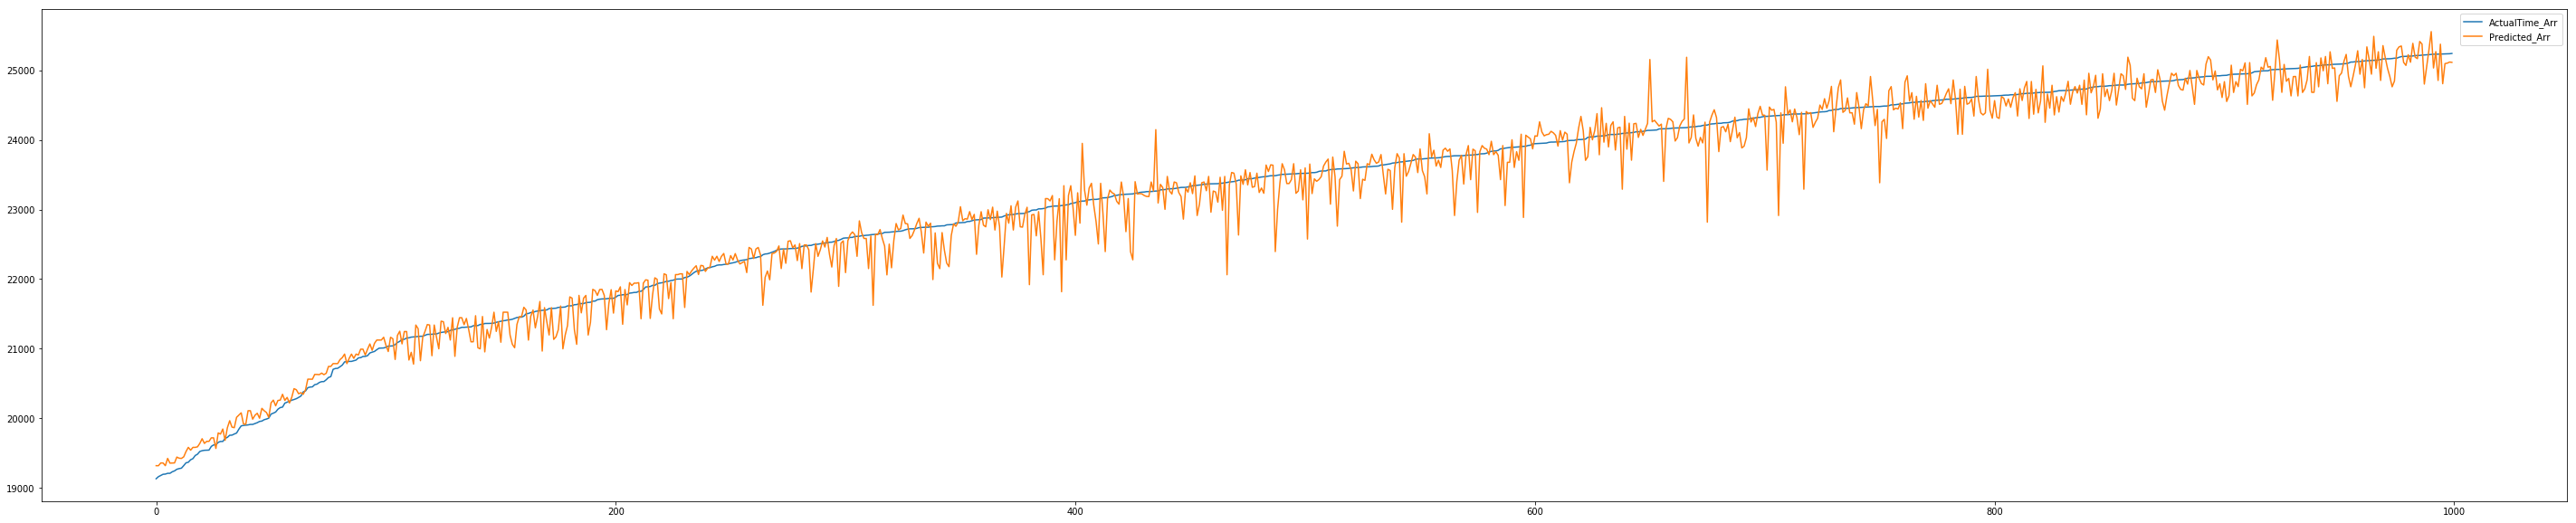

In [29]:
import matplotlib.pyplot as plt
plt.figure()
plot_df[:1000].plot(figsize=(50, 10))
plt.show()

In [71]:
# Storage Trained model in a file
'''
import pickle
file = "39A_2017_06.clf"
output = open(file, 'wb')
pickle.dump(clf, output)
output.close()
'''

In [72]:
file = "39A_2017_06.clf"
pkl_file = open(file, 'rb')
new_clf = pickle.load(pkl_file)

In [74]:
def generalCrossValidationData(n_folds=10):
    '''
        This function is to separate DataFrame into k folds groups, each group include 90% train data and 10% test data,
        which is followed k-folds Cross-validation model.
        Input Value:
                - the number of folds, default is 10 folds
        Retrun Value:
                - ({k groups of train dataset}, {k group of test dataset})
    '''
    # Reading from a csv file, into a data frame
    # Drop 'customer' column because it is not continuous feature
    # Randomly shuffle the dataset
    # here you get 70% of the rows for train
    # this code tries to find that train = 70% and test = 30%
    df = pd.read_csv("39A_CLEANED_DATA.csv")
    #df = df.drop(['customer'], axis=1)
    new_df = pd.concat([df[['ProgrNumber',
                        'StopPointId',
                        'PlannedTime_Arr',
                        'PlannedTime_Dep',
                        'VehicleId',
                        'Direction',
                        'weekDays',
                        'dayInterval',
                        'ActualTime_Arr', 'ActualTime_Dep']]], axis=1)
    '''
    new_df = pd.concat([df[['dayInterval',
                           'preTripDuration',
                           'plannedPreTripDuration',
                           'plannedTripDuration',
                           'toNextDistance',
                            'tripDuration']]], axis=1)
'''
    #X = X.fillna(X.mean())
    #y = y.fillna(y.mean())

    # we use k-folds cross validation model and we separate the data into 10 groups of train & test datasets
    # we use KFold method to separate the dataset based 10-folds Cross-validation rule
    from sklearn.cross_validation import KFold
    kf = KFold(len(new_df), n_folds=n_folds)
    train_index = {}
    test_index = {}
    count = 0
    for indexA, indexB in kf:
        train_index[count] = indexA
        test_index[count] = indexB
        count += 1

    trains = {}
    tests = {}
    for i in range(10):
        trains[i] = new_df.loc[train_index[i]]
        tests[i] = new_df.loc[test_index[i]]
    return (trains, tests)

In [75]:
trains, tests = generalCrossValidationData(10)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [79]:
trains[0].head()

,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,VehicleId,Direction,weekDays,dayInterval,ActualTime_Arr,ActualTime_Dep
13519,62,755,52460,52460,1000928,2,2,14.572222,52489,52489
13520,47,1478,51260,51260,1000928,2,2,14.238889,51124,51143
13521,63,756,52522,52522,1000928,2,2,14.589444,52550,52550
13522,31,1697,50318,50318,1000928,2,2,13.977222,50216,50216
13523,64,757,52578,52578,1000928,2,2,14.605000,52589,52589


In [80]:
# BP neural networking training
import numpy as np
#from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
# X Descriptive features (4 features)
# y Target feature (TripDuration)
scores = 0
for i in range(10):
    train = trains[i]
    test = tests[i]
    train_X = pd.concat([train[['ProgrNumber',
                        'StopPointId',
                        'PlannedTime_Arr',
                        'PlannedTime_Dep',
                        'VehicleId',
                        'Direction',
                        'weekDays',
                        'dayInterval']]], axis=1)

    train_y = train[['ActualTime_Arr', 'ActualTime_Dep']]
    train_X = train_X.fillna(train_X.mean())
    train_y = train_y.fillna(train_y.mean())
    
    test_X = pd.concat([test[['ProgrNumber',
                        'StopPointId',
                        'PlannedTime_Arr',
                        'PlannedTime_Dep',
                        'VehicleId',
                        'Direction',
                        'weekDays',
                        'dayInterval']]], axis=1)

    test_y = test[['ActualTime_Arr', 'ActualTime_Dep']]
    test_X = test_X.fillna(test_X.mean())
    test_y = test_y.fillna(test_y.mean())
    
    # Instantiate model
    # 59% score
    clf = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(10, 10, 10), random_state=1)
    #
    #clf = MLPRegressor(hidden_layer_sizes=(6, 6, 6), max_iter=600)
    #clf = MLPRegressor(hidden_layer_sizes=(5,5,5))
    clf.fit(train_X,train_y)
    #lm2 = LinearRegression()

    # Fit Model
    clf.fit(train_X, train_y)
    score = clf.score(test_X, test_y)
    scores += score
    print("test {} Score: {}".format(i+1,score))
print("Average of Score is: ", scores/10)  

test 1 Score: 0.9991750637050221
test 2 Score: 0.9988723338805211
test 3 Score: 0.999371388375341
test 4 Score: 0.9991317290209234
test 5 Score: 0.9993663112641584
test 6 Score: 0.9993322135271554
test 7 Score: 0.9994167821206398
test 8 Score: 0.99942350957371
test 9 Score: 0.9992194439028376
test 10 Score: 0.9991433455373662
Average of Score is:  0.9992452120907673
